# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results_l2_active/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results_l2_active/692743054_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/221861886_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/1527152775_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/1863655430_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/2036775591_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.4.json


In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results_l2_active/692743054_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
1:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
2:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
3:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
4:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
5:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
6:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
7:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
8:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
9:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success)

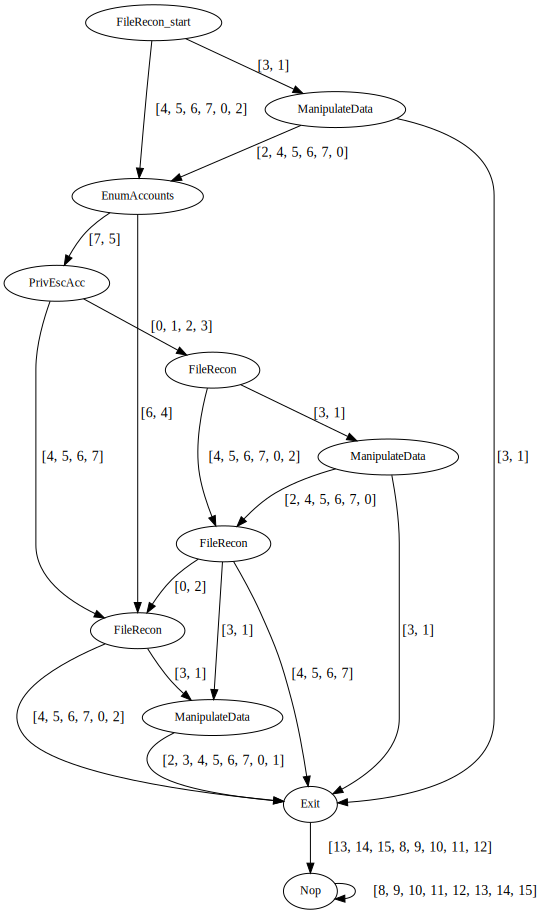

Displaying /home/ashinde/PhD/CaffineBravery/results_l2_active/221861886_attl0_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active)]
1:[(AccessPerm, denied), (HostObs, none), (ActionResult, success), (ConnStatus, active)]
2:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active)]
3:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, active)]
4:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
5:[(AccessPerm, auth), (HostObs, user_files), (ActionResult, success), (ConnStatus, terminated)]
6:[(AccessPerm, auth), (HostObs, none), (ActionResult, failure), (ConnStatus, terminated)]
7:[(AccessPerm, auth), (HostObs, none), (ActionResult, success), (ConnStatus, terminated)]
8:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, terminated)]
9:[(AccessPerm, denied), (HostObs, user_files), (Ac

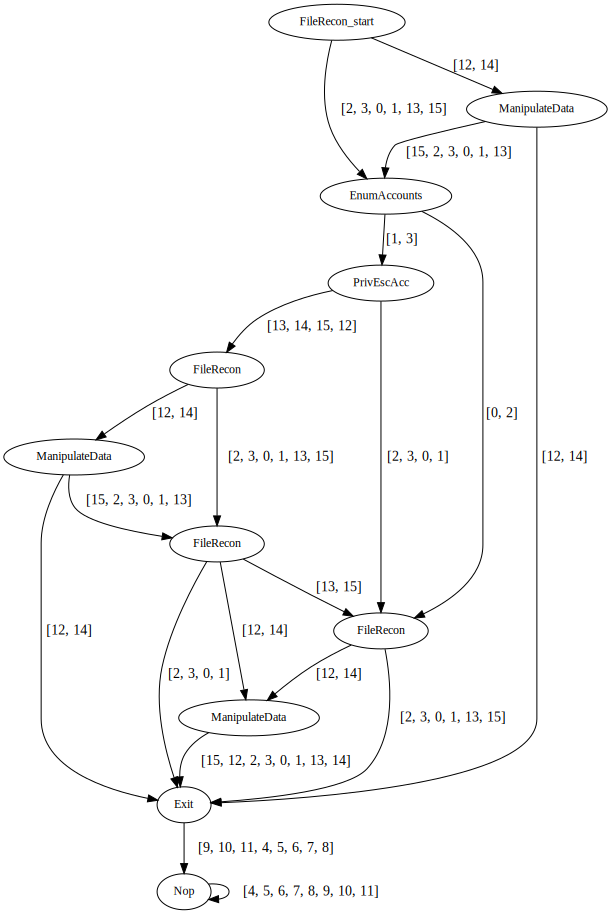

Displaying /home/ashinde/PhD/CaffineBravery/results_l2_active/1527152775_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


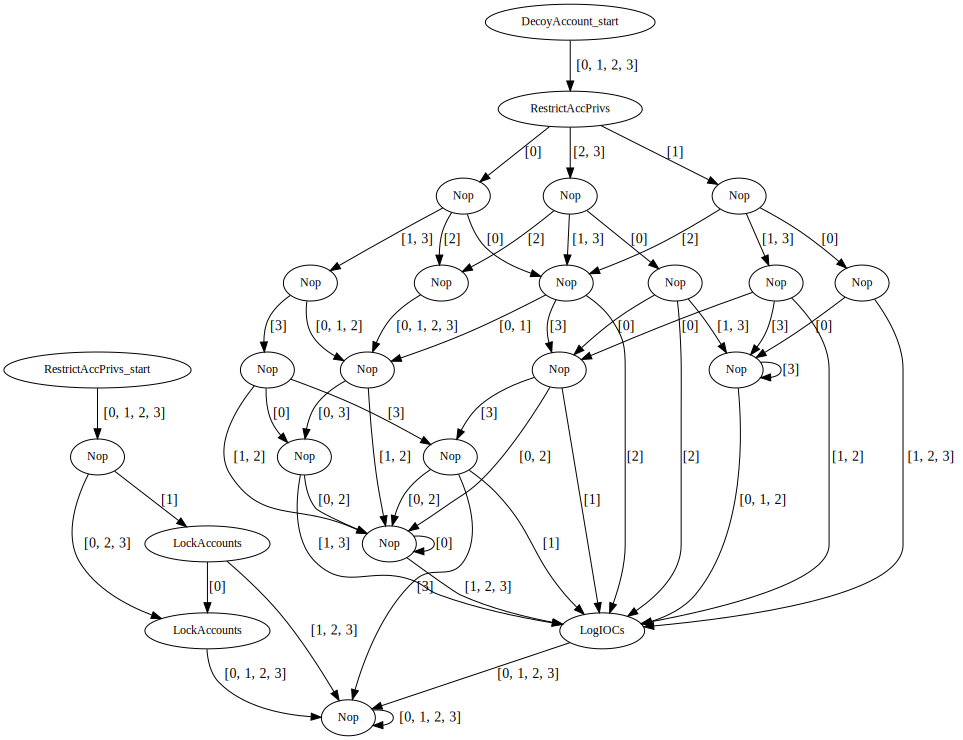

Displaying /home/ashinde/PhD/CaffineBravery/results_l2_active/1863655430_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, login_activity)]
3:[(EndPtAlerts, none)]


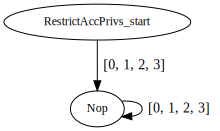

Displaying /home/ashinde/PhD/CaffineBravery/results_l2_active/2036775591_attl2_pol_graph.json
Edge map is:
0:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, none)]
1:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, perms_change)]
2:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, failure), (ConnStatus, active), (DefenseObs, acc_policy_change)]
3:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active), (DefenseObs, none)]
4:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active), (DefenseObs, acc_policy_change)]
5:[(AccessPerm, denied), (HostObs, none), (ActionResult, failure), (ConnStatus, active), (DefenseObs, perms_change)]
6:[(AccessPerm, denied), (HostObs, user_files), (ActionResult, success), (ConnStatus, active), (DefenseObs, acc_policy_change)]
7:[(AccessPerm, denied), (HostObs, user_files), (Ac

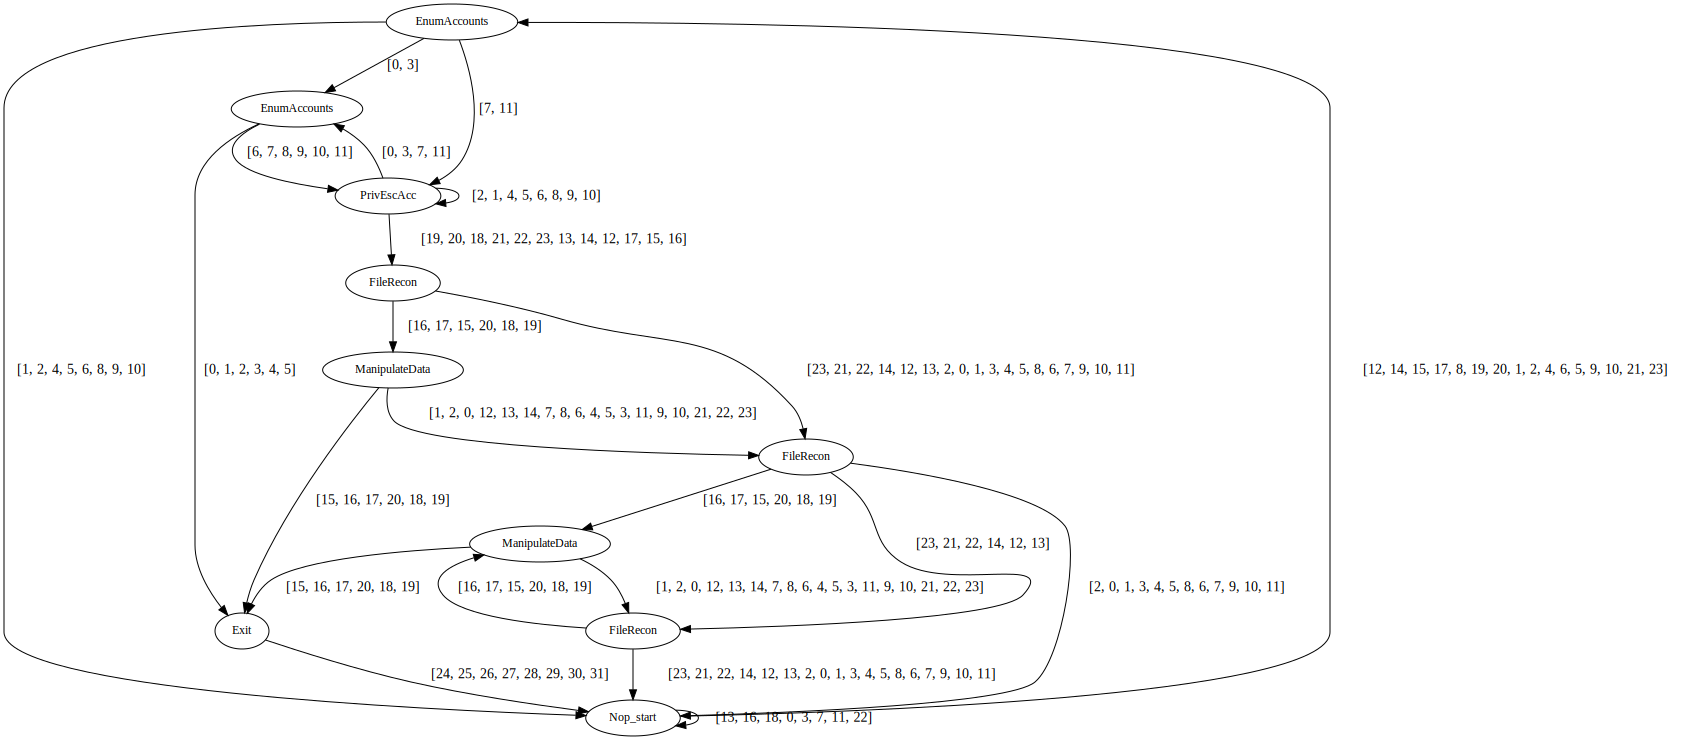

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results_l2_active/trace.4.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.500000                        0.500000   
3                         0.345455                        0.654546   
4                         0.345342                        0.654658   
5                         0.345342                        0.654658   
6                         0.345342                        0.654658   
7                         0.472556                        0.527444   
8                         0.506785                        0.493215   
9                         0.506785                        0.493215   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                         none   
1                            auth                   user_files   
2                            auth                         none   
3                            auth                         none   
4                          denied                   user_files   
5                          denied                         none   
6                          denied                         none   
7                            auth                   user_files   
8                            auth                   user_files   
9                            auth                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           failure                          active   
3                           failure                          active   
4                           success                          active   
5                           success                          active   
6                           success                          active   
7                           success                          active   
8                           success                          active   
9                           success                          active   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

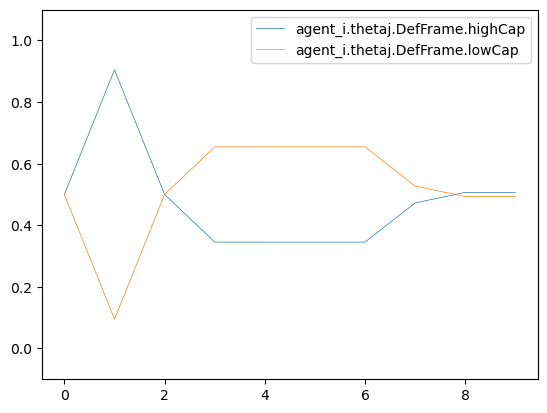

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                             none
2                               1.0                             none
3                               1.0                       file_write
4                               1.0                             none
5                               1.0                       file_write
6                               1.0                       file_write
7                               1.0                   login_activity
8                               1.0                   login_activity
9                               1.0                       file_write

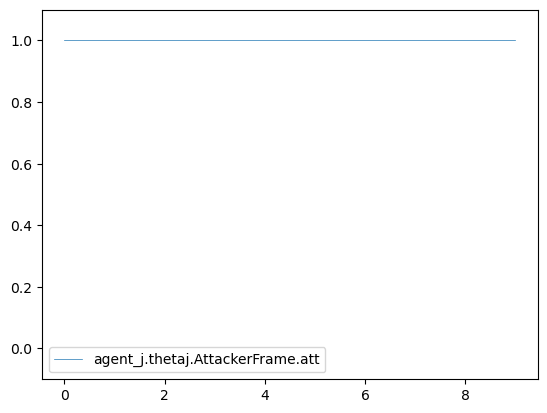

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action  \
0                   1.0                    0.0             Nop   
1                   0.0                    1.0             Nop   
2                   0.0                    1.0             Nop   
3                   0.0                    1.0             Nop   
4                   0.0                    1.0             Nop   
5                   0.0                    1.0             Nop   
6                   0.0                    1.0    EnumAccounts   
7                   0.0                    1.0      PrivEscAcc   
8                   0.0                    1.0       FileRecon   
9                   0.0                    1.0  ManipulateData   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6           LogIOCs  
7               Nop  
8               Nop  
9               Nop

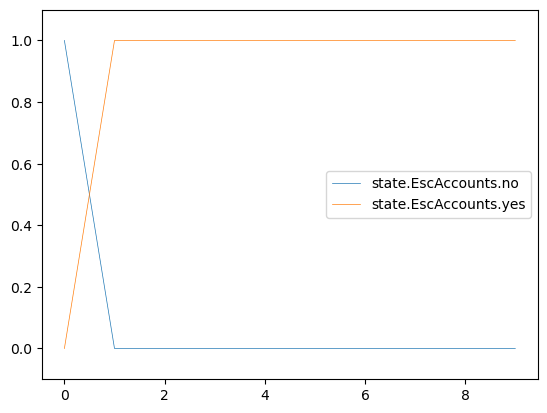

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000             Nop   
1                0.071429                 0.928571             Nop   
2                0.375000                 0.625000             Nop   
3                0.336364                 0.663636             Nop   
4                0.336336                 0.663664             Nop   
5                0.336336                 0.663664             Nop   
6                0.336336                 0.663664    EnumAccounts   
7                0.071310                 0.928690      PrivEscAcc   
8                0.000000                 1.000000       FileRecon   
9                0.000000                 1.000000  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           success   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

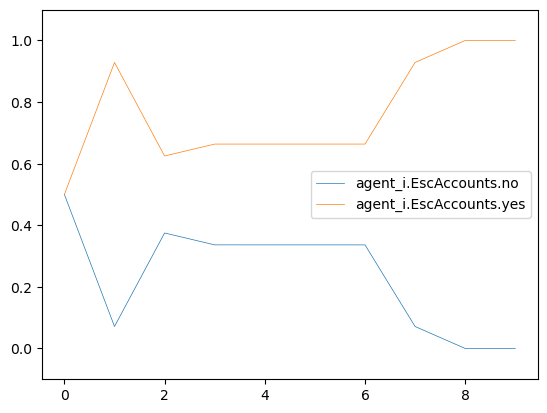

agent_j.EscAccounts.no  agent_j.EscAccounts.yes    agent_j.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0           LogIOCs   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                             none  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                       file_write  
6    EnumAccounts                       file_write  
7      PrivEscAcc                   login_activity  
8       FileRecon                   login_activity  
9  ManipulateData                       file_write

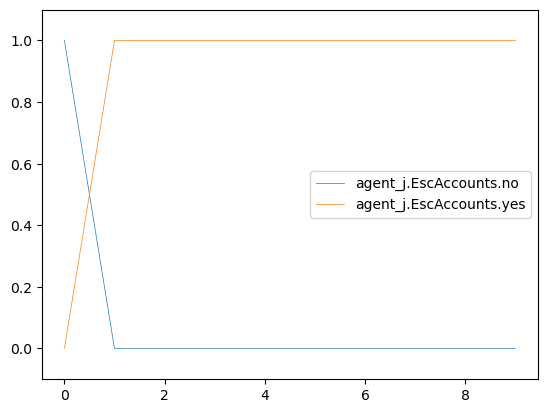

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action    agent_j.action
0                1.0                 0.0             Nop      DecoyAccount
1                1.0                 0.0             Nop  RestrictAccPrivs
2                1.0                 0.0             Nop               Nop
3                1.0                 0.0             Nop               Nop
4                1.0                 0.0             Nop               Nop
5                1.0                 0.0             Nop               Nop
6                1.0                 0.0    EnumAccounts           LogIOCs
7                0.0                 1.0      PrivEscAcc               Nop
8                0.0                 1.0       FileRecon               Nop
9                0.0                 1.0  ManipulateData               Nop

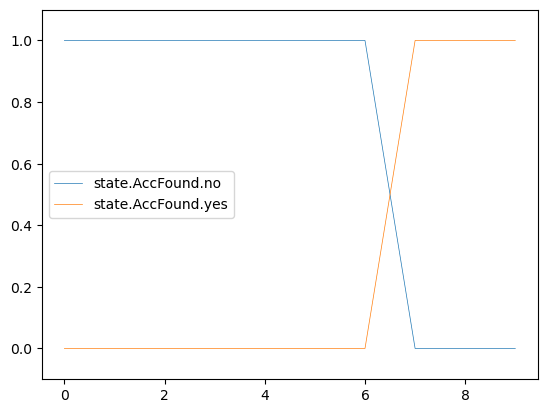

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action  \
0             1.000000              0.000000             Nop   
1             1.000000              0.000000             Nop   
2             1.000000              0.000000             Nop   
3             1.000000              0.000000             Nop   
4             1.000000              0.000000             Nop   
5             1.000000              0.000000             Nop   
6             1.000000              0.000000    EnumAccounts   
7             0.113523              0.886477      PrivEscAcc   
8             0.000000              1.000000       FileRecon   
9             0.000000              1.000000  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           success   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

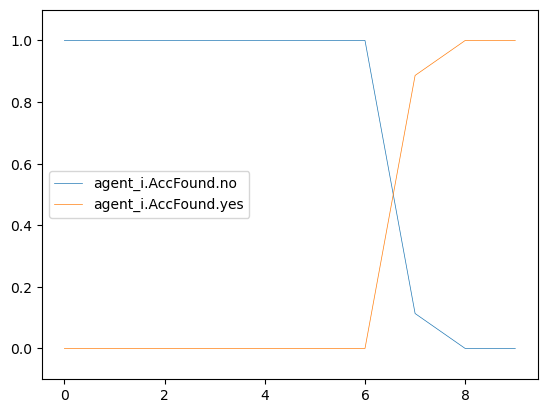

agent_j.AccFound.no  agent_j.AccFound.yes    agent_j.action  \
0             1.000000              0.000000      DecoyAccount   
1             1.000000              0.000000  RestrictAccPrivs   
2             0.751500              0.248500               Nop   
3             0.300037              0.699963               Nop   
4             0.313993              0.686007               Nop   
5             0.648396              0.351604               Nop   
6             0.371053              0.628947           LogIOCs   
7             0.353027              0.646974               Nop   
8             0.353027              0.646974               Nop   
9             0.353027              0.646973               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                             none  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                       file_write  
6    EnumAccounts                       file_write  
7      PrivEscAcc                   login_activity  
8       FileRecon                   login_activity  
9  ManipulateData                       file_write

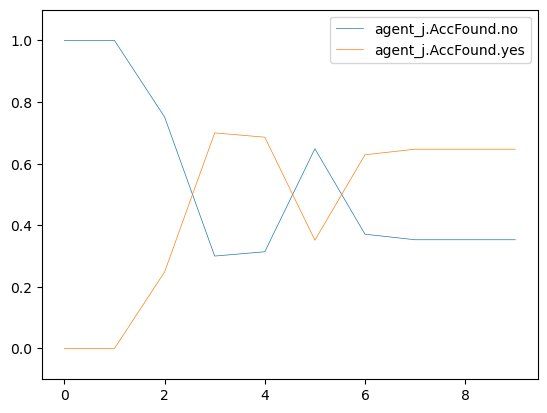

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action    agent_j.action  
0                      1.0             Nop      DecoyAccount  
1                      1.0             Nop  RestrictAccPrivs  
2                      1.0             Nop               Nop  
3                      1.0             Nop               Nop  
4                      1.0             Nop               Nop  
5                      1.0             Nop               Nop  
6                      1.0    EnumAccounts           LogIOCs  
7                      1.0      PrivEscAcc               Nop  
8                      1.0       FileRecon               Nop  
9                      1.0  ManipulateData               Nop

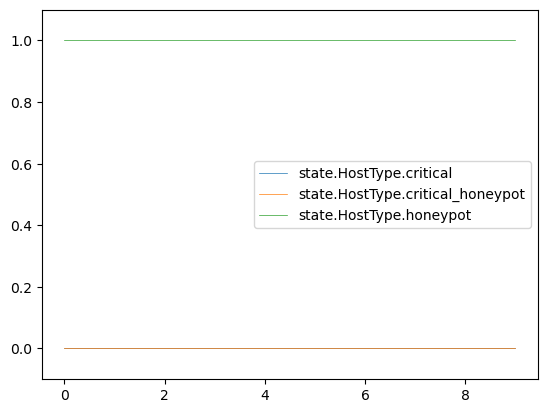

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot  agent_i.action    agent_j.action  \
0                        0.0             Nop      DecoyAccount   
1                        0.0             Nop  RestrictAccPrivs   
2                        0.0             Nop               Nop   
3                        0.0             Nop               Nop   
4                        0.0             Nop               Nop   
5                        0.0             Nop               Nop   
6                        0.0    EnumAccounts           LogIOCs   
7                        0.0      PrivEscAcc               Nop   
8                        0.0       FileRecon               Nop   
9                        0.0  ManipulateData               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                         none   
1                            auth                   user_files   
2                            auth                         none   
3                            auth                         none   
4                          denied                   user_files   
5                          denied                         none   
6                          denied                         none   
7                            auth                   user_files   
8                            auth                   user_files   
9                            auth                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           failure                          active   
3                           failure                          active   
4                           success                          active   
5                           success                          active   
6                           success                          active   
7                           success                          active   
8                           success                          active   
9                           success                          active   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

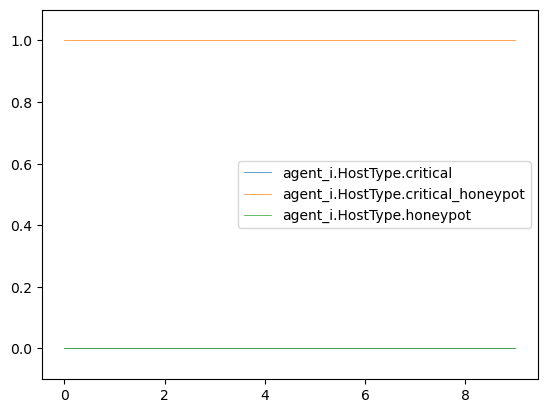

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot    agent_j.action  agent_i.action  \
0                        1.0      DecoyAccount             Nop   
1                        1.0  RestrictAccPrivs             Nop   
2                        1.0               Nop             Nop   
3                        1.0               Nop             Nop   
4                        1.0               Nop             Nop   
5                        1.0               Nop             Nop   
6                        1.0           LogIOCs    EnumAccounts   
7                        1.0               Nop      PrivEscAcc   
8                        1.0               Nop       FileRecon   
9                        1.0               Nop  ManipulateData   

  agent_j.observation.EndPtAlerts'  
0                             none  
1                             none  
2                             none  
3                       file_write  
4                             none  
5                       file_write  
6                       file_write  
7                   login_activity  
8                   login_activity  
9                       file_write

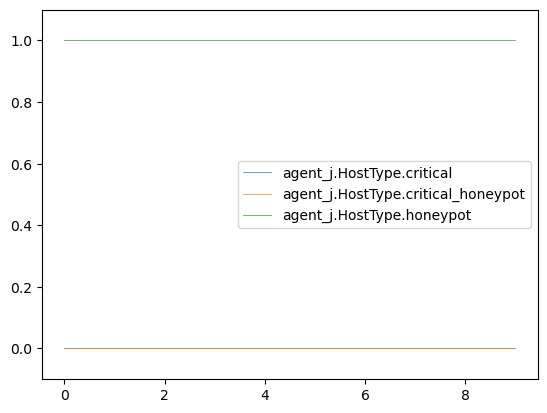

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0             Nop   
1                    1.0                     0.0             Nop   
2                    1.0                     0.0             Nop   
3                    1.0                     0.0             Nop   
4                    1.0                     0.0             Nop   
5                    1.0                     0.0             Nop   
6                    1.0                     0.0    EnumAccounts   
7                    1.0                     0.0      PrivEscAcc   
8                    1.0                     0.0       FileRecon   
9                    1.0                     0.0  ManipulateData   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6           LogIOCs  
7               Nop  
8               Nop  
9               Nop

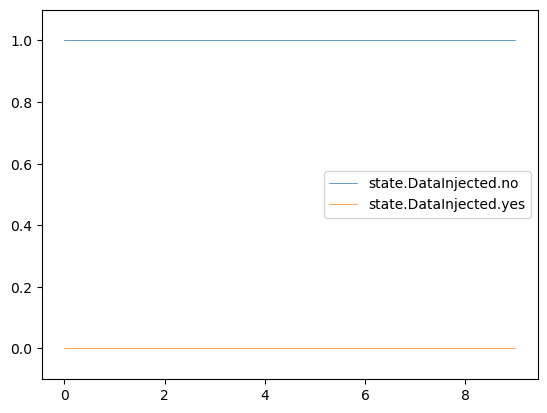

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                      1.0                       0.0             Nop   
1                      1.0                       0.0             Nop   
2                      1.0                       0.0             Nop   
3                      1.0                       0.0             Nop   
4                      1.0                       0.0             Nop   
5                      1.0                       0.0             Nop   
6                      1.0                       0.0    EnumAccounts   
7                      1.0                       0.0      PrivEscAcc   
8                      1.0                       0.0       FileRecon   
9                      1.0                       0.0  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           success   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

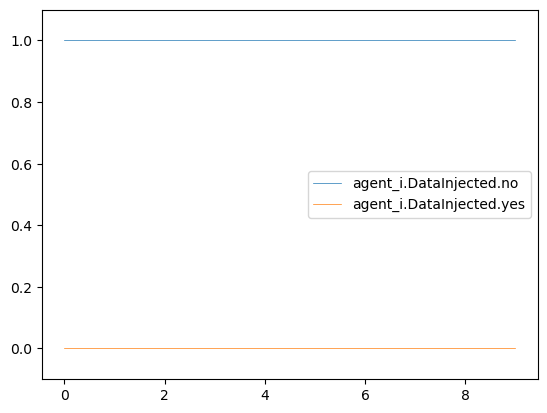

agent_j.DataInjected.no  agent_j.DataInjected.yes    agent_j.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.370000                  0.630000               Nop   
3                 0.370028                  0.629972               Nop   
4                 0.387823                  0.612177               Nop   
5                 0.374022                  0.625978               Nop   
6                 0.205732                  0.794268           LogIOCs   
7                 0.193762                  0.806238               Nop   
8                 0.193518                  0.806482               Nop   
9                 0.193494                  0.806506               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                             none  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                       file_write  
6    EnumAccounts                       file_write  
7      PrivEscAcc                   login_activity  
8       FileRecon                   login_activity  
9  ManipulateData                       file_write

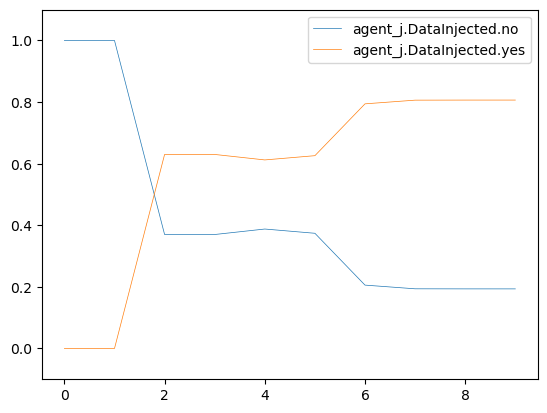

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes  agent_i.action    agent_j.action
0                  1.0                   0.0             Nop      DecoyAccount
1                  1.0                   0.0             Nop  RestrictAccPrivs
2                  1.0                   0.0             Nop               Nop
3                  1.0                   0.0             Nop               Nop
4                  1.0                   0.0             Nop               Nop
5                  1.0                   0.0             Nop               Nop
6                  1.0                   0.0    EnumAccounts           LogIOCs
7                  0.0                   1.0      PrivEscAcc               Nop
8                  0.0                   1.0       FileRecon               Nop
9                  0.0                   1.0  ManipulateData               Nop

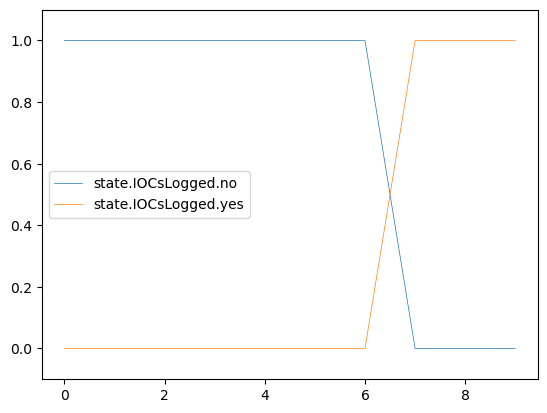

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes  agent_i.action  \
0               1.000000                0.000000             Nop   
1               1.000000                0.000000             Nop   
2               1.000000                0.000000             Nop   
3               1.000000                0.000000             Nop   
4               1.000000                0.000000             Nop   
5               0.967595                0.032406             Nop   
6               0.940066                0.059934    EnumAccounts   
7               0.748896                0.251104      PrivEscAcc   
8               0.683937                0.316063       FileRecon   
9               0.640650                0.359350  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           success   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

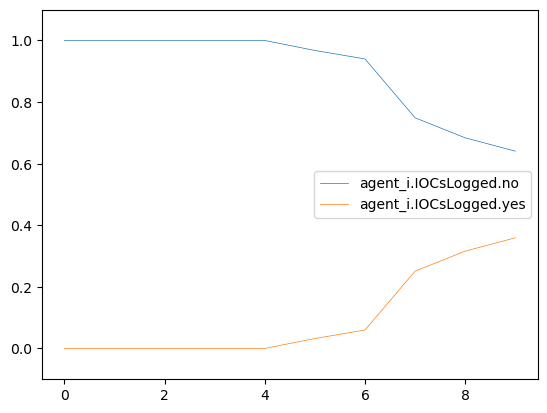

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes    agent_j.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0  RestrictAccPrivs   
2                    1.0                     0.0               Nop   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0           LogIOCs   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                             none  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                       file_write  
6    EnumAccounts                       file_write  
7      PrivEscAcc                   login_activity  
8       FileRecon                   login_activity  
9  ManipulateData                       file_write

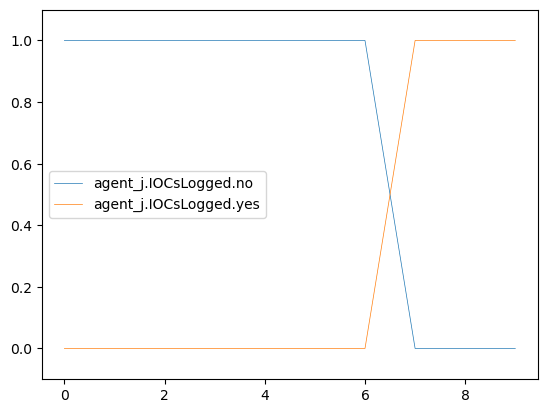

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action    agent_j.action
0                 0.0                  1.0             Nop      DecoyAccount
1                 0.0                  1.0             Nop  RestrictAccPrivs
2                 0.0                  1.0             Nop               Nop
3                 0.0                  1.0             Nop               Nop
4                 0.0                  1.0             Nop               Nop
5                 0.0                  1.0             Nop               Nop
6                 0.0                  1.0    EnumAccounts           LogIOCs
7                 0.0                  1.0      PrivEscAcc               Nop
8                 0.0                  1.0       FileRecon               Nop
9                 0.0                  1.0  ManipulateData               Nop

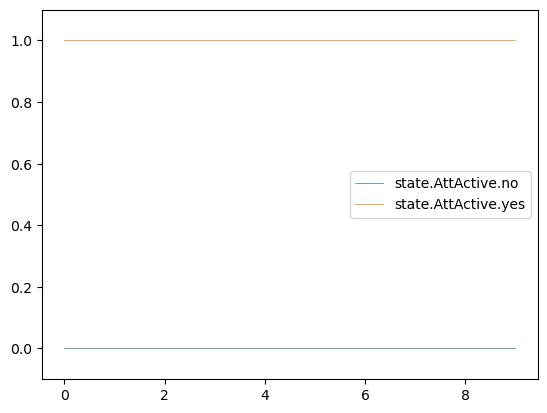

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action  \
0                   0.0                    1.0             Nop   
1                   0.0                    1.0             Nop   
2                   0.0                    1.0             Nop   
3                   0.0                    1.0             Nop   
4                   0.0                    1.0             Nop   
5                   0.0                    1.0             Nop   
6                   0.0                    1.0    EnumAccounts   
7                   0.0                    1.0      PrivEscAcc   
8                   0.0                    1.0       FileRecon   
9                   0.0                    1.0  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           success   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

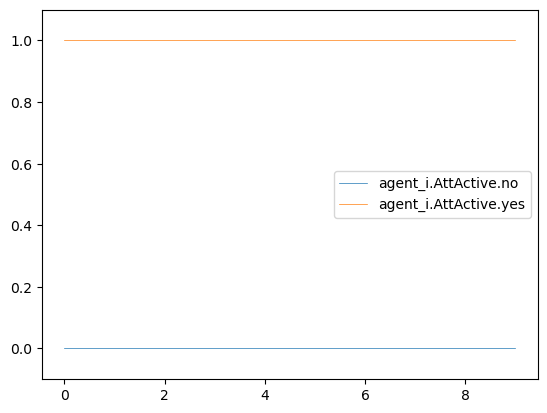

agent_j.AttActive.no  agent_j.AttActive.yes    agent_j.action  \
0              0.000000               1.000000      DecoyAccount   
1              0.000000               1.000000  RestrictAccPrivs   
2              0.000000               1.000000               Nop   
3              0.000052               0.999948               Nop   
4              0.112628               0.887372               Nop   
5              0.803239               0.196761               Nop   
6              0.490872               0.509128           LogIOCs   
7              0.941889               0.058111               Nop   
8              0.998708               0.001292               Nop   
9              0.999938               0.000062               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                             none  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                       file_write  
6    EnumAccounts                       file_write  
7      PrivEscAcc                   login_activity  
8       FileRecon                   login_activity  
9  ManipulateData                       file_write

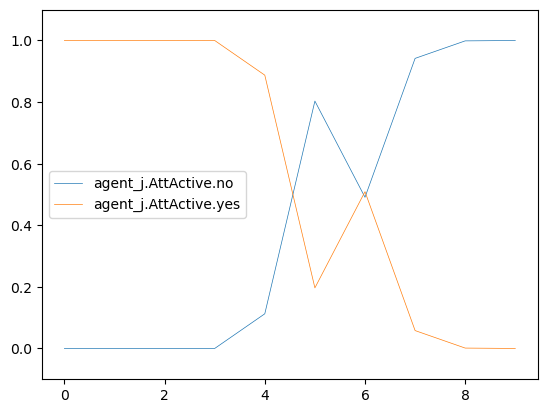

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action    agent_j.action
0                 1.0                  0.0             Nop      DecoyAccount
1                 1.0                  0.0             Nop  RestrictAccPrivs
2                 1.0                  0.0             Nop               Nop
3                 1.0                  0.0             Nop               Nop
4                 1.0                  0.0             Nop               Nop
5                 1.0                  0.0             Nop               Nop
6                 1.0                  0.0    EnumAccounts           LogIOCs
7                 1.0                  0.0      PrivEscAcc               Nop
8                 1.0                  0.0       FileRecon               Nop
9                 0.0                  1.0  ManipulateData               Nop

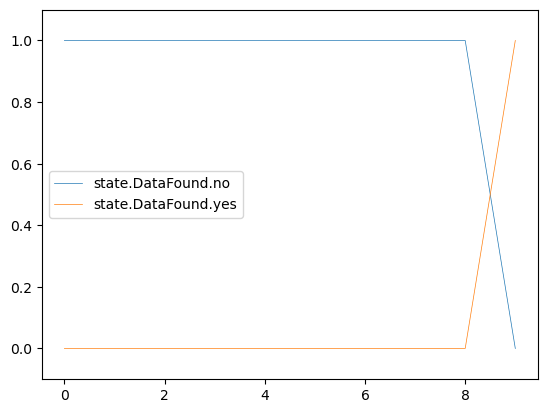

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action  \
0              1.000000               0.000000             Nop   
1              1.000000               0.000000             Nop   
2              1.000000               0.000000             Nop   
3              1.000000               0.000000             Nop   
4              1.000000               0.000000             Nop   
5              1.000000               0.000000             Nop   
6              1.000000               0.000000    EnumAccounts   
7              1.000000               0.000000      PrivEscAcc   
8              1.000000               0.000000       FileRecon   
9              0.093525               0.906475  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           success   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

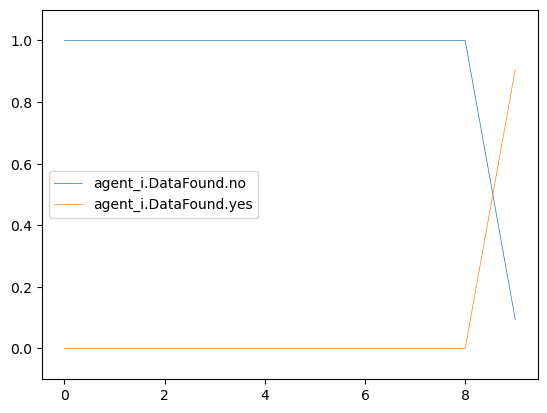

agent_j.DataFound.no  agent_j.DataFound.yes    agent_j.action  \
0              1.000000               0.000000      DecoyAccount   
1              0.300000               0.700000  RestrictAccPrivs   
2              0.300000               0.700000               Nop   
3              0.300032               0.699969               Nop   
4              0.197675               0.802325               Nop   
5              0.301160               0.698840               Nop   
6              0.171810               0.828190           LogIOCs   
7              0.163447               0.836553               Nop   
8              0.163431               0.836569               Nop   
9              0.163431               0.836569               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                             none  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                       file_write  
6    EnumAccounts                       file_write  
7      PrivEscAcc                   login_activity  
8       FileRecon                   login_activity  
9  ManipulateData                       file_write

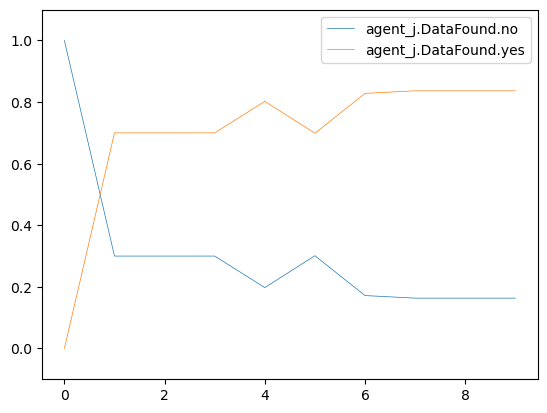

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action  \
0                   0.0                    1.0             Nop   
1                   0.0                    1.0             Nop   
2                   0.0                    1.0             Nop   
3                   0.0                    1.0             Nop   
4                   0.0                    1.0             Nop   
5                   0.0                    1.0             Nop   
6                   0.0                    1.0    EnumAccounts   
7                   0.0                    1.0      PrivEscAcc   
8                   0.0                    1.0       FileRecon   
9                   0.0                    1.0  ManipulateData   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6           LogIOCs  
7               Nop  
8               Nop  
9               Nop

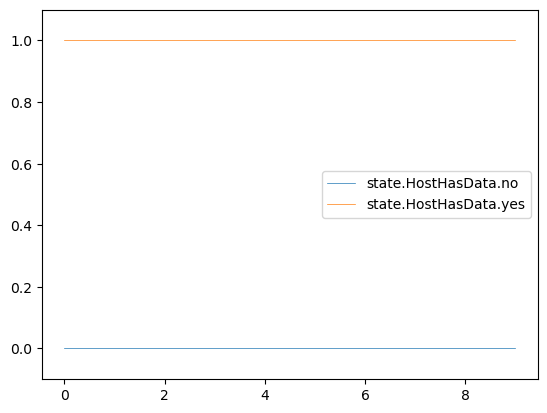

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000             Nop   
1                0.500000                 0.500000             Nop   
2                0.500000                 0.500000             Nop   
3                0.500000                 0.500000             Nop   
4                0.500000                 0.500000             Nop   
5                0.500000                 0.500000             Nop   
6                0.500000                 0.500000    EnumAccounts   
7                0.500000                 0.500000      PrivEscAcc   
8                0.500000                 0.500000       FileRecon   
9                0.071942                 0.928058  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           success   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

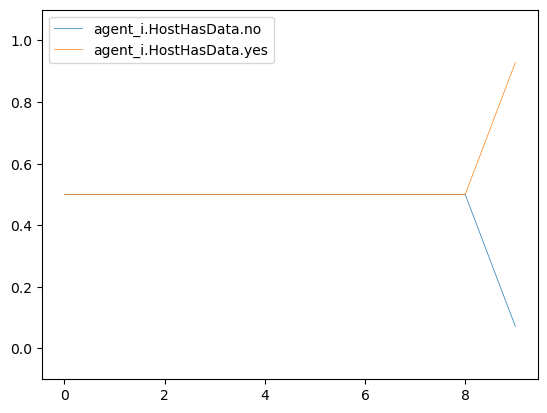

agent_j.HostHasData.no  agent_j.HostHasData.yes    agent_j.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0           LogIOCs   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                             none  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                       file_write  
6    EnumAccounts                       file_write  
7      PrivEscAcc                   login_activity  
8       FileRecon                   login_activity  
9  ManipulateData                       file_write

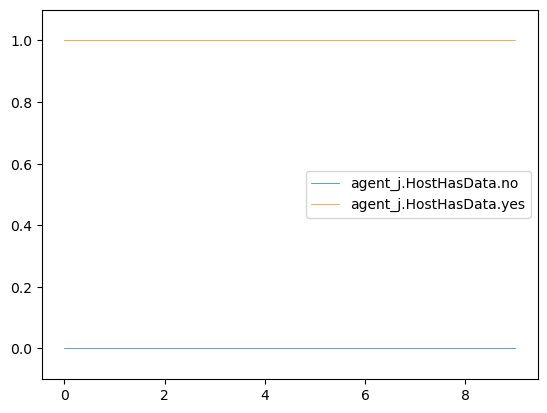

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action  \
0                   0.0                   1.0             Nop   
1                   0.0                   1.0             Nop   
2                   1.0                   0.0             Nop   
3                   1.0                   0.0             Nop   
4                   1.0                   0.0             Nop   
5                   1.0                   0.0             Nop   
6                   1.0                   0.0    EnumAccounts   
7                   1.0                   0.0      PrivEscAcc   
8                   1.0                   0.0       FileRecon   
9                   1.0                   0.0  ManipulateData   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6           LogIOCs  
7               Nop  
8               Nop  
9               Nop

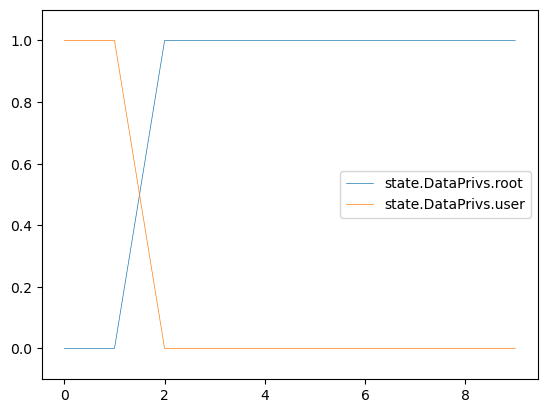

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000             Nop   
1                0.571429                0.428571             Nop   
2                1.000000                0.000000             Nop   
3                1.000000                0.000000             Nop   
4                1.000000                0.000000             Nop   
5                1.000000                0.000000             Nop   
6                1.000000                0.000000    EnumAccounts   
7                1.000000                0.000000      PrivEscAcc   
8                1.000000                0.000000       FileRecon   
9                1.000000                0.000000  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           success   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

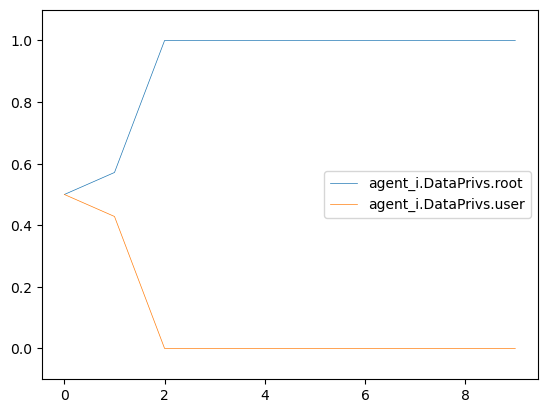

agent_j.DataPrivs.root  agent_j.DataPrivs.user    agent_j.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0           LogIOCs   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                             none  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                       file_write  
6    EnumAccounts                       file_write  
7      PrivEscAcc                   login_activity  
8       FileRecon                   login_activity  
9  ManipulateData                       file_write

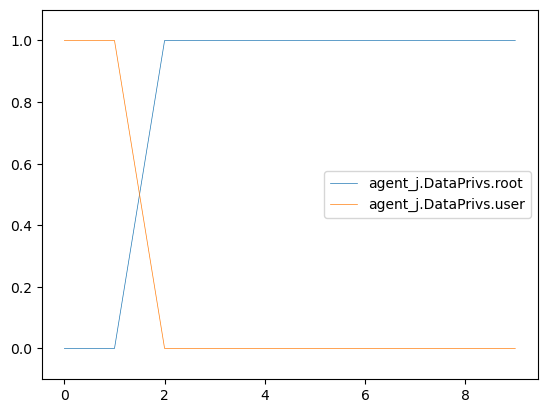

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0             Nop   
1                     0.0                     1.0             Nop   
2                     0.0                     1.0             Nop   
3                     0.0                     1.0             Nop   
4                     0.0                     1.0             Nop   
5                     0.0                     1.0             Nop   
6                     0.0                     1.0    EnumAccounts   
7                     0.0                     1.0      PrivEscAcc   
8                     1.0                     0.0       FileRecon   
9                     1.0                     0.0  ManipulateData   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6           LogIOCs  
7               Nop  
8               Nop  
9               Nop

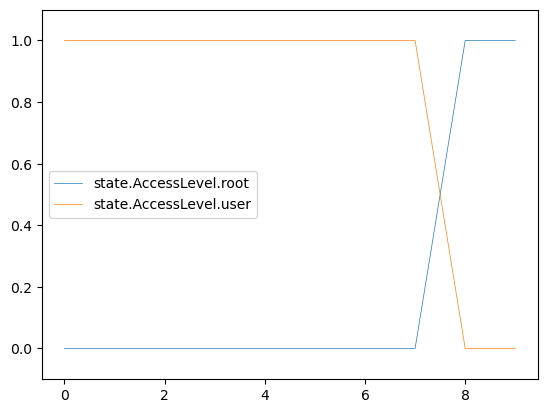

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                       0.0                       1.0             Nop   
1                       0.0                       1.0             Nop   
2                       0.0                       1.0             Nop   
3                       0.0                       1.0             Nop   
4                       0.0                       1.0             Nop   
5                       0.0                       1.0             Nop   
6                       0.0                       1.0    EnumAccounts   
7                       0.0                       1.0      PrivEscAcc   
8                       1.0                       0.0       FileRecon   
9                       1.0                       0.0  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                            auth   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           success   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           failure   
4                   user_files                           success   
5                         none                           success   
6                         none                           success   
7                   user_files                           success   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

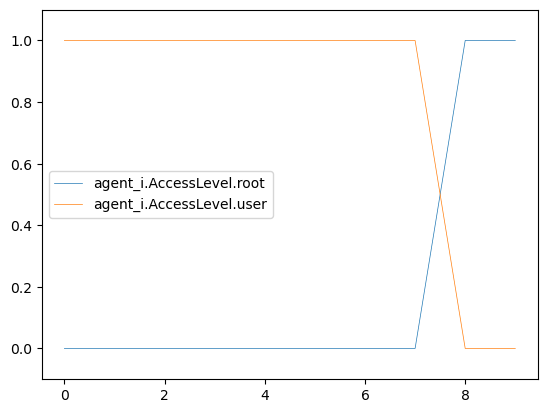

agent_j.AccessLevel.root  agent_j.AccessLevel.user    agent_j.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000               Nop   
3                  0.223640                  0.776360               Nop   
4                  0.612172                  0.387828               Nop   
5                  0.190697                  0.809303               Nop   
6                  0.536872                  0.463128           LogIOCs   
7                  0.559372                  0.440628               Nop   
8                  0.559372                  0.440628               Nop   
9                  0.559372                  0.440628               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                             none  
2             Nop                             none  
3             Nop                       file_write  
4             Nop                             none  
5             Nop                       file_write  
6    EnumAccounts                       file_write  
7      PrivEscAcc                   login_activity  
8       FileRecon                   login_activity  
9  ManipulateData                       file_write

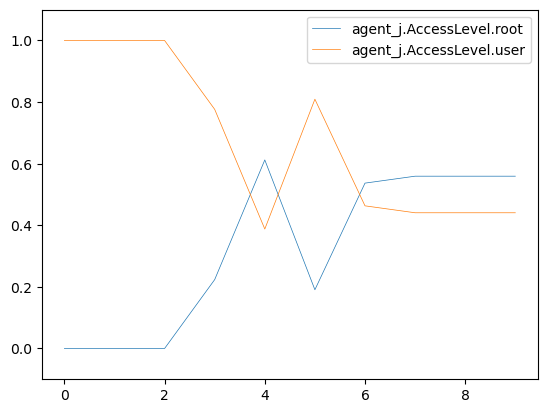

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.993884                        0.006116   
3                         0.993866                        0.006134   
4                         0.993866                        0.006134   
5                         0.993866                        0.006134   
6                         0.993866                        0.006134   
7                         0.996459                        0.003541   
8                         0.986807                        0.013193   
9                         0.995377                        0.004623   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                   user_files   
2                            auth                   user_files   
3                            auth                   user_files   
4                          denied                   user_files   
5                            auth                   user_files   
6                          denied                   user_files   
7                          denied                   user_files   
8                          denied                   user_files   
9                            auth                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           failure                          active   
3                           failure                          active   
4                           success                          active   
5                           failure                          active   
6                           success                          active   
7                           failure                          active   
8                           success                          active   
9                           failure                          active   

  agent_i.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

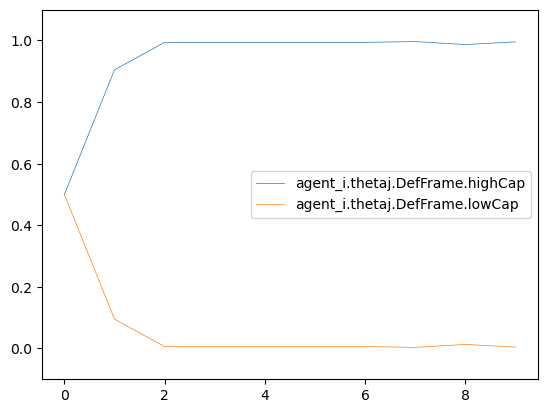

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                        file_enum
2                               1.0                   login_activity
3                               1.0                       file_write
4                               1.0                             none
5                               1.0                             none
6                               1.0                   login_activity
7                               1.0                   login_activity
8                               1.0                             none
9                               1.0                   login_activity

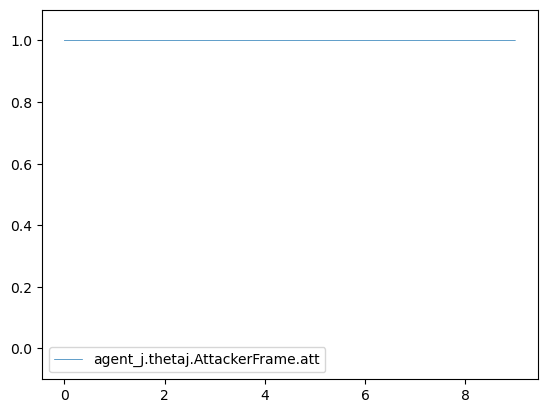

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes agent_i.action  \
0                   1.0                    0.0            Nop   
1                   0.0                    1.0            Nop   
2                   0.0                    1.0            Nop   
3                   0.0                    1.0            Nop   
4                   0.0                    1.0            Nop   
5                   0.0                    1.0            Nop   
6                   0.0                    1.0   EnumAccounts   
7                   0.0                    1.0     PrivEscAcc   
8                   0.0                    1.0   EnumAccounts   
9                   0.0                    1.0     PrivEscAcc   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6           LogIOCs  
7               Nop  
8               Nop  
9               Nop

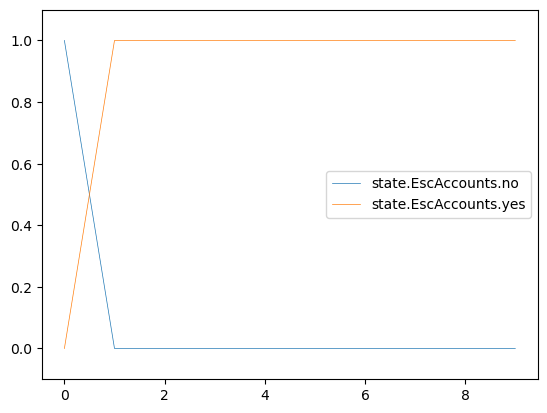

agent_i.EscAccounts.no  agent_i.EscAccounts.yes agent_i.action  \
0                0.500000                 0.500000            Nop   
1                0.071429                 0.928571            Nop   
2                0.004587                 0.995413            Nop   
3                0.003152                 0.996848            Nop   
4                0.003151                 0.996849            Nop   
5                0.003151                 0.996849            Nop   
6                0.003151                 0.996849   EnumAccounts   
7                0.000479                 0.999521     PrivEscAcc   
8                0.010428                 0.989572   EnumAccounts   
9                0.001594                 0.998406     PrivEscAcc   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           failure   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

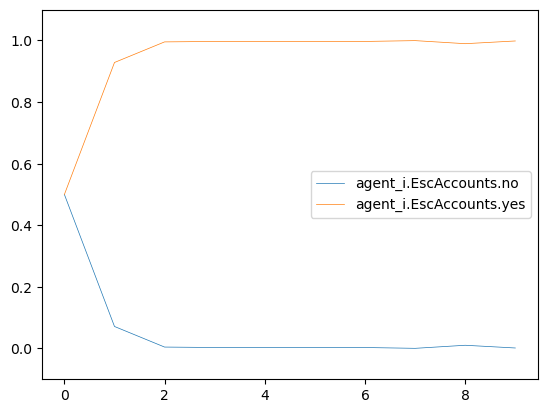

agent_j.EscAccounts.no  agent_j.EscAccounts.yes    agent_j.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0           LogIOCs   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0            Nop                             none  
1            Nop                        file_enum  
2            Nop                   login_activity  
3            Nop                       file_write  
4            Nop                             none  
5            Nop                             none  
6   EnumAccounts                   login_activity  
7     PrivEscAcc                   login_activity  
8   EnumAccounts                             none  
9     PrivEscAcc                   login_activity

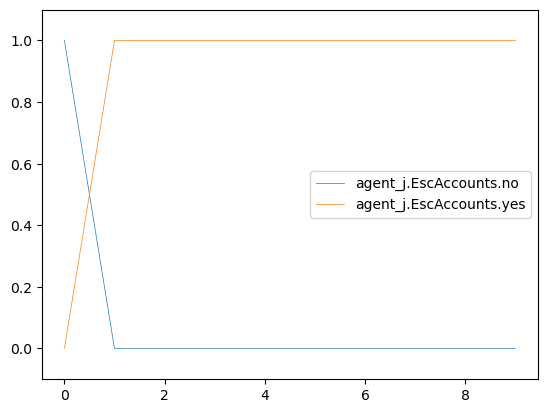

=============AccFound============


state.AccFound.no  state.AccFound.yes agent_i.action    agent_j.action
0                1.0                 0.0            Nop      DecoyAccount
1                1.0                 0.0            Nop  RestrictAccPrivs
2                1.0                 0.0            Nop               Nop
3                1.0                 0.0            Nop               Nop
4                1.0                 0.0            Nop               Nop
5                1.0                 0.0            Nop               Nop
6                1.0                 0.0   EnumAccounts           LogIOCs
7                1.0                 0.0     PrivEscAcc               Nop
8                1.0                 0.0   EnumAccounts               Nop
9                0.0                 1.0     PrivEscAcc               Nop

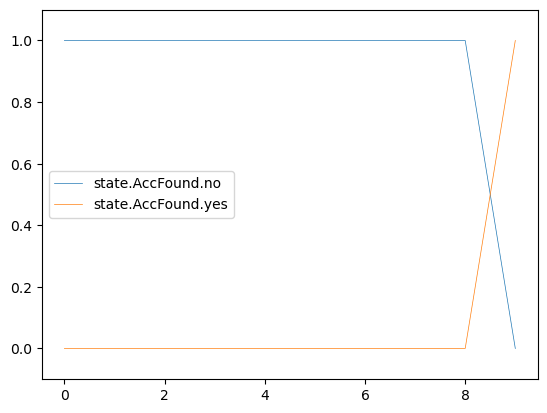

agent_i.AccFound.no  agent_i.AccFound.yes agent_i.action    agent_j.action  \
0             1.000000              0.000000            Nop      DecoyAccount   
1             1.000000              0.000000            Nop  RestrictAccPrivs   
2             1.000000              0.000000            Nop               Nop   
3             1.000000              0.000000            Nop               Nop   
4             1.000000              0.000000            Nop               Nop   
5             1.000000              0.000000            Nop               Nop   
6             1.000000              0.000000   EnumAccounts           LogIOCs   
7             0.045912              0.954089     PrivEscAcc               Nop   
8             1.000000              0.000000   EnumAccounts               Nop   
9             0.046976              0.953024     PrivEscAcc               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                   user_files   
2                            auth                   user_files   
3                            auth                   user_files   
4                          denied                   user_files   
5                            auth                   user_files   
6                          denied                   user_files   
7                          denied                   user_files   
8                          denied                   user_files   
9                            auth                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           failure                          active   
3                           failure                          active   
4                           success                          active   
5                           failure                          active   
6                           success                          active   
7                           failure                          active   
8                           success                          active   
9                           failure                          active   

  agent_i.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

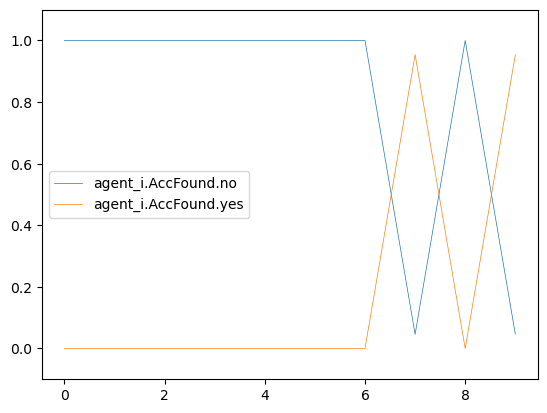

agent_j.AccFound.no  agent_j.AccFound.yes    agent_j.action agent_i.action  \
0             1.000000              0.000000      DecoyAccount            Nop   
1             1.000000              0.000000  RestrictAccPrivs            Nop   
2             0.444249              0.555751               Nop            Nop   
3             0.106881              0.893119               Nop            Nop   
4             0.117496              0.882504               Nop            Nop   
5             0.445352              0.554648               Nop            Nop   
6             0.509822              0.490177           LogIOCs   EnumAccounts   
7             0.509822              0.490178               Nop     PrivEscAcc   
8             0.509822              0.490178               Nop   EnumAccounts   
9             0.509822              0.490177               Nop     PrivEscAcc   

  agent_j.observation.EndPtAlerts'  
0                             none  
1                        file_enum  
2                   login_activity  
3                       file_write  
4                             none  
5                             none  
6                   login_activity  
7                   login_activity  
8                             none  
9                   login_activity

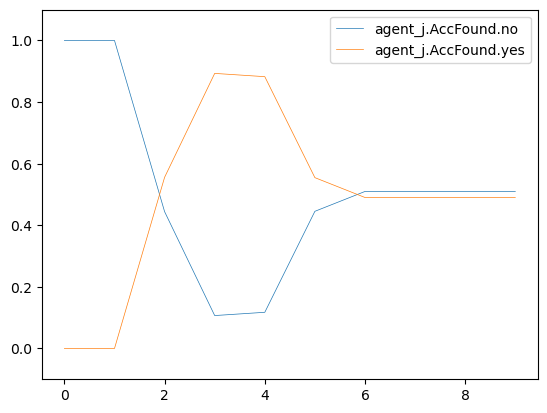

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot agent_i.action    agent_j.action  
0                      1.0            Nop      DecoyAccount  
1                      1.0            Nop  RestrictAccPrivs  
2                      1.0            Nop               Nop  
3                      1.0            Nop               Nop  
4                      1.0            Nop               Nop  
5                      1.0            Nop               Nop  
6                      1.0   EnumAccounts           LogIOCs  
7                      1.0     PrivEscAcc               Nop  
8                      1.0   EnumAccounts               Nop  
9                      1.0     PrivEscAcc               Nop

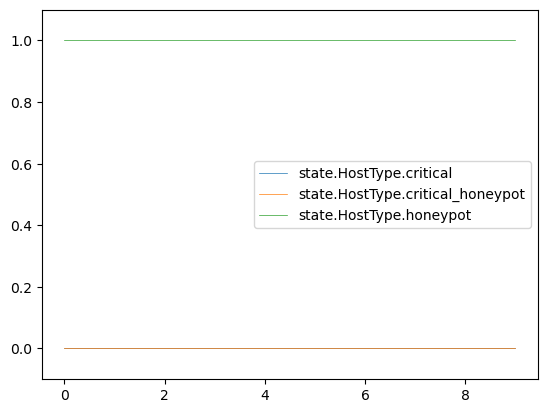

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot agent_i.action    agent_j.action  \
0                        0.0            Nop      DecoyAccount   
1                        0.0            Nop  RestrictAccPrivs   
2                        0.0            Nop               Nop   
3                        0.0            Nop               Nop   
4                        0.0            Nop               Nop   
5                        0.0            Nop               Nop   
6                        0.0   EnumAccounts           LogIOCs   
7                        0.0     PrivEscAcc               Nop   
8                        0.0   EnumAccounts               Nop   
9                        0.0     PrivEscAcc               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                   user_files   
2                            auth                   user_files   
3                            auth                   user_files   
4                          denied                   user_files   
5                            auth                   user_files   
6                          denied                   user_files   
7                          denied                   user_files   
8                          denied                   user_files   
9                            auth                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           success                          active   
1                           failure                          active   
2                           failure                          active   
3                           failure                          active   
4                           success                          active   
5                           failure                          active   
6                           success                          active   
7                           failure                          active   
8                           success                          active   
9                           failure                          active   

  agent_i.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

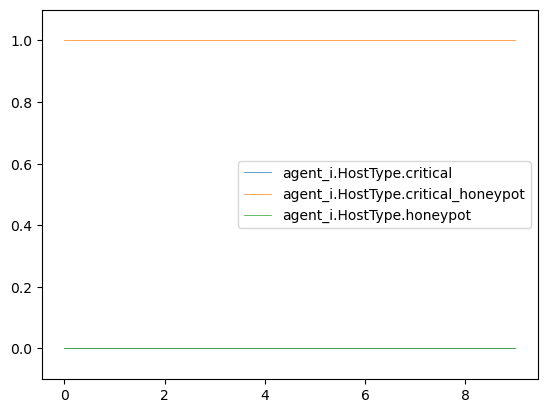

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot    agent_j.action agent_i.action  \
0                        1.0      DecoyAccount            Nop   
1                        1.0  RestrictAccPrivs            Nop   
2                        1.0               Nop            Nop   
3                        1.0               Nop            Nop   
4                        1.0               Nop            Nop   
5                        1.0               Nop            Nop   
6                        1.0           LogIOCs   EnumAccounts   
7                        1.0               Nop     PrivEscAcc   
8                        1.0               Nop   EnumAccounts   
9                        1.0               Nop     PrivEscAcc   

  agent_j.observation.EndPtAlerts'  
0                             none  
1                        file_enum  
2                   login_activity  
3                       file_write  
4                             none  
5                             none  
6                   login_activity  
7                   login_activity  
8                             none  
9                   login_activity

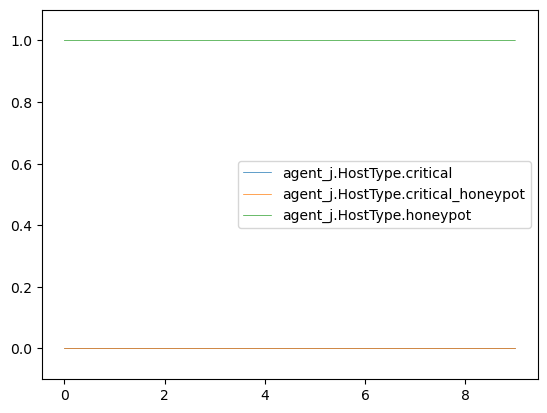

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes agent_i.action  \
0                    1.0                     0.0            Nop   
1                    1.0                     0.0            Nop   
2                    1.0                     0.0            Nop   
3                    1.0                     0.0            Nop   
4                    1.0                     0.0            Nop   
5                    1.0                     0.0            Nop   
6                    1.0                     0.0   EnumAccounts   
7                    1.0                     0.0     PrivEscAcc   
8                    1.0                     0.0   EnumAccounts   
9                    1.0                     0.0     PrivEscAcc   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6           LogIOCs  
7               Nop  
8               Nop  
9               Nop

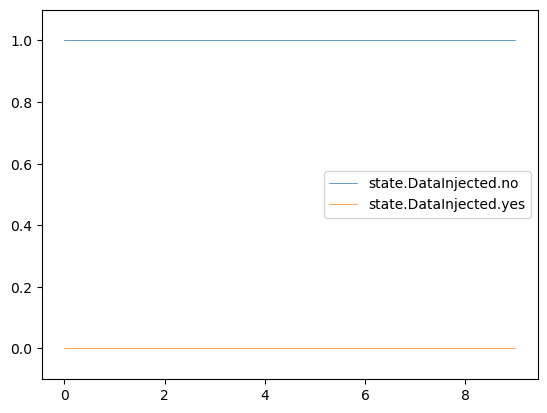

agent_i.DataInjected.no  agent_i.DataInjected.yes agent_i.action  \
0                      1.0                       0.0            Nop   
1                      1.0                       0.0            Nop   
2                      1.0                       0.0            Nop   
3                      1.0                       0.0            Nop   
4                      1.0                       0.0            Nop   
5                      1.0                       0.0            Nop   
6                      1.0                       0.0   EnumAccounts   
7                      1.0                       0.0     PrivEscAcc   
8                      1.0                       0.0   EnumAccounts   
9                      1.0                       0.0     PrivEscAcc   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           failure   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

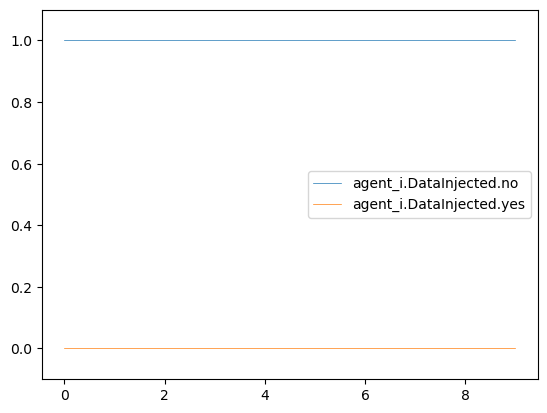

agent_j.DataInjected.no  agent_j.DataInjected.yes    agent_j.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.798722                  0.201278               Nop   
3                 0.951429                  0.048571               Nop   
4                 0.952179                  0.047821               Nop   
5                 0.604664                  0.395336               Nop   
6                 0.548065                  0.451934           LogIOCs   
7                 0.544411                  0.455589               Nop   
8                 0.544273                  0.455727               Nop   
9                 0.544273                  0.455727               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0            Nop                             none  
1            Nop                        file_enum  
2            Nop                   login_activity  
3            Nop                       file_write  
4            Nop                             none  
5            Nop                             none  
6   EnumAccounts                   login_activity  
7     PrivEscAcc                   login_activity  
8   EnumAccounts                             none  
9     PrivEscAcc                   login_activity

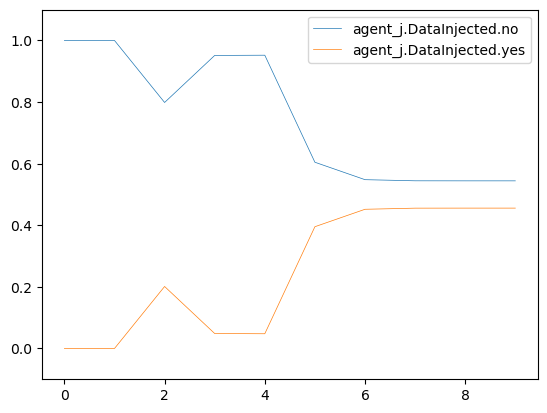

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes agent_i.action    agent_j.action
0                  1.0                   0.0            Nop      DecoyAccount
1                  1.0                   0.0            Nop  RestrictAccPrivs
2                  1.0                   0.0            Nop               Nop
3                  1.0                   0.0            Nop               Nop
4                  1.0                   0.0            Nop               Nop
5                  1.0                   0.0            Nop               Nop
6                  1.0                   0.0   EnumAccounts           LogIOCs
7                  0.0                   1.0     PrivEscAcc               Nop
8                  0.0                   1.0   EnumAccounts               Nop
9                  0.0                   1.0     PrivEscAcc               Nop

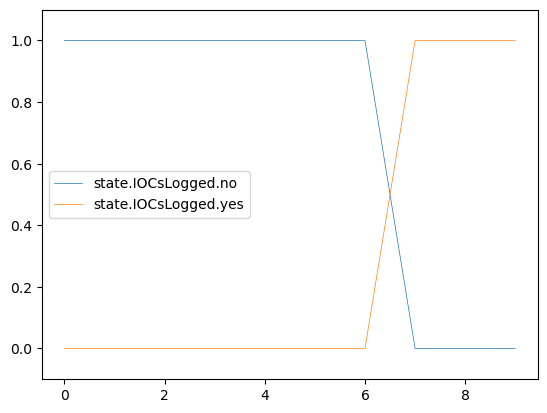

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes agent_i.action  \
0               1.000000                0.000000            Nop   
1               1.000000                0.000000            Nop   
2               1.000000                0.000000            Nop   
3               1.000000                0.000000            Nop   
4               1.000000                0.000000            Nop   
5               0.901624                0.098376            Nop   
6               0.818054                0.181946   EnumAccounts   
7               0.453785                0.546215     PrivEscAcc   
8               0.367864                0.632136   EnumAccounts   
9               0.274873                0.725127     PrivEscAcc   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           failure   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

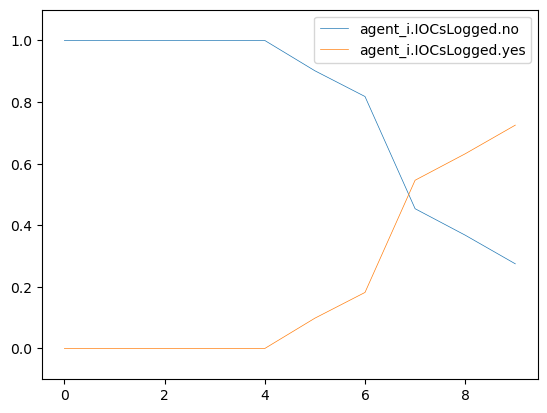

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes    agent_j.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0  RestrictAccPrivs   
2                    1.0                     0.0               Nop   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0           LogIOCs   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0            Nop                             none  
1            Nop                        file_enum  
2            Nop                   login_activity  
3            Nop                       file_write  
4            Nop                             none  
5            Nop                             none  
6   EnumAccounts                   login_activity  
7     PrivEscAcc                   login_activity  
8   EnumAccounts                             none  
9     PrivEscAcc                   login_activity

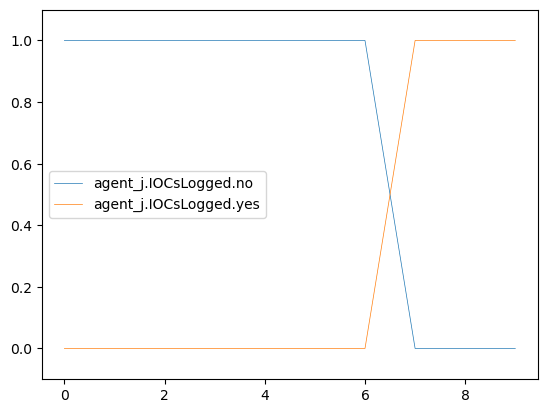

=============AttActive============


state.AttActive.no  state.AttActive.yes agent_i.action    agent_j.action
0                 0.0                  1.0            Nop      DecoyAccount
1                 0.0                  1.0            Nop  RestrictAccPrivs
2                 0.0                  1.0            Nop               Nop
3                 0.0                  1.0            Nop               Nop
4                 0.0                  1.0            Nop               Nop
5                 0.0                  1.0            Nop               Nop
6                 0.0                  1.0   EnumAccounts           LogIOCs
7                 0.0                  1.0     PrivEscAcc               Nop
8                 0.0                  1.0   EnumAccounts               Nop
9                 0.0                  1.0     PrivEscAcc               Nop

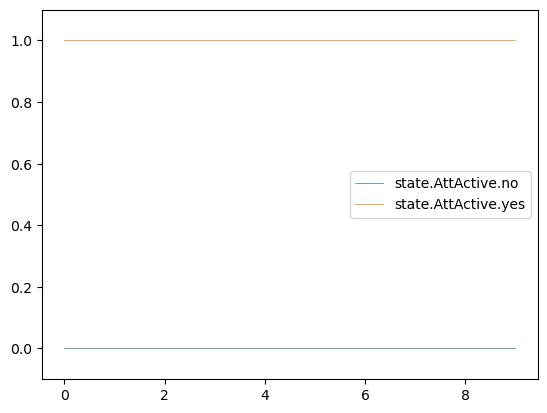

agent_i.AttActive.no  agent_i.AttActive.yes agent_i.action  \
0                   0.0                    1.0            Nop   
1                   0.0                    1.0            Nop   
2                   0.0                    1.0            Nop   
3                   0.0                    1.0            Nop   
4                   0.0                    1.0            Nop   
5                   0.0                    1.0            Nop   
6                   0.0                    1.0   EnumAccounts   
7                   0.0                    1.0     PrivEscAcc   
8                   0.0                    1.0   EnumAccounts   
9                   0.0                    1.0     PrivEscAcc   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           failure   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

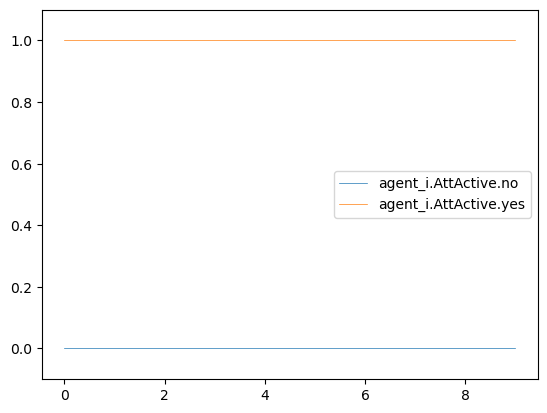

agent_j.AttActive.no  agent_j.AttActive.yes    agent_j.action  \
0          0.000000e+00           1.000000e+00      DecoyAccount   
1          0.000000e+00           9.999999e-01  RestrictAccPrivs   
2          0.000000e+00           1.000000e+00               Nop   
3          5.782310e-07           9.999995e-01               Nop   
4          6.155967e-02           9.384403e-01               Nop   
5          5.204475e-01           4.795525e-01               Nop   
6          9.758720e-01           2.412767e-02           LogIOCs   
7          9.957788e-01           4.221303e-03               Nop   
8          9.998282e-01           1.718182e-04               Nop   
9          1.000000e+00           5.298032e-08               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0            Nop                             none  
1            Nop                        file_enum  
2            Nop                   login_activity  
3            Nop                       file_write  
4            Nop                             none  
5            Nop                             none  
6   EnumAccounts                   login_activity  
7     PrivEscAcc                   login_activity  
8   EnumAccounts                             none  
9     PrivEscAcc                   login_activity

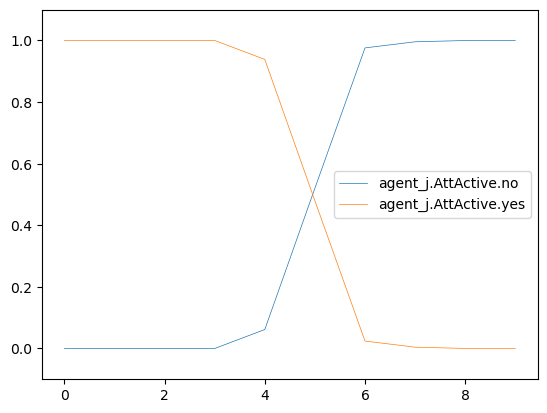

=============DataFound============


state.DataFound.no  state.DataFound.yes agent_i.action    agent_j.action
0                 1.0                  0.0            Nop      DecoyAccount
1                 1.0                  0.0            Nop  RestrictAccPrivs
2                 1.0                  0.0            Nop               Nop
3                 1.0                  0.0            Nop               Nop
4                 1.0                  0.0            Nop               Nop
5                 1.0                  0.0            Nop               Nop
6                 1.0                  0.0   EnumAccounts           LogIOCs
7                 1.0                  0.0     PrivEscAcc               Nop
8                 1.0                  0.0   EnumAccounts               Nop
9                 1.0                  0.0     PrivEscAcc               Nop

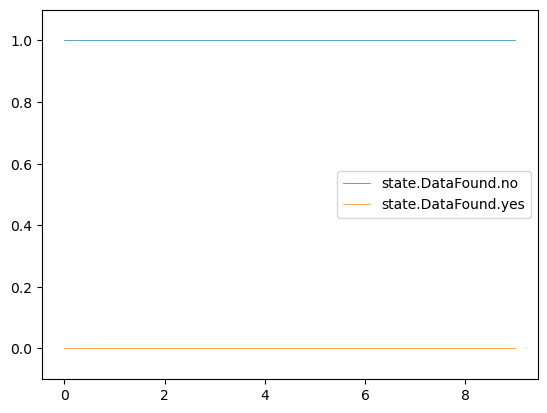

agent_i.DataFound.no  agent_i.DataFound.yes agent_i.action  \
0                   1.0                    0.0            Nop   
1                   1.0                    0.0            Nop   
2                   1.0                    0.0            Nop   
3                   1.0                    0.0            Nop   
4                   1.0                    0.0            Nop   
5                   1.0                    0.0            Nop   
6                   1.0                    0.0   EnumAccounts   
7                   1.0                    0.0     PrivEscAcc   
8                   1.0                    0.0   EnumAccounts   
9                   1.0                    0.0     PrivEscAcc   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           failure   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

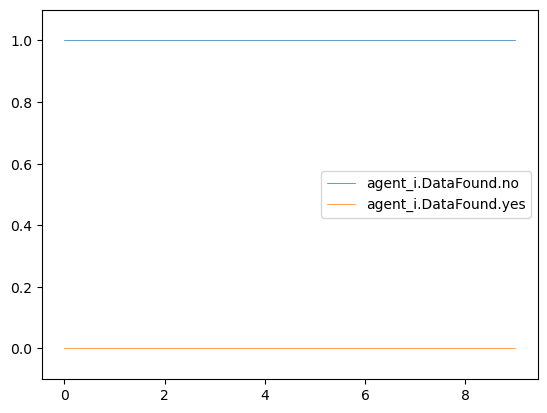

agent_j.DataFound.no  agent_j.DataFound.yes    agent_j.action  \
0              1.000000               0.000000      DecoyAccount   
1              0.300000               0.700000  RestrictAccPrivs   
2              0.642172               0.357827               Nop   
3              0.764051               0.235949               Nop   
4              0.300220               0.699780               Nop   
5              0.416293               0.583707               Nop   
6              0.453205               0.546795           LogIOCs   
7              0.453117               0.546883               Nop   
8              0.453117               0.546883               Nop   
9              0.453117               0.546883               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0            Nop                             none  
1            Nop                        file_enum  
2            Nop                   login_activity  
3            Nop                       file_write  
4            Nop                             none  
5            Nop                             none  
6   EnumAccounts                   login_activity  
7     PrivEscAcc                   login_activity  
8   EnumAccounts                             none  
9     PrivEscAcc                   login_activity

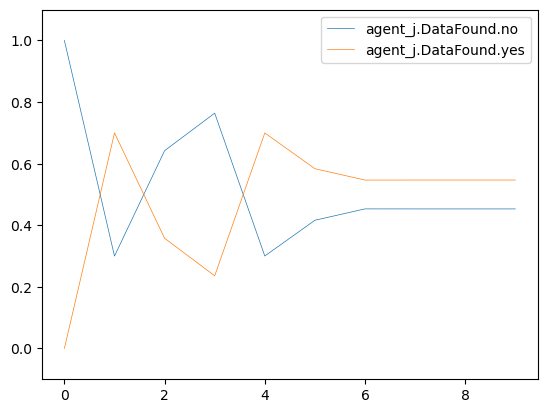

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes agent_i.action  \
0                   0.0                    1.0            Nop   
1                   0.0                    1.0            Nop   
2                   0.0                    1.0            Nop   
3                   0.0                    1.0            Nop   
4                   0.0                    1.0            Nop   
5                   0.0                    1.0            Nop   
6                   0.0                    1.0   EnumAccounts   
7                   0.0                    1.0     PrivEscAcc   
8                   0.0                    1.0   EnumAccounts   
9                   0.0                    1.0     PrivEscAcc   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6           LogIOCs  
7               Nop  
8               Nop  
9               Nop

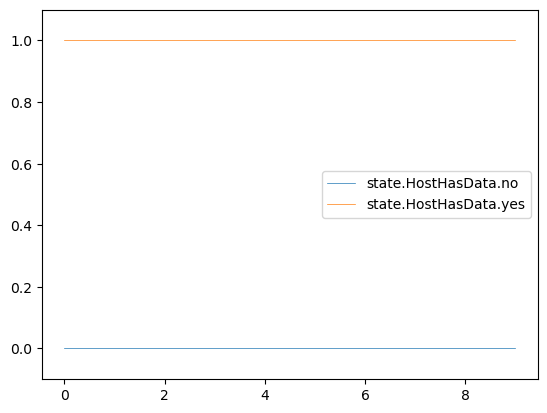

agent_i.HostHasData.no  agent_i.HostHasData.yes agent_i.action  \
0                     0.5                      0.5            Nop   
1                     0.5                      0.5            Nop   
2                     0.5                      0.5            Nop   
3                     0.5                      0.5            Nop   
4                     0.5                      0.5            Nop   
5                     0.5                      0.5            Nop   
6                     0.5                      0.5   EnumAccounts   
7                     0.5                      0.5     PrivEscAcc   
8                     0.5                      0.5   EnumAccounts   
9                     0.5                      0.5     PrivEscAcc   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           failure   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

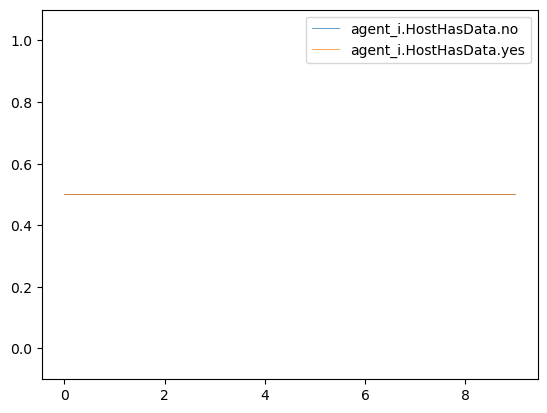

agent_j.HostHasData.no  agent_j.HostHasData.yes    agent_j.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0           LogIOCs   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0            Nop                             none  
1            Nop                        file_enum  
2            Nop                   login_activity  
3            Nop                       file_write  
4            Nop                             none  
5            Nop                             none  
6   EnumAccounts                   login_activity  
7     PrivEscAcc                   login_activity  
8   EnumAccounts                             none  
9     PrivEscAcc                   login_activity

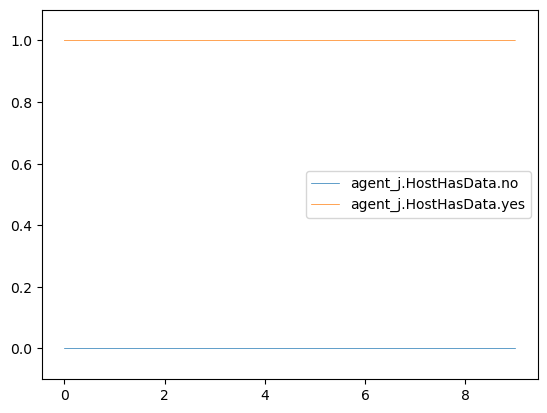

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user agent_i.action    agent_j.action
0                   0.0                   1.0            Nop      DecoyAccount
1                   0.0                   1.0            Nop  RestrictAccPrivs
2                   1.0                   0.0            Nop               Nop
3                   1.0                   0.0            Nop               Nop
4                   1.0                   0.0            Nop               Nop
5                   1.0                   0.0            Nop               Nop
6                   1.0                   0.0   EnumAccounts           LogIOCs
7                   1.0                   0.0     PrivEscAcc               Nop
8                   1.0                   0.0   EnumAccounts               Nop
9                   1.0                   0.0     PrivEscAcc               Nop

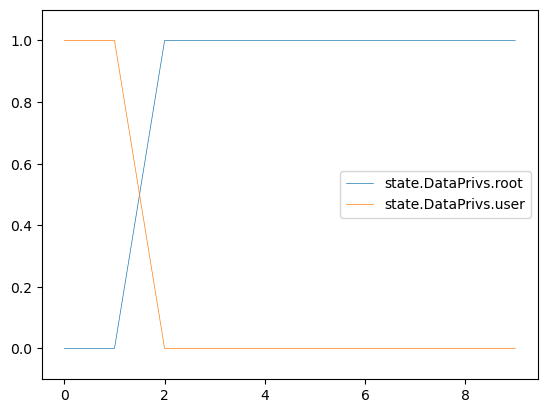

agent_i.DataPrivs.root  agent_i.DataPrivs.user agent_i.action  \
0                0.500000                0.500000            Nop   
1                0.571429                0.428571            Nop   
2                1.000000                0.000000            Nop   
3                1.000000                0.000000            Nop   
4                1.000000                0.000000            Nop   
5                1.000000                0.000000            Nop   
6                1.000000                0.000000   EnumAccounts   
7                1.000000                0.000000     PrivEscAcc   
8                1.000000                0.000000   EnumAccounts   
9                1.000000                0.000000     PrivEscAcc   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           failure   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

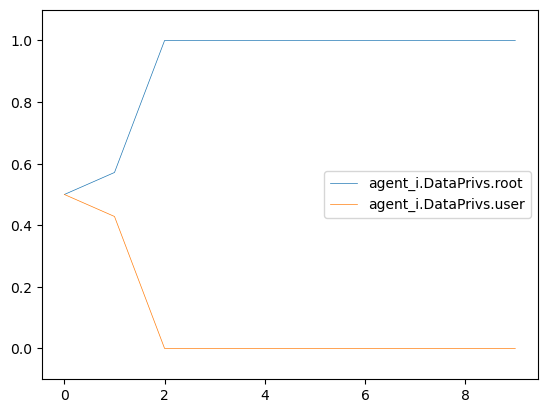

agent_j.DataPrivs.root  agent_j.DataPrivs.user    agent_j.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0           LogIOCs   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0            Nop                             none  
1            Nop                        file_enum  
2            Nop                   login_activity  
3            Nop                       file_write  
4            Nop                             none  
5            Nop                             none  
6   EnumAccounts                   login_activity  
7     PrivEscAcc                   login_activity  
8   EnumAccounts                             none  
9     PrivEscAcc                   login_activity

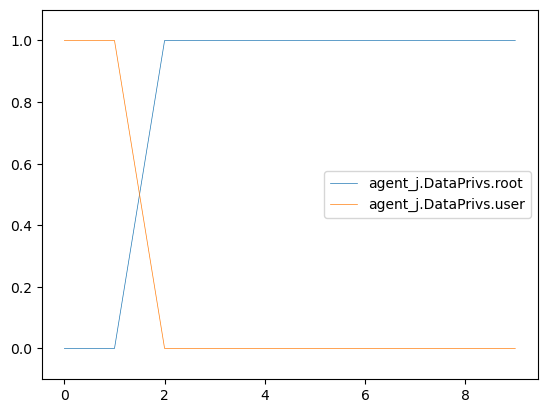

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user agent_i.action  \
0                     0.0                     1.0            Nop   
1                     0.0                     1.0            Nop   
2                     0.0                     1.0            Nop   
3                     0.0                     1.0            Nop   
4                     0.0                     1.0            Nop   
5                     0.0                     1.0            Nop   
6                     0.0                     1.0   EnumAccounts   
7                     0.0                     1.0     PrivEscAcc   
8                     0.0                     1.0   EnumAccounts   
9                     0.0                     1.0     PrivEscAcc   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6           LogIOCs  
7               Nop  
8               Nop  
9               Nop

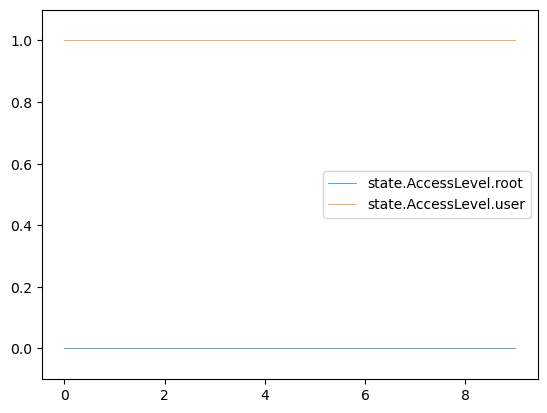

agent_i.AccessLevel.root  agent_i.AccessLevel.user agent_i.action  \
0                       0.0                       1.0            Nop   
1                       0.0                       1.0            Nop   
2                       0.0                       1.0            Nop   
3                       0.0                       1.0            Nop   
4                       0.0                       1.0            Nop   
5                       0.0                       1.0            Nop   
6                       0.0                       1.0   EnumAccounts   
7                       0.0                       1.0     PrivEscAcc   
8                       0.0                       1.0   EnumAccounts   
9                       0.0                       1.0     PrivEscAcc   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                          denied   
8               Nop                          denied   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           success   
1                   user_files                           failure   
2                   user_files                           failure   
3                   user_files                           failure   
4                   user_files                           success   
5                   user_files                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           failure   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

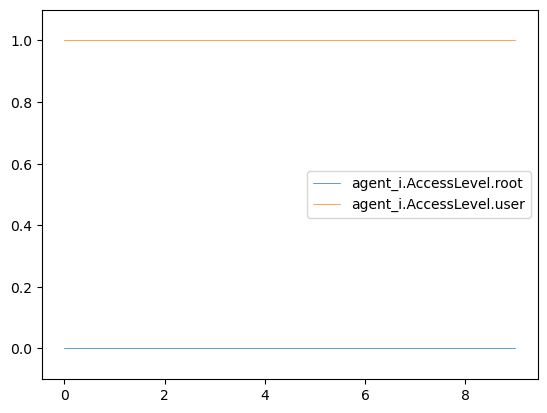

agent_j.AccessLevel.root  agent_j.AccessLevel.user    agent_j.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000               Nop   
3                  0.844899                  0.155101               Nop   
4                  0.862693                  0.137307               Nop   
5                  0.477847                  0.522153               Nop   
6                  0.402258                  0.597741           LogIOCs   
7                  0.402259                  0.597742               Nop   
8                  0.402258                  0.597742               Nop   
9                  0.402258                  0.597742               Nop   

  agent_i.action agent_j.observation.EndPtAlerts'  
0            Nop                             none  
1            Nop                        file_enum  
2            Nop                   login_activity  
3            Nop                       file_write  
4            Nop                             none  
5            Nop                             none  
6   EnumAccounts                   login_activity  
7     PrivEscAcc                   login_activity  
8   EnumAccounts                             none  
9     PrivEscAcc                   login_activity

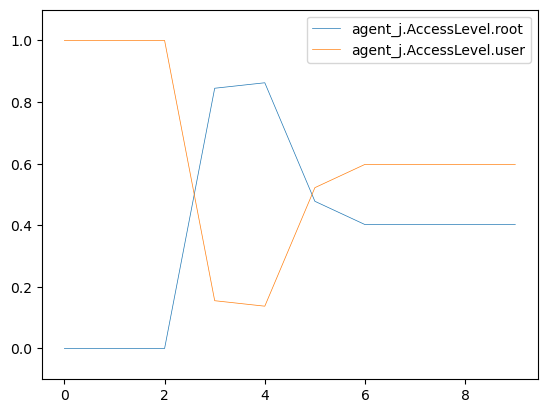

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.993884                        0.006116   
3                         0.993866                        0.006134   
4                         0.993866                        0.006134   
5                         0.993866                        0.006134   
6                         0.993866                        0.006134   
7                         0.996459                        0.003541   
8                         0.996923                        0.003077   
9                         0.996923                        0.003077   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                            auth                         none   
1                          denied                         none   
2                          denied                         none   
3                            auth                         none   
4                          denied                         none   
5                            auth                         none   
6                          denied                         none   
7                            auth                         none   
8                            auth                         none   
9                            auth                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                          active   
6                           success                          active   
7                           success                          active   
8                           success                          active   
9                           success                          active   

  agent_i.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                    perms_change  
6                            none  
7                            none  
8                            none  
9                            none

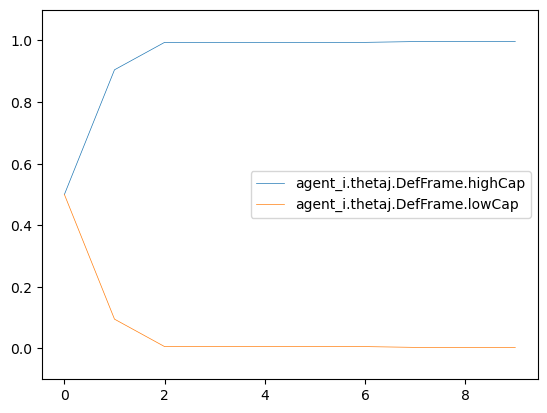

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                   login_activity
1                               1.0                             none
2                               1.0                             none
3                               1.0                        file_enum
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                   login_activity
8                               1.0                        file_enum
9                               1.0                       file_write

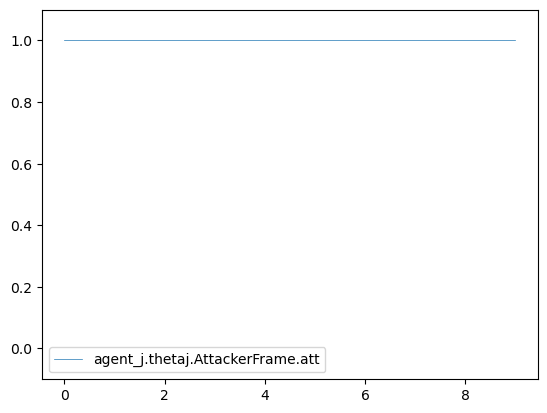

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action  \
0                   1.0                    0.0             Nop   
1                   0.0                    1.0             Nop   
2                   0.0                    1.0             Nop   
3                   0.0                    1.0             Nop   
4                   0.0                    1.0             Nop   
5                   0.0                    1.0             Nop   
6                   0.0                    1.0    EnumAccounts   
7                   0.0                    1.0      PrivEscAcc   
8                   0.0                    1.0       FileRecon   
9                   0.0                    1.0  ManipulateData   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6           LogIOCs  
7               Nop  
8               Nop  
9               Nop

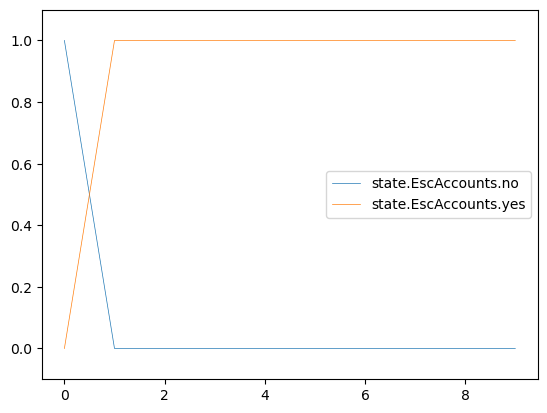

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000             Nop   
1                0.071429                 0.928571             Nop   
2                0.004587                 0.995413             Nop   
3                0.003152                 0.996848             Nop   
4                0.003151                 0.996849             Nop   
5                0.003151                 0.996849             Nop   
6                0.003151                 0.996849    EnumAccounts   
7                0.000479                 0.999521      PrivEscAcc   
8                0.000000                 1.000000       FileRecon   
9                0.000000                 1.000000  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                         none                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                    perms_change  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

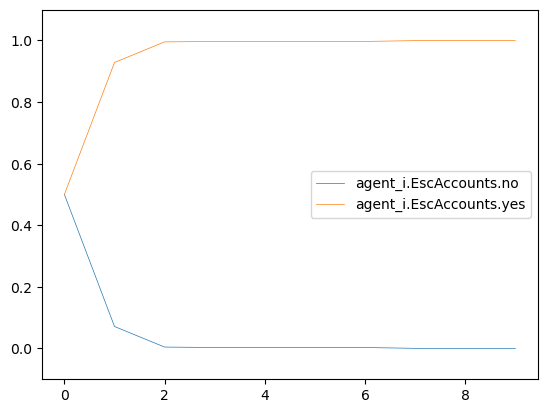

agent_j.EscAccounts.no  agent_j.EscAccounts.yes    agent_j.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0           LogIOCs   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                   login_activity  
1             Nop                             none  
2             Nop                             none  
3             Nop                        file_enum  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                             none  
7      PrivEscAcc                   login_activity  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

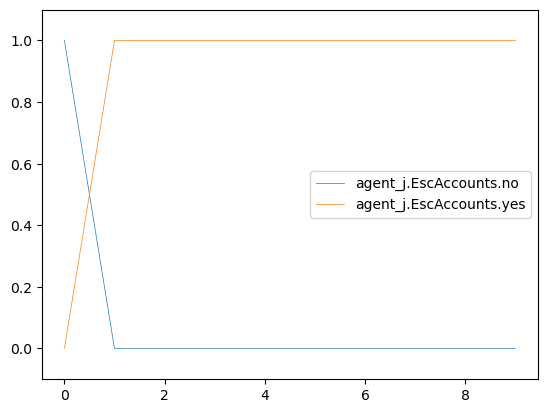

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action    agent_j.action
0                1.0                 0.0             Nop      DecoyAccount
1                1.0                 0.0             Nop  RestrictAccPrivs
2                1.0                 0.0             Nop               Nop
3                1.0                 0.0             Nop               Nop
4                1.0                 0.0             Nop               Nop
5                1.0                 0.0             Nop               Nop
6                1.0                 0.0    EnumAccounts           LogIOCs
7                0.0                 1.0      PrivEscAcc               Nop
8                0.0                 1.0       FileRecon               Nop
9                0.0                 1.0  ManipulateData               Nop

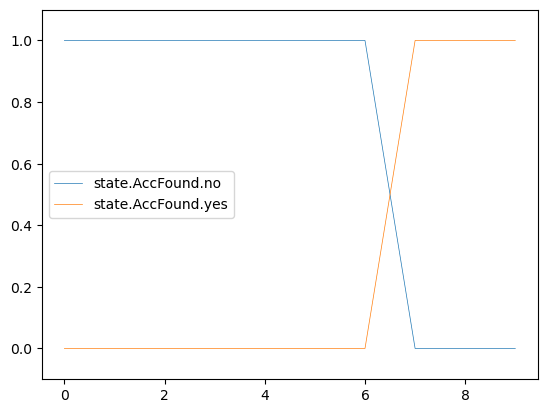

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action  \
0             1.000000              0.000000             Nop   
1             1.000000              0.000000             Nop   
2             1.000000              0.000000             Nop   
3             1.000000              0.000000             Nop   
4             1.000000              0.000000             Nop   
5             1.000000              0.000000             Nop   
6             1.000000              0.000000    EnumAccounts   
7             0.045912              0.954088      PrivEscAcc   
8             0.000000              1.000000       FileRecon   
9             0.000000              1.000000  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                         none                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                    perms_change  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

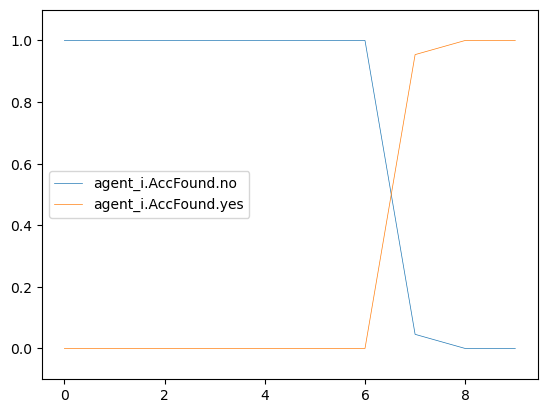

agent_j.AccFound.no  agent_j.AccFound.yes    agent_j.action  \
0             1.000000              0.000000      DecoyAccount   
1             1.000000              0.000000  RestrictAccPrivs   
2             0.751500              0.248500               Nop   
3             0.300037              0.699963               Nop   
4             0.378554              0.621446               Nop   
5             0.690524              0.309476               Nop   
6             0.728198              0.271802           LogIOCs   
7             0.729032              0.270968               Nop   
8             0.729032              0.270968               Nop   
9             0.729032              0.270968               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                   login_activity  
1             Nop                             none  
2             Nop                             none  
3             Nop                        file_enum  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                             none  
7      PrivEscAcc                   login_activity  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

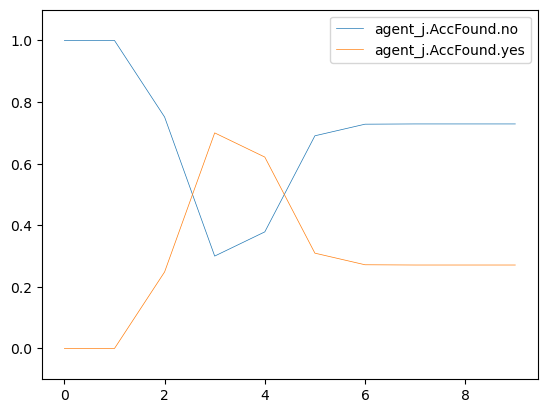

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action    agent_j.action  
0                      1.0             Nop      DecoyAccount  
1                      1.0             Nop  RestrictAccPrivs  
2                      1.0             Nop               Nop  
3                      1.0             Nop               Nop  
4                      1.0             Nop               Nop  
5                      1.0             Nop               Nop  
6                      1.0    EnumAccounts           LogIOCs  
7                      1.0      PrivEscAcc               Nop  
8                      1.0       FileRecon               Nop  
9                      1.0  ManipulateData               Nop

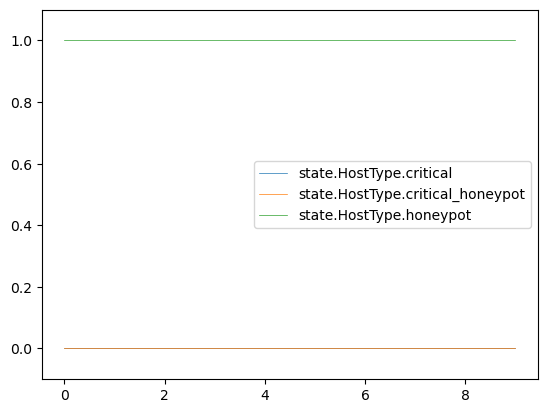

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot  agent_i.action    agent_j.action  \
0                        0.0             Nop      DecoyAccount   
1                        0.0             Nop  RestrictAccPrivs   
2                        0.0             Nop               Nop   
3                        0.0             Nop               Nop   
4                        0.0             Nop               Nop   
5                        0.0             Nop               Nop   
6                        0.0    EnumAccounts           LogIOCs   
7                        0.0      PrivEscAcc               Nop   
8                        0.0       FileRecon               Nop   
9                        0.0  ManipulateData               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                            auth                         none   
1                          denied                         none   
2                          denied                         none   
3                            auth                         none   
4                          denied                         none   
5                            auth                         none   
6                          denied                         none   
7                            auth                         none   
8                            auth                         none   
9                            auth                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           failure                          active   
4                           failure                          active   
5                           success                          active   
6                           success                          active   
7                           success                          active   
8                           success                          active   
9                           success                          active   

  agent_i.observation.DefenseObs'  
0                            none  
1                    perms_change  
2                            none  
3                            none  
4                            none  
5                    perms_change  
6                            none  
7                            none  
8                            none  
9                            none

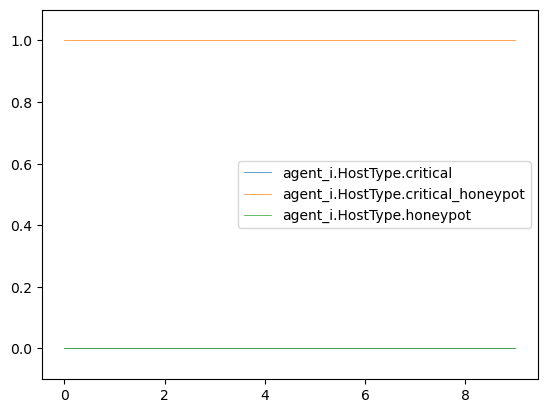

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot    agent_j.action  agent_i.action  \
0                        1.0      DecoyAccount             Nop   
1                        1.0  RestrictAccPrivs             Nop   
2                        1.0               Nop             Nop   
3                        1.0               Nop             Nop   
4                        1.0               Nop             Nop   
5                        1.0               Nop             Nop   
6                        1.0           LogIOCs    EnumAccounts   
7                        1.0               Nop      PrivEscAcc   
8                        1.0               Nop       FileRecon   
9                        1.0               Nop  ManipulateData   

  agent_j.observation.EndPtAlerts'  
0                   login_activity  
1                             none  
2                             none  
3                        file_enum  
4                             none  
5                             none  
6                             none  
7                   login_activity  
8                        file_enum  
9                       file_write

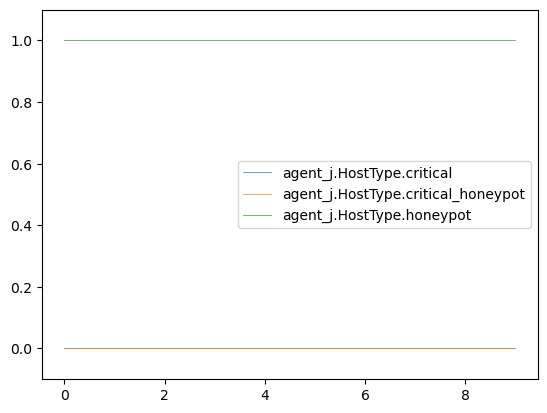

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0             Nop   
1                    1.0                     0.0             Nop   
2                    1.0                     0.0             Nop   
3                    1.0                     0.0             Nop   
4                    1.0                     0.0             Nop   
5                    1.0                     0.0             Nop   
6                    1.0                     0.0    EnumAccounts   
7                    1.0                     0.0      PrivEscAcc   
8                    1.0                     0.0       FileRecon   
9                    1.0                     0.0  ManipulateData   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6           LogIOCs  
7               Nop  
8               Nop  
9               Nop

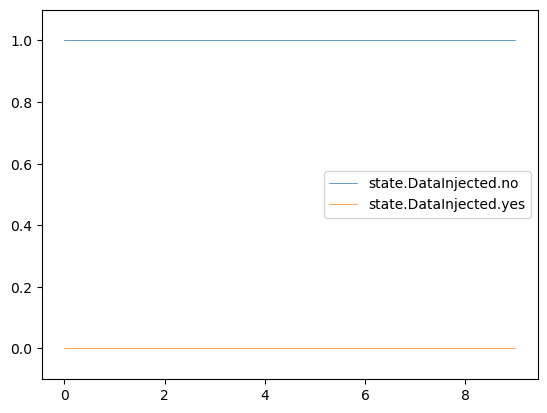

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                      1.0                       0.0             Nop   
1                      1.0                       0.0             Nop   
2                      1.0                       0.0             Nop   
3                      1.0                       0.0             Nop   
4                      1.0                       0.0             Nop   
5                      1.0                       0.0             Nop   
6                      1.0                       0.0    EnumAccounts   
7                      1.0                       0.0      PrivEscAcc   
8                      1.0                       0.0       FileRecon   
9                      1.0                       0.0  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                         none                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                    perms_change  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

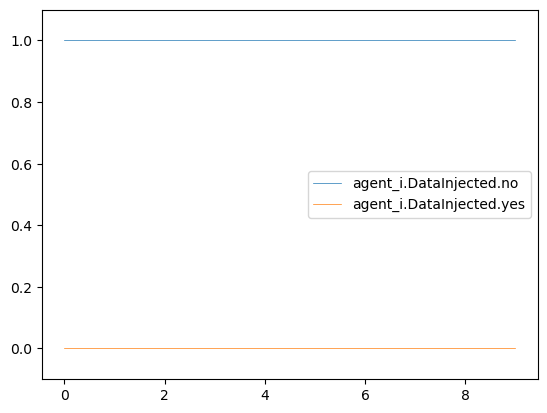

agent_j.DataInjected.no  agent_j.DataInjected.yes    agent_j.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.370000                  0.630000               Nop   
3                 0.370028                  0.629972               Nop   
4                 0.485387                  0.514613               Nop   
5                 0.148774                  0.851226               Nop   
6                 0.124263                  0.875737           LogIOCs   
7                 0.123519                  0.876481               Nop   
8                 0.123514                  0.876486               Nop   
9                 0.123514                  0.876486               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                   login_activity  
1             Nop                             none  
2             Nop                             none  
3             Nop                        file_enum  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                             none  
7      PrivEscAcc                   login_activity  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

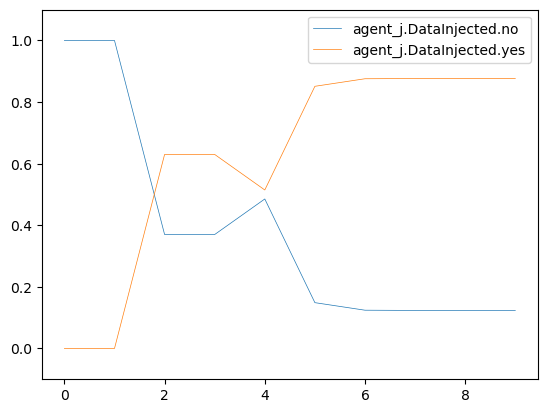

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes  agent_i.action    agent_j.action
0                  1.0                   0.0             Nop      DecoyAccount
1                  1.0                   0.0             Nop  RestrictAccPrivs
2                  1.0                   0.0             Nop               Nop
3                  1.0                   0.0             Nop               Nop
4                  1.0                   0.0             Nop               Nop
5                  1.0                   0.0             Nop               Nop
6                  1.0                   0.0    EnumAccounts           LogIOCs
7                  0.0                   1.0      PrivEscAcc               Nop
8                  0.0                   1.0       FileRecon               Nop
9                  0.0                   1.0  ManipulateData               Nop

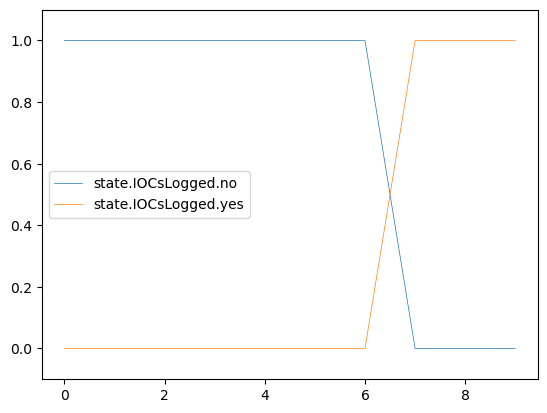

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes  agent_i.action  \
0               1.000000                0.000000             Nop   
1               1.000000                0.000000             Nop   
2               1.000000                0.000000             Nop   
3               1.000000                0.000000             Nop   
4               1.000000                0.000000             Nop   
5               0.901624                0.098376             Nop   
6               0.818054                0.181946    EnumAccounts   
7               0.453785                0.546215      PrivEscAcc   
8               0.361203                0.638797       FileRecon   
9               0.273715                0.726285  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                         none                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                    perms_change  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

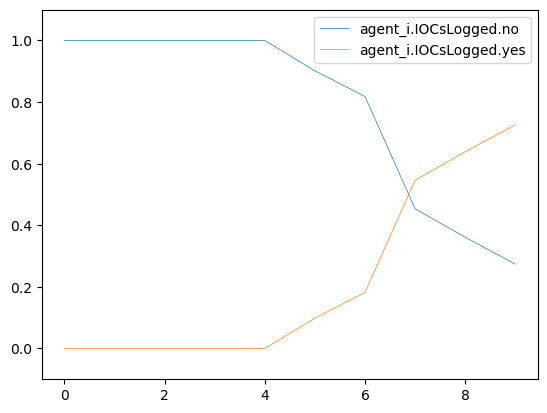

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes    agent_j.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0  RestrictAccPrivs   
2                    1.0                     0.0               Nop   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0           LogIOCs   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                   login_activity  
1             Nop                             none  
2             Nop                             none  
3             Nop                        file_enum  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                             none  
7      PrivEscAcc                   login_activity  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

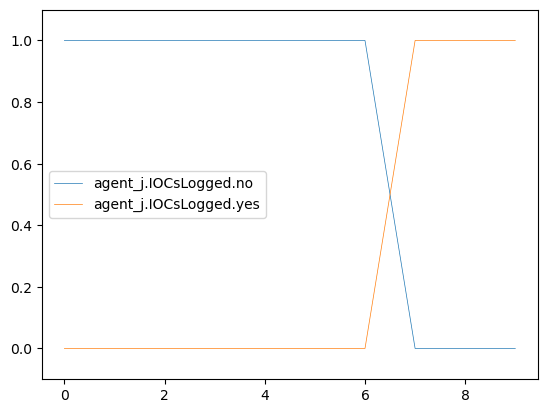

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action    agent_j.action
0                 0.0                  1.0             Nop      DecoyAccount
1                 0.0                  1.0             Nop  RestrictAccPrivs
2                 0.0                  1.0             Nop               Nop
3                 0.0                  1.0             Nop               Nop
4                 0.0                  1.0             Nop               Nop
5                 0.0                  1.0             Nop               Nop
6                 0.0                  1.0    EnumAccounts           LogIOCs
7                 0.0                  1.0      PrivEscAcc               Nop
8                 0.0                  1.0       FileRecon               Nop
9                 0.0                  1.0  ManipulateData               Nop

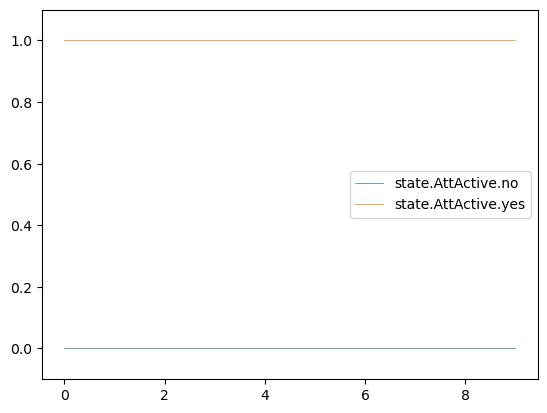

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action  \
0                   0.0                    1.0             Nop   
1                   0.0                    1.0             Nop   
2                   0.0                    1.0             Nop   
3                   0.0                    1.0             Nop   
4                   0.0                    1.0             Nop   
5                   0.0                    1.0             Nop   
6                   0.0                    1.0    EnumAccounts   
7                   0.0                    1.0      PrivEscAcc   
8                   0.0                    1.0       FileRecon   
9                   0.0                    1.0  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                         none                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                    perms_change  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

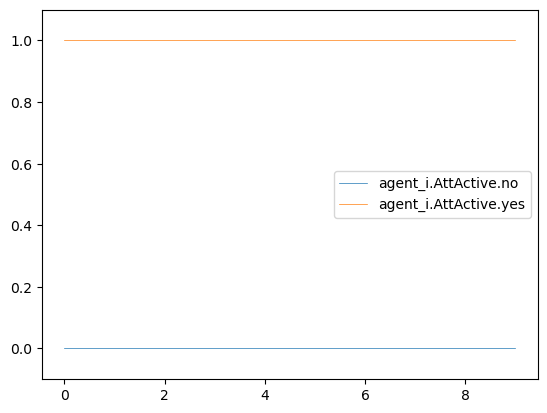

agent_j.AttActive.no  agent_j.AttActive.yes    agent_j.action  \
0              0.000000           1.000000e+00      DecoyAccount   
1              0.000000           9.999999e-01  RestrictAccPrivs   
2              0.000000           1.000000e+00               Nop   
3              0.000052           9.999476e-01               Nop   
4              0.031144           9.688557e-01               Nop   
5              0.858189           1.418104e-01               Nop   
6              0.990907           9.093527e-03           LogIOCs   
7              0.999809           1.908654e-04               Nop   
8              0.999989           1.139414e-05               Nop   
9              1.000000           8.256521e-08               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                   login_activity  
1             Nop                             none  
2             Nop                             none  
3             Nop                        file_enum  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                             none  
7      PrivEscAcc                   login_activity  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

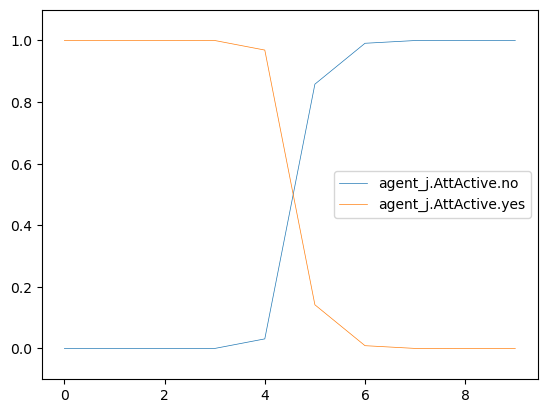

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action    agent_j.action
0                 1.0                  0.0             Nop      DecoyAccount
1                 1.0                  0.0             Nop  RestrictAccPrivs
2                 1.0                  0.0             Nop               Nop
3                 1.0                  0.0             Nop               Nop
4                 1.0                  0.0             Nop               Nop
5                 1.0                  0.0             Nop               Nop
6                 1.0                  0.0    EnumAccounts           LogIOCs
7                 1.0                  0.0      PrivEscAcc               Nop
8                 1.0                  0.0       FileRecon               Nop
9                 0.0                  1.0  ManipulateData               Nop

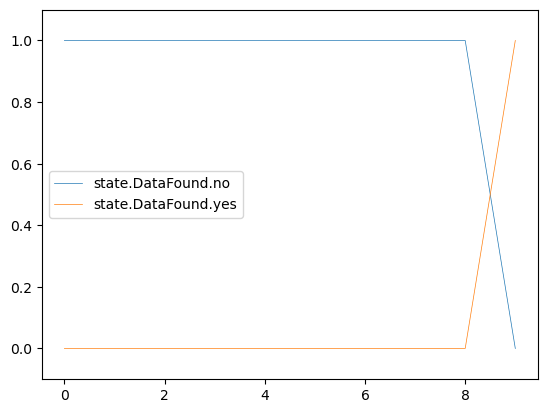

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action  \
0              1.000000               0.000000             Nop   
1              1.000000               0.000000             Nop   
2              1.000000               0.000000             Nop   
3              1.000000               0.000000             Nop   
4              1.000000               0.000000             Nop   
5              1.000000               0.000000             Nop   
6              1.000000               0.000000    EnumAccounts   
7              1.000000               0.000000      PrivEscAcc   
8              1.000000               0.000000       FileRecon   
9              0.093525               0.906475  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                         none                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                    perms_change  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

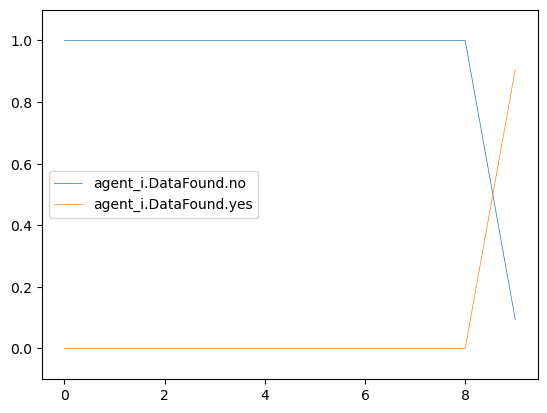

agent_j.DataFound.no  agent_j.DataFound.yes    agent_j.action  \
0              1.000000               0.000000      DecoyAccount   
1              0.300000               0.700000  RestrictAccPrivs   
2              0.300000               0.700000               Nop   
3              0.300032               0.699969               Nop   
4              0.155694               0.844306               Nop   
5              0.102899               0.897101               Nop   
6              0.103145               0.896855           LogIOCs   
7              0.103223               0.896777               Nop   
8              0.103223               0.896777               Nop   
9              0.103223               0.896777               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                   login_activity  
1             Nop                             none  
2             Nop                             none  
3             Nop                        file_enum  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                             none  
7      PrivEscAcc                   login_activity  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

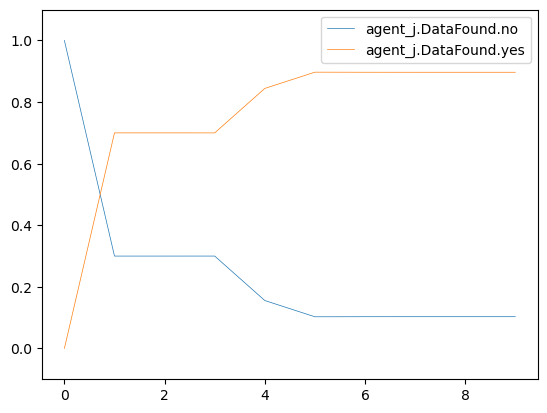

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action  \
0                   0.0                    1.0             Nop   
1                   0.0                    1.0             Nop   
2                   0.0                    1.0             Nop   
3                   0.0                    1.0             Nop   
4                   0.0                    1.0             Nop   
5                   0.0                    1.0             Nop   
6                   0.0                    1.0    EnumAccounts   
7                   0.0                    1.0      PrivEscAcc   
8                   0.0                    1.0       FileRecon   
9                   0.0                    1.0  ManipulateData   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6           LogIOCs  
7               Nop  
8               Nop  
9               Nop

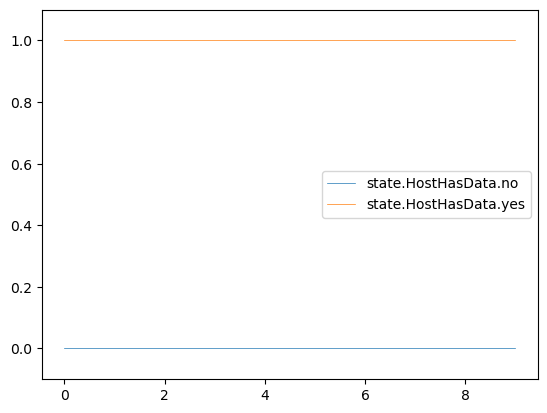

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000             Nop   
1                0.500000                 0.500000             Nop   
2                0.500000                 0.500000             Nop   
3                0.500000                 0.500000             Nop   
4                0.500000                 0.500000             Nop   
5                0.500000                 0.500000             Nop   
6                0.500000                 0.500000    EnumAccounts   
7                0.500000                 0.500000      PrivEscAcc   
8                0.500000                 0.500000       FileRecon   
9                0.071942                 0.928058  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                         none                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                    perms_change  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

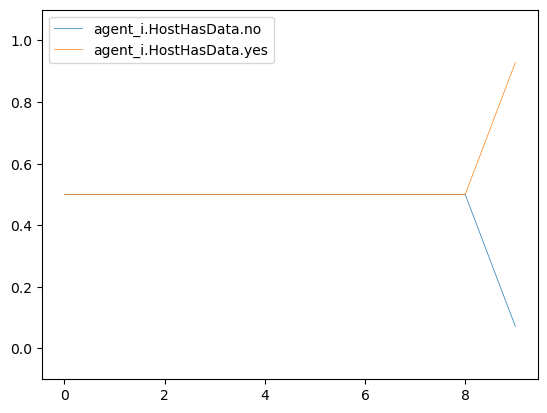

agent_j.HostHasData.no  agent_j.HostHasData.yes    agent_j.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0           LogIOCs   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                   login_activity  
1             Nop                             none  
2             Nop                             none  
3             Nop                        file_enum  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                             none  
7      PrivEscAcc                   login_activity  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

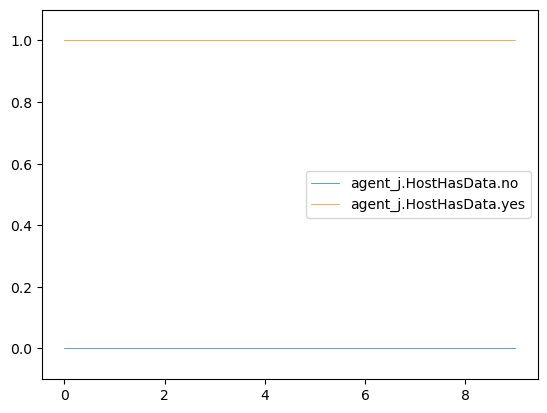

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action  \
0                   0.0                   1.0             Nop   
1                   0.0                   1.0             Nop   
2                   1.0                   0.0             Nop   
3                   1.0                   0.0             Nop   
4                   1.0                   0.0             Nop   
5                   1.0                   0.0             Nop   
6                   1.0                   0.0    EnumAccounts   
7                   1.0                   0.0      PrivEscAcc   
8                   1.0                   0.0       FileRecon   
9                   1.0                   0.0  ManipulateData   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6           LogIOCs  
7               Nop  
8               Nop  
9               Nop

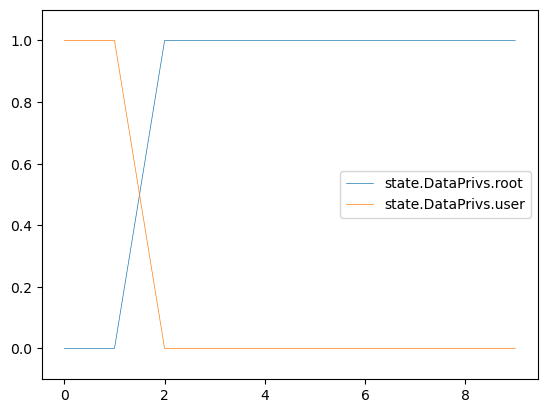

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000             Nop   
1                0.571429                0.428571             Nop   
2                1.000000                0.000000             Nop   
3                1.000000                0.000000             Nop   
4                1.000000                0.000000             Nop   
5                1.000000                0.000000             Nop   
6                1.000000                0.000000    EnumAccounts   
7                1.000000                0.000000      PrivEscAcc   
8                1.000000                0.000000       FileRecon   
9                1.000000                0.000000  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                         none                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                    perms_change  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

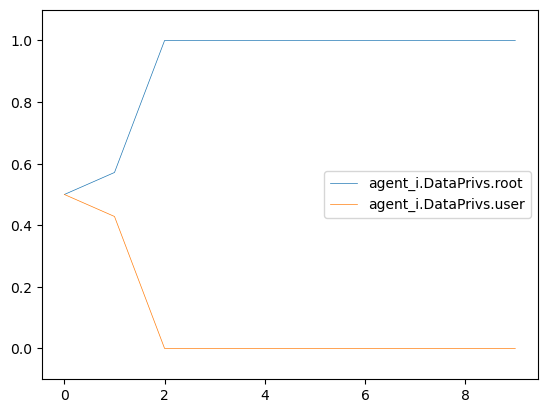

agent_j.DataPrivs.root  agent_j.DataPrivs.user    agent_j.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0           LogIOCs   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                   login_activity  
1             Nop                             none  
2             Nop                             none  
3             Nop                        file_enum  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                             none  
7      PrivEscAcc                   login_activity  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

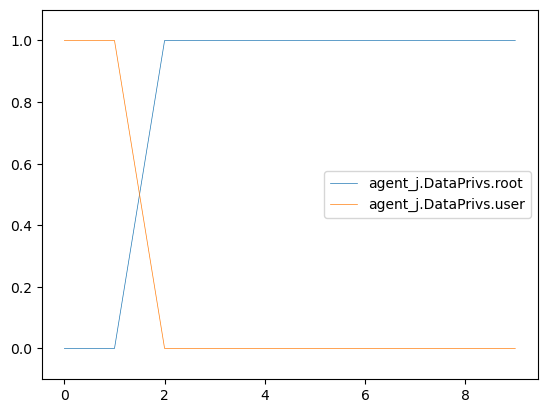

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0             Nop   
1                     0.0                     1.0             Nop   
2                     0.0                     1.0             Nop   
3                     0.0                     1.0             Nop   
4                     0.0                     1.0             Nop   
5                     0.0                     1.0             Nop   
6                     0.0                     1.0    EnumAccounts   
7                     0.0                     1.0      PrivEscAcc   
8                     1.0                     0.0       FileRecon   
9                     1.0                     0.0  ManipulateData   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6           LogIOCs  
7               Nop  
8               Nop  
9               Nop

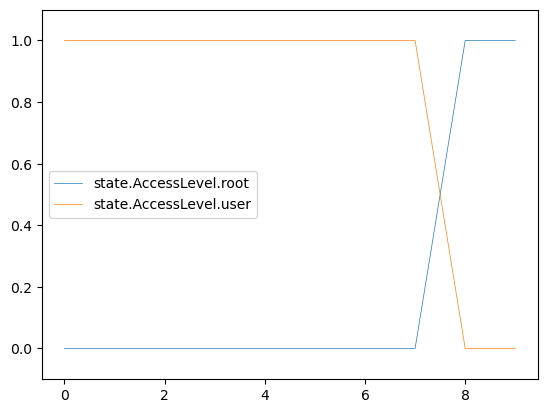

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                       0.0                       1.0             Nop   
1                       0.0                       1.0             Nop   
2                       0.0                       1.0             Nop   
3                       0.0                       1.0             Nop   
4                       0.0                       1.0             Nop   
5                       0.0                       1.0             Nop   
6                       0.0                       1.0    EnumAccounts   
7                       0.0                       1.0      PrivEscAcc   
8                       1.0                       0.0       FileRecon   
9                       1.0                       0.0  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                            auth   
1  RestrictAccPrivs                          denied   
2               Nop                          denied   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                            auth   
6           LogIOCs                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                         none                           failure   
2                         none                           failure   
3                         none                           failure   
4                         none                           failure   
5                         none                           success   
6                         none                           success   
7                         none                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                    perms_change  
2                          active                            none  
3                          active                            none  
4                          active                            none  
5                          active                    perms_change  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

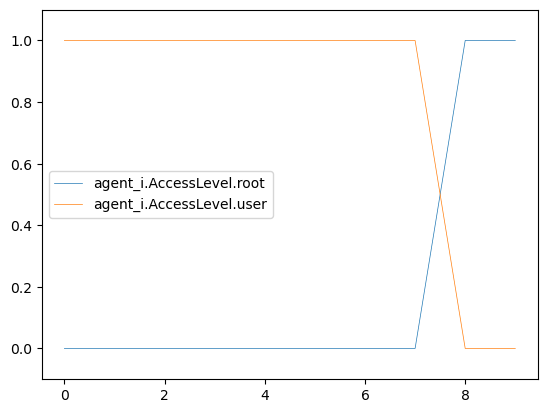

agent_j.AccessLevel.root  agent_j.AccessLevel.user    agent_j.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000               Nop   
3                  0.223640                  0.776360               Nop   
4                  0.529847                  0.470153               Nop   
5                  0.140096                  0.859904               Nop   
6                  0.093180                  0.906820           LogIOCs   
7                  0.092142                  0.907858               Nop   
8                  0.092142                  0.907858               Nop   
9                  0.092142                  0.907858               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                   login_activity  
1             Nop                             none  
2             Nop                             none  
3             Nop                        file_enum  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                             none  
7      PrivEscAcc                   login_activity  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

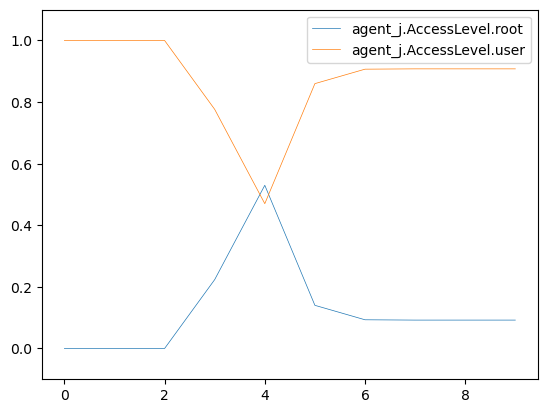

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.500000                        0.500000   
3                         0.345455                        0.654546   
4                         0.345342                        0.654658   
5                         0.345342                        0.654658   
6                         0.345342                        0.654658   
7                         0.472556                        0.527444   
8                         0.506785                        0.493215   
9                         0.506786                        0.493215   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                   user_files   
2                            auth                         none   
3                          denied                         none   
4                          denied                   user_files   
5                          denied                         none   
6                          denied                   user_files   
7                            auth                   user_files   
8                            auth                   user_files   
9                            auth                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           success                          active   
4                           failure                          active   
5                           failure                          active   
6                           success                          active   
7                           failure                          active   
8                           success                          active   
9                           success                          active   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4               acc_policy_change  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

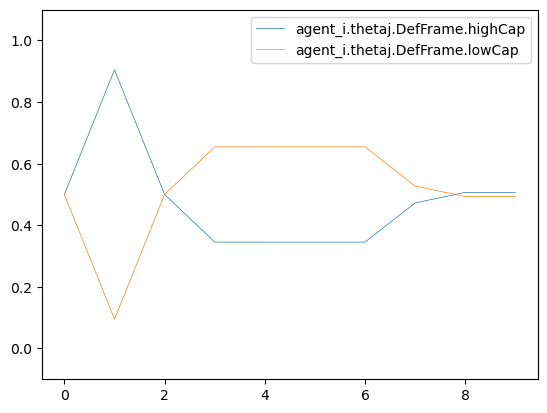

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                       file_write
2                               1.0                             none
3                               1.0                             none
4                               1.0                             none
5                               1.0                             none
6                               1.0                        file_enum
7                               1.0                       file_write
8                               1.0                        file_enum
9                               1.0                       file_write

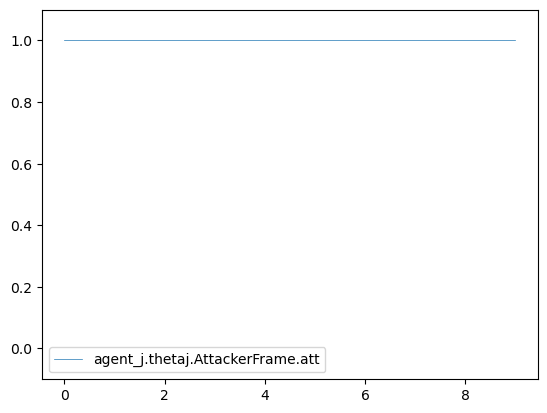

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action  \
0                   1.0                    0.0             Nop   
1                   0.0                    1.0             Nop   
2                   0.0                    1.0             Nop   
3                   0.0                    1.0             Nop   
4                   0.0                    1.0             Nop   
5                   0.0                    1.0             Nop   
6                   0.0                    1.0    EnumAccounts   
7                   0.0                    1.0      PrivEscAcc   
8                   0.0                    1.0       FileRecon   
9                   0.0                    1.0  ManipulateData   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5           LogIOCs  
6               Nop  
7               Nop  
8               Nop  
9               Nop

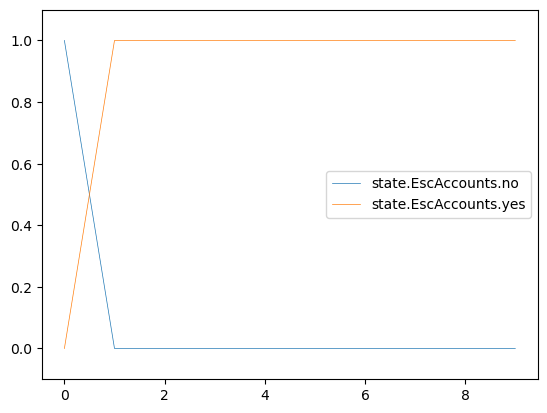

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000             Nop   
1                0.071429                 0.928571             Nop   
2                0.375000                 0.625000             Nop   
3                0.336364                 0.663636             Nop   
4                0.336336                 0.663664             Nop   
5                0.336336                 0.663664             Nop   
6                0.336336                 0.663664    EnumAccounts   
7                0.071310                 0.928690      PrivEscAcc   
8                0.000000                 1.000000       FileRecon   
9                0.000000                 1.000000  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4               Nop                          denied   
5           LogIOCs                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active               acc_policy_change  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

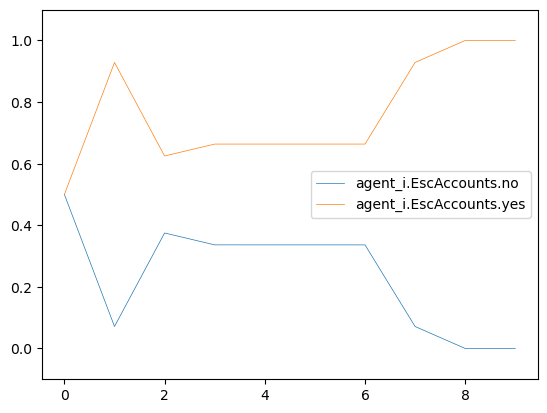

agent_j.EscAccounts.no  agent_j.EscAccounts.yes    agent_j.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0           LogIOCs   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                       file_write  
2             Nop                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                        file_enum  
7      PrivEscAcc                       file_write  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

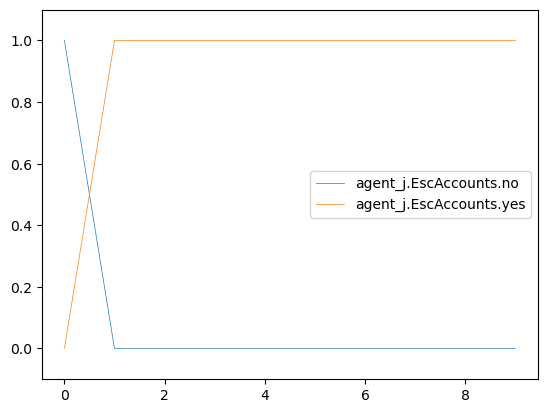

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action    agent_j.action
0                1.0                 0.0             Nop      DecoyAccount
1                1.0                 0.0             Nop  RestrictAccPrivs
2                1.0                 0.0             Nop               Nop
3                1.0                 0.0             Nop               Nop
4                1.0                 0.0             Nop               Nop
5                1.0                 0.0             Nop           LogIOCs
6                1.0                 0.0    EnumAccounts               Nop
7                0.0                 1.0      PrivEscAcc               Nop
8                0.0                 1.0       FileRecon               Nop
9                0.0                 1.0  ManipulateData               Nop

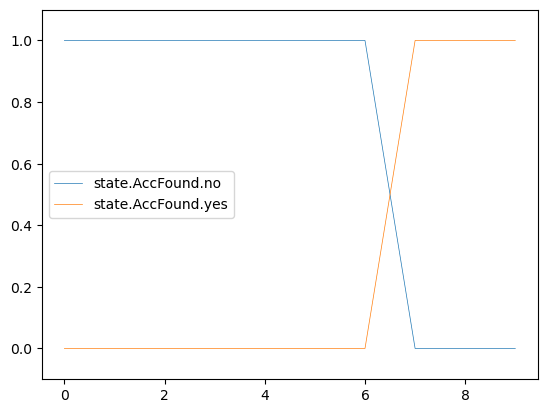

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action  \
0             1.000000              0.000000             Nop   
1             1.000000              0.000000             Nop   
2             1.000000              0.000000             Nop   
3             1.000000              0.000000             Nop   
4             1.000000              0.000000             Nop   
5             1.000000              0.000000             Nop   
6             1.000000              0.000000    EnumAccounts   
7             0.113523              0.886477      PrivEscAcc   
8             0.000000              1.000000       FileRecon   
9             0.000000              1.000000  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4               Nop                          denied   
5           LogIOCs                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active               acc_policy_change  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

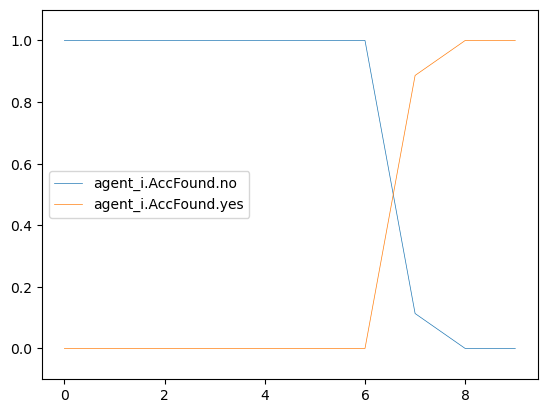

agent_j.AccFound.no  agent_j.AccFound.yes    agent_j.action  \
0             1.000000              0.000000      DecoyAccount   
1             1.000000              0.000000  RestrictAccPrivs   
2             0.948973              0.051027               Nop   
3             0.300053              0.699947               Nop   
4             0.362015              0.637985               Nop   
5             0.673039              0.326961           LogIOCs   
6             0.770298              0.229702               Nop   
7             0.768915              0.231085               Nop   
8             0.760570              0.239430               Nop   
9             0.760570              0.239430               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                       file_write  
2             Nop                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                        file_enum  
7      PrivEscAcc                       file_write  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

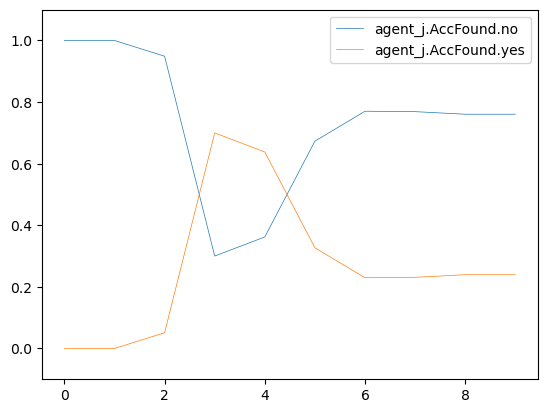

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action    agent_j.action  
0                      1.0             Nop      DecoyAccount  
1                      1.0             Nop  RestrictAccPrivs  
2                      1.0             Nop               Nop  
3                      1.0             Nop               Nop  
4                      1.0             Nop               Nop  
5                      1.0             Nop           LogIOCs  
6                      1.0    EnumAccounts               Nop  
7                      1.0      PrivEscAcc               Nop  
8                      1.0       FileRecon               Nop  
9                      1.0  ManipulateData               Nop

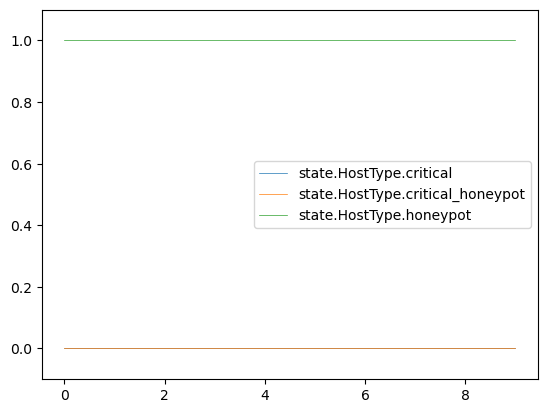

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot  agent_i.action    agent_j.action  \
0                        0.0             Nop      DecoyAccount   
1                        0.0             Nop  RestrictAccPrivs   
2                        0.0             Nop               Nop   
3                        0.0             Nop               Nop   
4                        0.0             Nop               Nop   
5                        0.0             Nop           LogIOCs   
6                        0.0    EnumAccounts               Nop   
7                        0.0      PrivEscAcc               Nop   
8                        0.0       FileRecon               Nop   
9                        0.0  ManipulateData               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                   user_files   
1                          denied                   user_files   
2                            auth                         none   
3                          denied                         none   
4                          denied                   user_files   
5                          denied                         none   
6                          denied                   user_files   
7                            auth                   user_files   
8                            auth                   user_files   
9                            auth                   user_files   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           success                          active   
4                           failure                          active   
5                           failure                          active   
6                           success                          active   
7                           failure                          active   
8                           success                          active   
9                           success                          active   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4               acc_policy_change  
5                            none  
6                            none  
7                            none  
8                            none  
9                            none

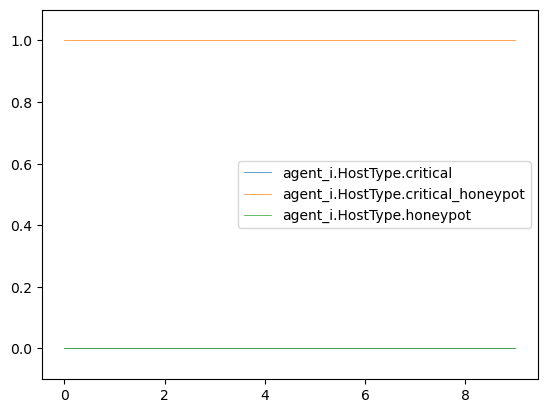

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot    agent_j.action  agent_i.action  \
0                        1.0      DecoyAccount             Nop   
1                        1.0  RestrictAccPrivs             Nop   
2                        1.0               Nop             Nop   
3                        1.0               Nop             Nop   
4                        1.0               Nop             Nop   
5                        1.0           LogIOCs             Nop   
6                        1.0               Nop    EnumAccounts   
7                        1.0               Nop      PrivEscAcc   
8                        1.0               Nop       FileRecon   
9                        1.0               Nop  ManipulateData   

  agent_j.observation.EndPtAlerts'  
0                             none  
1                       file_write  
2                             none  
3                             none  
4                             none  
5                             none  
6                        file_enum  
7                       file_write  
8                        file_enum  
9                       file_write

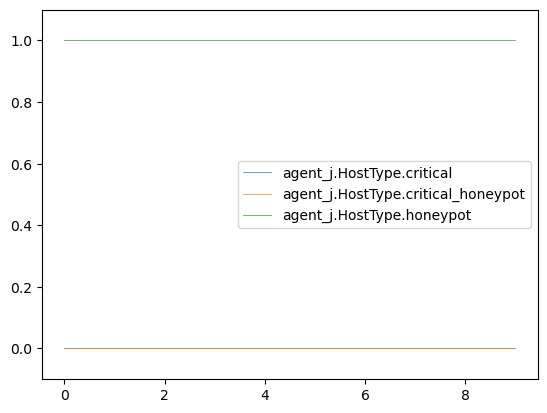

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0             Nop   
1                    1.0                     0.0             Nop   
2                    1.0                     0.0             Nop   
3                    1.0                     0.0             Nop   
4                    1.0                     0.0             Nop   
5                    1.0                     0.0             Nop   
6                    1.0                     0.0    EnumAccounts   
7                    1.0                     0.0      PrivEscAcc   
8                    1.0                     0.0       FileRecon   
9                    1.0                     0.0  ManipulateData   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5           LogIOCs  
6               Nop  
7               Nop  
8               Nop  
9               Nop

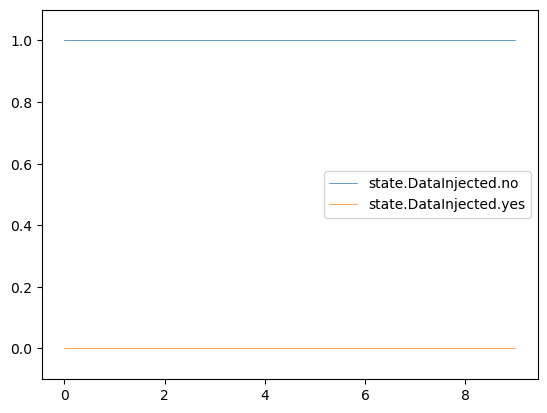

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                      1.0                       0.0             Nop   
1                      1.0                       0.0             Nop   
2                      1.0                       0.0             Nop   
3                      1.0                       0.0             Nop   
4                      1.0                       0.0             Nop   
5                      1.0                       0.0             Nop   
6                      1.0                       0.0    EnumAccounts   
7                      1.0                       0.0      PrivEscAcc   
8                      1.0                       0.0       FileRecon   
9                      1.0                       0.0  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4               Nop                          denied   
5           LogIOCs                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active               acc_policy_change  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

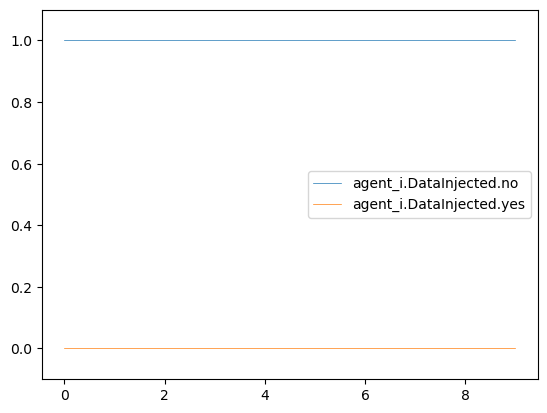

agent_j.DataInjected.no  agent_j.DataInjected.yes    agent_j.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.094456                  0.905544               Nop   
3                 0.094514                  0.905486               Nop   
4                 0.207924                  0.792076               Nop   
5                 0.313082                  0.686918           LogIOCs   
6                 0.351156                  0.648844               Nop   
7                 0.350595                  0.649405               Nop   
8                 0.346568                  0.653432               Nop   
9                 0.346560                  0.653440               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                       file_write  
2             Nop                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                        file_enum  
7      PrivEscAcc                       file_write  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

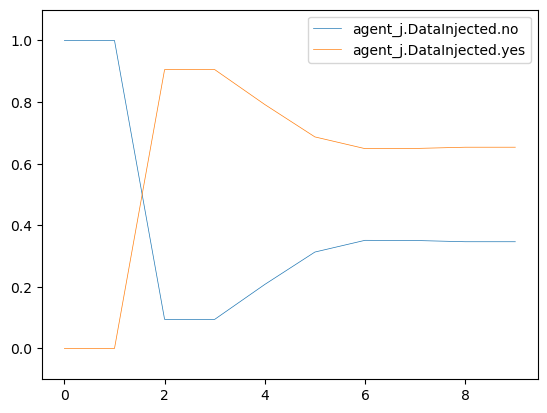

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes  agent_i.action    agent_j.action
0                  1.0                   0.0             Nop      DecoyAccount
1                  1.0                   0.0             Nop  RestrictAccPrivs
2                  1.0                   0.0             Nop               Nop
3                  1.0                   0.0             Nop               Nop
4                  1.0                   0.0             Nop               Nop
5                  1.0                   0.0             Nop           LogIOCs
6                  0.0                   1.0    EnumAccounts               Nop
7                  0.0                   1.0      PrivEscAcc               Nop
8                  0.0                   1.0       FileRecon               Nop
9                  0.0                   1.0  ManipulateData               Nop

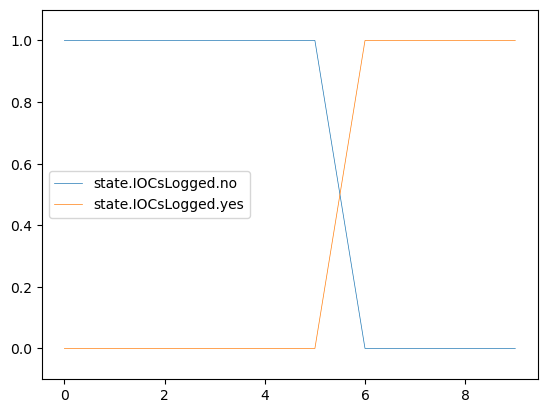

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes  agent_i.action  \
0               1.000000                0.000000             Nop   
1               1.000000                0.000000             Nop   
2               1.000000                0.000000             Nop   
3               1.000000                0.000000             Nop   
4               1.000000                0.000000             Nop   
5               0.967594                0.032406             Nop   
6               0.940066                0.059934    EnumAccounts   
7               0.748896                0.251104      PrivEscAcc   
8               0.683937                0.316063       FileRecon   
9               0.640650                0.359350  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4               Nop                          denied   
5           LogIOCs                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active               acc_policy_change  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

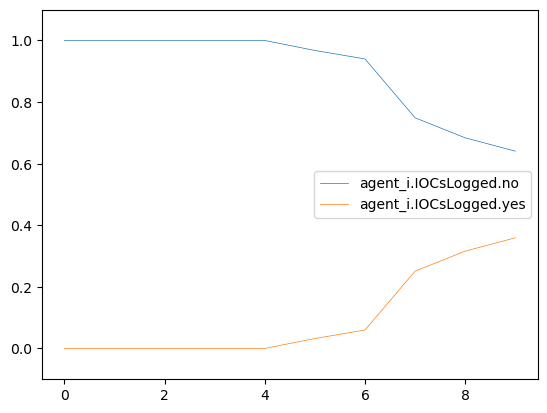

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes    agent_j.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0  RestrictAccPrivs   
2                    1.0                     0.0               Nop   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0           LogIOCs   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                       file_write  
2             Nop                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                        file_enum  
7      PrivEscAcc                       file_write  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

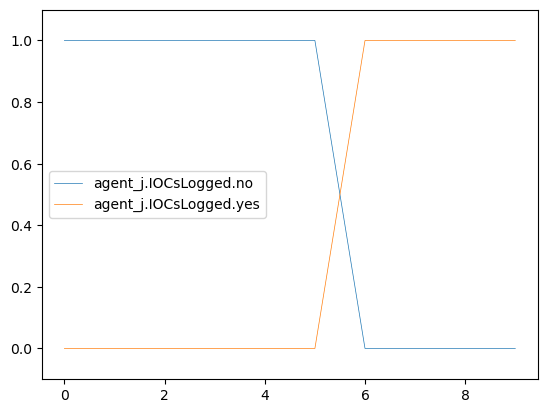

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action    agent_j.action
0                 0.0                  1.0             Nop      DecoyAccount
1                 0.0                  1.0             Nop  RestrictAccPrivs
2                 0.0                  1.0             Nop               Nop
3                 0.0                  1.0             Nop               Nop
4                 0.0                  1.0             Nop               Nop
5                 0.0                  1.0             Nop           LogIOCs
6                 0.0                  1.0    EnumAccounts               Nop
7                 0.0                  1.0      PrivEscAcc               Nop
8                 0.0                  1.0       FileRecon               Nop
9                 0.0                  1.0  ManipulateData               Nop

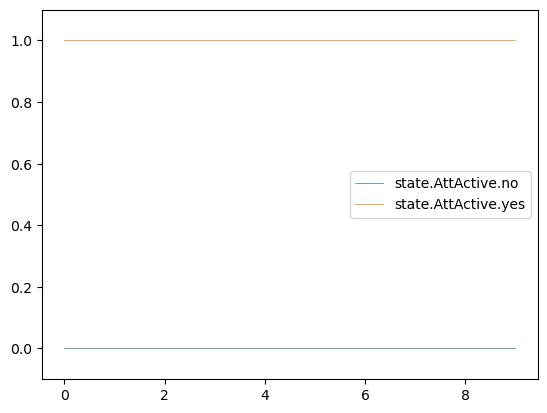

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action  \
0                   0.0                    1.0             Nop   
1                   0.0                    1.0             Nop   
2                   0.0                    1.0             Nop   
3                   0.0                    1.0             Nop   
4                   0.0                    1.0             Nop   
5                   0.0                    1.0             Nop   
6                   0.0                    1.0    EnumAccounts   
7                   0.0                    1.0      PrivEscAcc   
8                   0.0                    1.0       FileRecon   
9                   0.0                    1.0  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4               Nop                          denied   
5           LogIOCs                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active               acc_policy_change  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

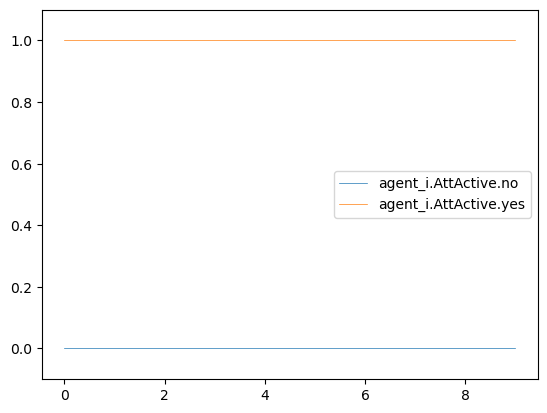

agent_j.AttActive.no  agent_j.AttActive.yes    agent_j.action  \
0              0.000000               1.000000      DecoyAccount   
1              0.000000               1.000000  RestrictAccPrivs   
2              0.000000               1.000000               Nop   
3              0.000075               0.999924               Nop   
4              0.146122               0.853878               Nop   
5              0.837596               0.162404           LogIOCs   
6              0.975913               0.024087               Nop   
7              0.995610               0.004390               Nop   
8              0.987312               0.012688               Nop   
9              0.999978               0.000022               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                       file_write  
2             Nop                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                        file_enum  
7      PrivEscAcc                       file_write  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

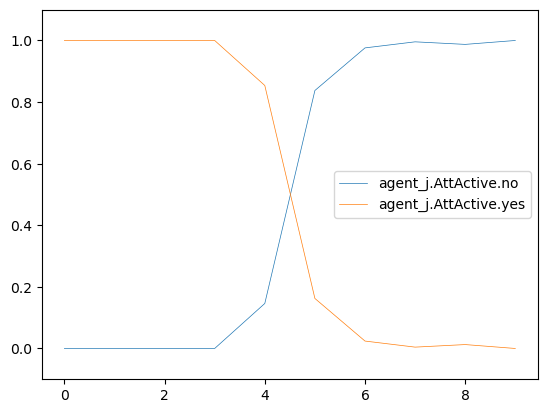

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action    agent_j.action
0                 1.0                  0.0             Nop      DecoyAccount
1                 1.0                  0.0             Nop  RestrictAccPrivs
2                 1.0                  0.0             Nop               Nop
3                 1.0                  0.0             Nop               Nop
4                 1.0                  0.0             Nop               Nop
5                 1.0                  0.0             Nop           LogIOCs
6                 1.0                  0.0    EnumAccounts               Nop
7                 1.0                  0.0      PrivEscAcc               Nop
8                 1.0                  0.0       FileRecon               Nop
9                 0.0                  1.0  ManipulateData               Nop

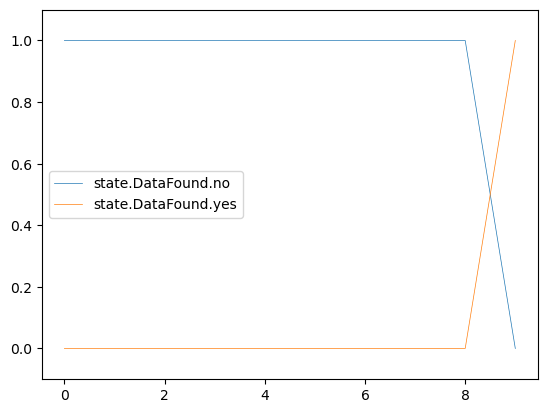

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action  \
0              1.000000               0.000000             Nop   
1              1.000000               0.000000             Nop   
2              1.000000               0.000000             Nop   
3              1.000000               0.000000             Nop   
4              1.000000               0.000000             Nop   
5              1.000000               0.000000             Nop   
6              1.000000               0.000000    EnumAccounts   
7              1.000000               0.000000      PrivEscAcc   
8              1.000000               0.000000       FileRecon   
9              0.093525               0.906475  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4               Nop                          denied   
5           LogIOCs                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active               acc_policy_change  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

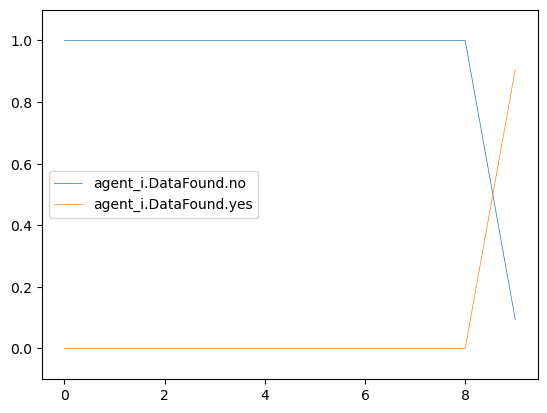

agent_j.DataFound.no  agent_j.DataFound.yes    agent_j.action  \
0              1.000000               0.000000      DecoyAccount   
1              0.300000               0.700000  RestrictAccPrivs   
2              0.080082               0.919918               Nop   
3              0.080142               0.919858               Nop   
4              0.147129               0.852871               Nop   
5              0.248237               0.751763           LogIOCs   
6              0.282438               0.717561               Nop   
7              0.281967               0.718033               Nop   
8              0.278921               0.721079               Nop   
9              0.278921               0.721079               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                       file_write  
2             Nop                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                        file_enum  
7      PrivEscAcc                       file_write  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

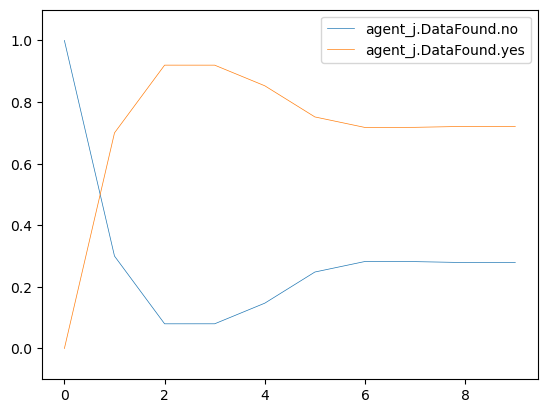

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action  \
0                   0.0                    1.0             Nop   
1                   0.0                    1.0             Nop   
2                   0.0                    1.0             Nop   
3                   0.0                    1.0             Nop   
4                   0.0                    1.0             Nop   
5                   0.0                    1.0             Nop   
6                   0.0                    1.0    EnumAccounts   
7                   0.0                    1.0      PrivEscAcc   
8                   0.0                    1.0       FileRecon   
9                   0.0                    1.0  ManipulateData   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5           LogIOCs  
6               Nop  
7               Nop  
8               Nop  
9               Nop

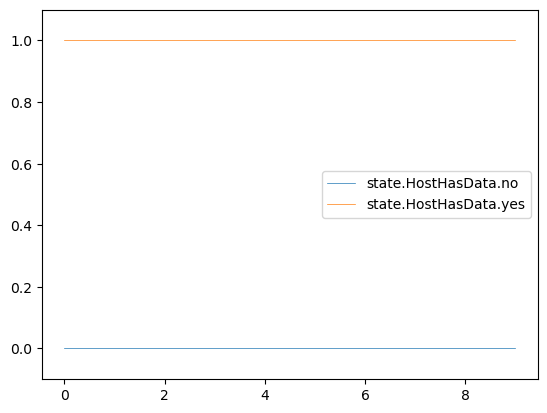

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000             Nop   
1                0.500000                 0.500000             Nop   
2                0.500000                 0.500000             Nop   
3                0.500000                 0.500000             Nop   
4                0.500000                 0.500000             Nop   
5                0.500000                 0.500000             Nop   
6                0.500000                 0.500000    EnumAccounts   
7                0.500000                 0.500000      PrivEscAcc   
8                0.500000                 0.500000       FileRecon   
9                0.071942                 0.928058  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4               Nop                          denied   
5           LogIOCs                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active               acc_policy_change  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

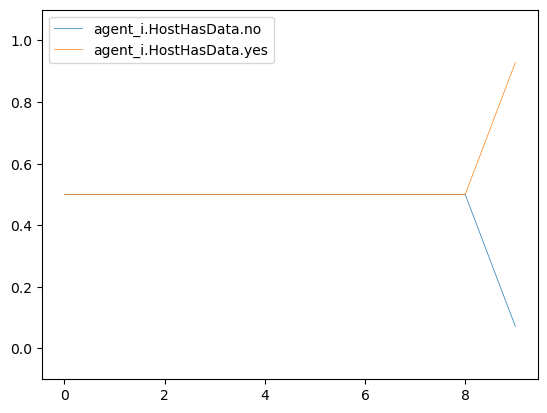

agent_j.HostHasData.no  agent_j.HostHasData.yes    agent_j.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0           LogIOCs   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                       file_write  
2             Nop                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                        file_enum  
7      PrivEscAcc                       file_write  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

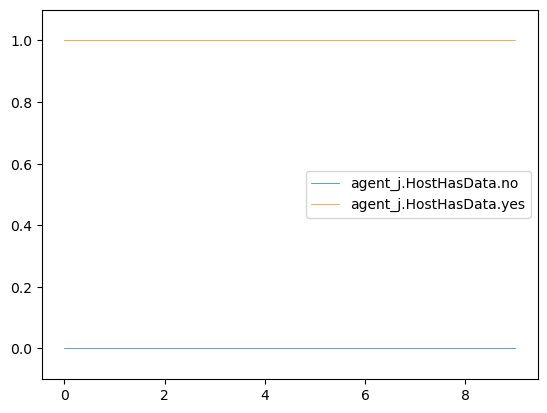

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action  \
0                   0.0                   1.0             Nop   
1                   0.0                   1.0             Nop   
2                   1.0                   0.0             Nop   
3                   1.0                   0.0             Nop   
4                   1.0                   0.0             Nop   
5                   1.0                   0.0             Nop   
6                   1.0                   0.0    EnumAccounts   
7                   1.0                   0.0      PrivEscAcc   
8                   1.0                   0.0       FileRecon   
9                   1.0                   0.0  ManipulateData   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5           LogIOCs  
6               Nop  
7               Nop  
8               Nop  
9               Nop

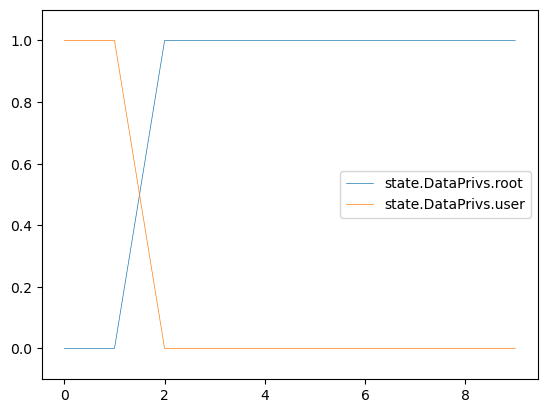

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000             Nop   
1                0.571429                0.428571             Nop   
2                1.000000                0.000000             Nop   
3                1.000000                0.000000             Nop   
4                1.000000                0.000000             Nop   
5                1.000000                0.000000             Nop   
6                1.000000                0.000000    EnumAccounts   
7                1.000000                0.000000      PrivEscAcc   
8                1.000000                0.000000       FileRecon   
9                1.000000                0.000000  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4               Nop                          denied   
5           LogIOCs                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active               acc_policy_change  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

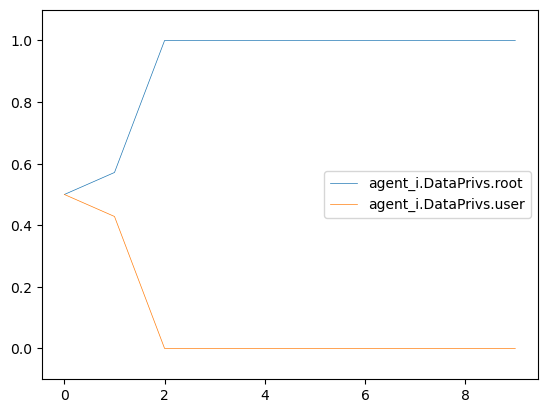

agent_j.DataPrivs.root  agent_j.DataPrivs.user    agent_j.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0           LogIOCs   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                       file_write  
2             Nop                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                        file_enum  
7      PrivEscAcc                       file_write  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

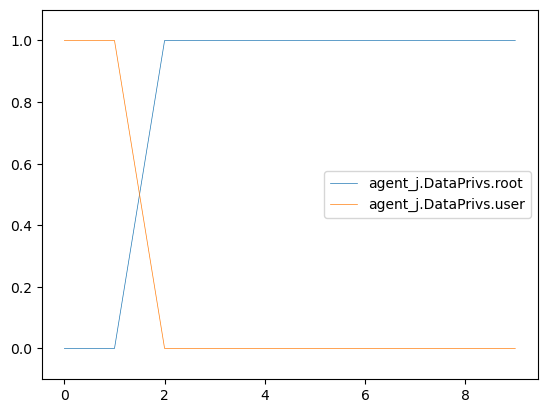

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0             Nop   
1                     0.0                     1.0             Nop   
2                     0.0                     1.0             Nop   
3                     0.0                     1.0             Nop   
4                     0.0                     1.0             Nop   
5                     0.0                     1.0             Nop   
6                     0.0                     1.0    EnumAccounts   
7                     0.0                     1.0      PrivEscAcc   
8                     1.0                     0.0       FileRecon   
9                     1.0                     0.0  ManipulateData   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5           LogIOCs  
6               Nop  
7               Nop  
8               Nop  
9               Nop

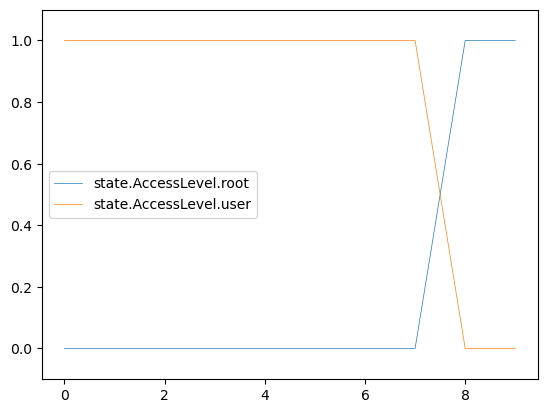

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                       0.0                       1.0             Nop   
1                       0.0                       1.0             Nop   
2                       0.0                       1.0             Nop   
3                       0.0                       1.0             Nop   
4                       0.0                       1.0             Nop   
5                       0.0                       1.0             Nop   
6                       0.0                       1.0    EnumAccounts   
7                       0.0                       1.0      PrivEscAcc   
8                       1.0                       0.0       FileRecon   
9                       1.0                       0.0  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                          denied   
4               Nop                          denied   
5           LogIOCs                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                   user_files                           failure   
1                   user_files                           failure   
2                         none                           failure   
3                         none                           success   
4                   user_files                           failure   
5                         none                           failure   
6                   user_files                           success   
7                   user_files                           failure   
8                   user_files                           success   
9                   user_files                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active               acc_policy_change  
5                          active                            none  
6                          active                            none  
7                          active                            none  
8                          active                            none  
9                          active                            none

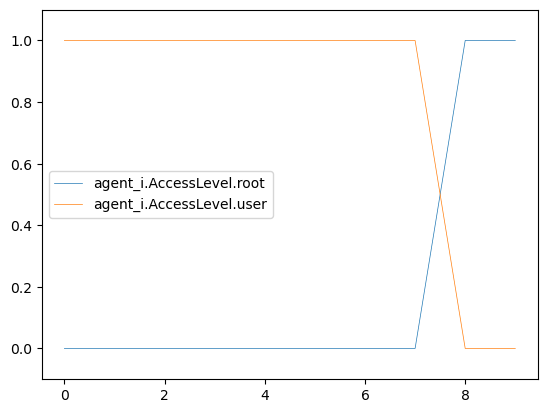

agent_j.AccessLevel.root  agent_j.AccessLevel.user    agent_j.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000               Nop   
3                  0.045921                  0.954079               Nop   
4                  0.551052                  0.448948               Nop   
5                  0.155430                  0.844570           LogIOCs   
6                  0.033382                  0.966619               Nop   
7                  0.035118                  0.964882               Nop   
8                  0.045589                  0.954411               Nop   
9                  0.045589                  0.954411               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                             none  
1             Nop                       file_write  
2             Nop                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                        file_enum  
7      PrivEscAcc                       file_write  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

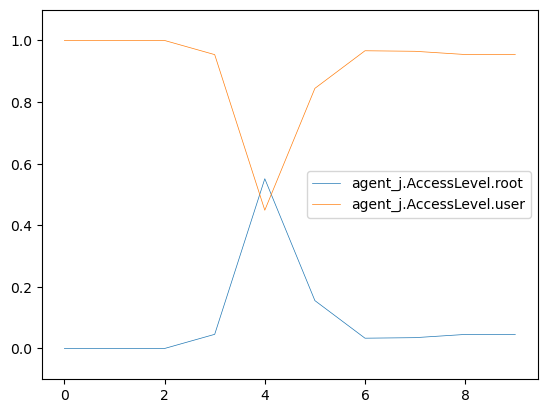

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.DefFrame.highCap  agent_i.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.904762                        0.095238   
2                         0.500000                        0.500000   
3                         0.345455                        0.654546   
4                         0.345342                        0.654658   
5                         0.345342                        0.654658   
6                         0.345342                        0.654658   
7                         0.472556                        0.527444   
8                         0.506785                        0.493214   
9                         0.506786                        0.493215   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                            auth                   user_files   
3                            auth                   user_files   
4                          denied                   user_files   
5                          denied                         none   
6                          denied                         none   
7                            auth                   user_files   
8                            auth                         none   
9                            auth                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           success                          active   
4                           failure                          active   
5                           failure                          active   
6                           success                          active   
7                           success                          active   
8                           success                          active   
9                           success                          active   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                    perms_change  
5                    perms_change  
6                            none  
7               acc_policy_change  
8                            none  
9                            none

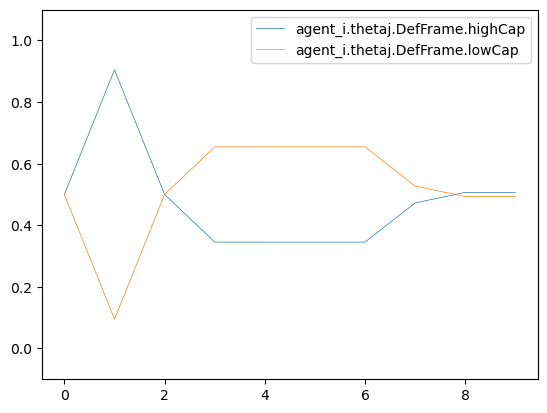

agent_j.thetaj.AttackerFrame.att agent_j.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                   login_activity
2                               1.0                             none
3                               1.0                             none
4                               1.0                             none
5                               1.0                             none
6                               1.0                        file_enum
7                               1.0                             none
8                               1.0                        file_enum
9                               1.0                       file_write

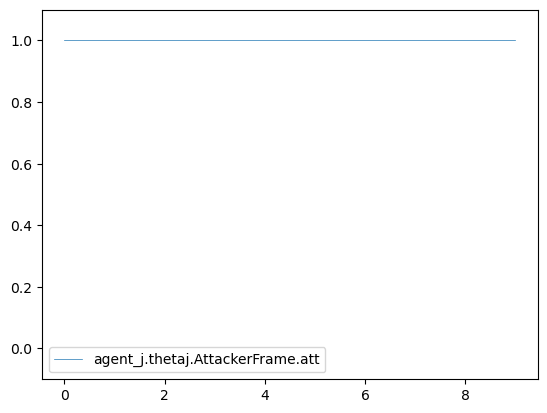

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes  agent_i.action  \
0                   1.0                    0.0             Nop   
1                   0.0                    1.0             Nop   
2                   0.0                    1.0             Nop   
3                   0.0                    1.0             Nop   
4                   0.0                    1.0             Nop   
5                   0.0                    1.0             Nop   
6                   0.0                    1.0    EnumAccounts   
7                   0.0                    1.0      PrivEscAcc   
8                   0.0                    1.0       FileRecon   
9                   0.0                    1.0  ManipulateData   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

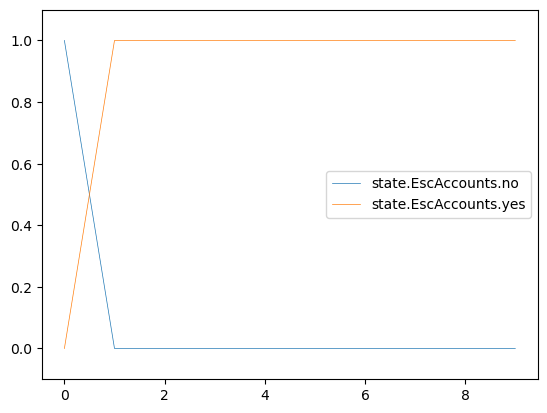

agent_i.EscAccounts.no  agent_i.EscAccounts.yes  agent_i.action  \
0                0.500000                 0.500000             Nop   
1                0.071429                 0.928571             Nop   
2                0.375000                 0.625000             Nop   
3                0.336364                 0.663636             Nop   
4                0.336336                 0.663664             Nop   
5                0.336336                 0.663664             Nop   
6                0.336336                 0.663664    EnumAccounts   
7                0.071310                 0.928690      PrivEscAcc   
8                0.000000                 1.000000       FileRecon   
9                0.000000                 1.000000  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           failure   
2                   user_files                           failure   
3                   user_files                           success   
4                   user_files                           failure   
5                         none                           failure   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                    perms_change  
5                          active                    perms_change  
6                          active                            none  
7                          active               acc_policy_change  
8                          active                            none  
9                          active                            none

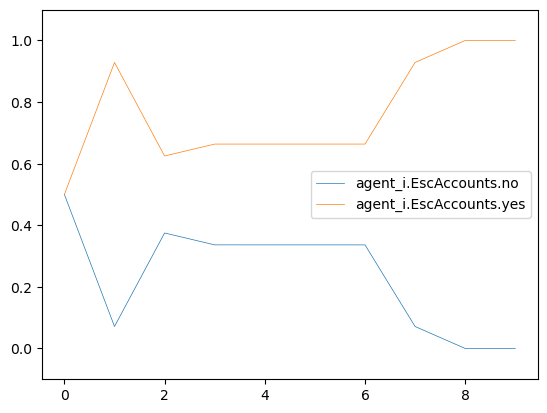

agent_j.EscAccounts.no  agent_j.EscAccounts.yes    agent_j.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                        file_enum  
1             Nop                   login_activity  
2             Nop                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                        file_enum  
7      PrivEscAcc                             none  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

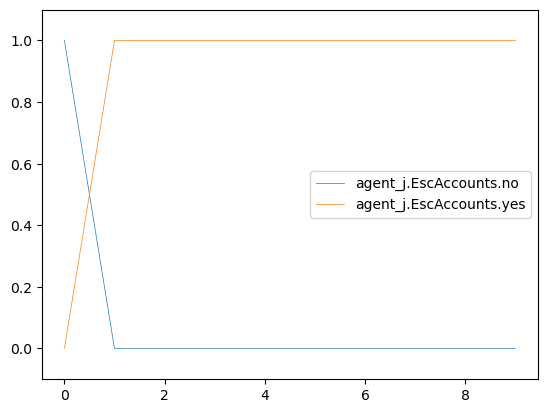

=============AccFound============


state.AccFound.no  state.AccFound.yes  agent_i.action    agent_j.action
0                1.0                 0.0             Nop      DecoyAccount
1                1.0                 0.0             Nop  RestrictAccPrivs
2                1.0                 0.0             Nop               Nop
3                1.0                 0.0             Nop               Nop
4                1.0                 0.0             Nop               Nop
5                1.0                 0.0             Nop               Nop
6                1.0                 0.0    EnumAccounts               Nop
7                0.0                 1.0      PrivEscAcc               Nop
8                0.0                 1.0       FileRecon               Nop
9                0.0                 1.0  ManipulateData               Nop

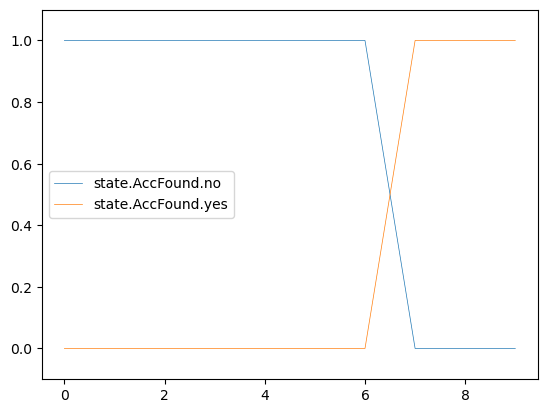

agent_i.AccFound.no  agent_i.AccFound.yes  agent_i.action  \
0             1.000000              0.000000             Nop   
1             1.000000              0.000000             Nop   
2             1.000000              0.000000             Nop   
3             1.000000              0.000000             Nop   
4             1.000000              0.000000             Nop   
5             1.000000              0.000000             Nop   
6             1.000000              0.000000    EnumAccounts   
7             0.113523              0.886477      PrivEscAcc   
8             0.000000              1.000000       FileRecon   
9             0.000000              1.000000  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           failure   
2                   user_files                           failure   
3                   user_files                           success   
4                   user_files                           failure   
5                         none                           failure   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                    perms_change  
5                          active                    perms_change  
6                          active                            none  
7                          active               acc_policy_change  
8                          active                            none  
9                          active                            none

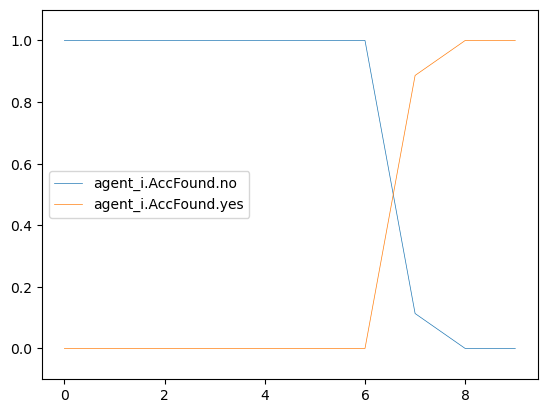

agent_j.AccFound.no  agent_j.AccFound.yes    agent_j.action  \
0             1.000000              0.000000      DecoyAccount   
1             1.000000              0.000000  RestrictAccPrivs   
2             0.751500              0.248500               Nop   
3             0.300037              0.699963               Nop   
4             0.502734              0.497266               Nop   
5             0.733759              0.266241               Nop   
6             0.772801              0.227199               Nop   
7             0.772306              0.227694               Nop   
8             0.772738              0.227262               Nop   
9             0.772738              0.227262               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                        file_enum  
1             Nop                   login_activity  
2             Nop                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                        file_enum  
7      PrivEscAcc                             none  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

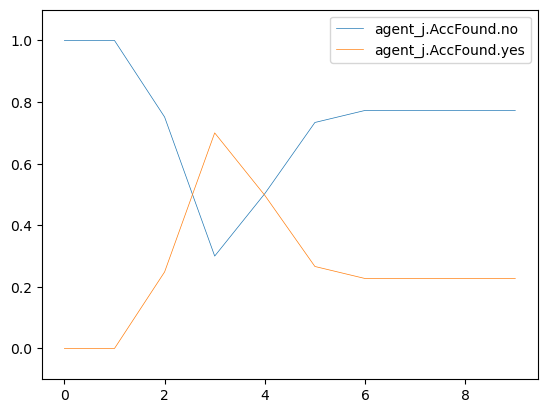

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot  agent_i.action    agent_j.action  
0                      1.0             Nop      DecoyAccount  
1                      1.0             Nop  RestrictAccPrivs  
2                      1.0             Nop               Nop  
3                      1.0             Nop               Nop  
4                      1.0             Nop               Nop  
5                      1.0             Nop               Nop  
6                      1.0    EnumAccounts               Nop  
7                      1.0      PrivEscAcc               Nop  
8                      1.0       FileRecon               Nop  
9                      1.0  ManipulateData               Nop

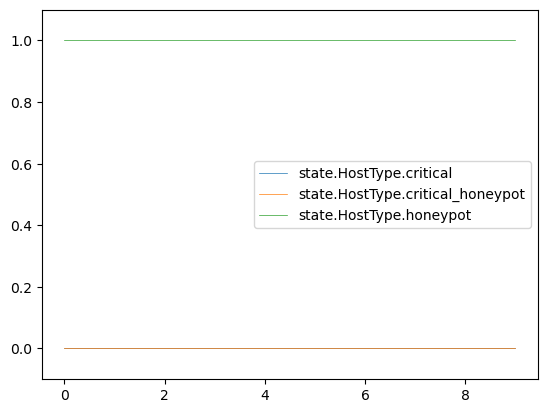

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 1.0   
1                        0.0                                 1.0   
2                        0.0                                 1.0   
3                        0.0                                 1.0   
4                        0.0                                 1.0   
5                        0.0                                 1.0   
6                        0.0                                 1.0   
7                        0.0                                 1.0   
8                        0.0                                 1.0   
9                        0.0                                 1.0   

   agent_i.HostType.honeypot  agent_i.action    agent_j.action  \
0                        0.0             Nop      DecoyAccount   
1                        0.0             Nop  RestrictAccPrivs   
2                        0.0             Nop               Nop   
3                        0.0             Nop               Nop   
4                        0.0             Nop               Nop   
5                        0.0             Nop               Nop   
6                        0.0    EnumAccounts               Nop   
7                        0.0      PrivEscAcc               Nop   
8                        0.0       FileRecon               Nop   
9                        0.0  ManipulateData               Nop   

  agent_i.observation.AccessPerm' agent_i.observation.HostObs'  \
0                          denied                         none   
1                          denied                   user_files   
2                            auth                   user_files   
3                            auth                   user_files   
4                          denied                   user_files   
5                          denied                         none   
6                          denied                         none   
7                            auth                   user_files   
8                            auth                         none   
9                            auth                         none   

  agent_i.observation.ActionResult' agent_i.observation.ConnStatus'  \
0                           failure                          active   
1                           failure                          active   
2                           failure                          active   
3                           success                          active   
4                           failure                          active   
5                           failure                          active   
6                           success                          active   
7                           success                          active   
8                           success                          active   
9                           success                          active   

  agent_i.observation.DefenseObs'  
0                            none  
1                            none  
2                            none  
3                            none  
4                    perms_change  
5                    perms_change  
6                            none  
7               acc_policy_change  
8                            none  
9                            none

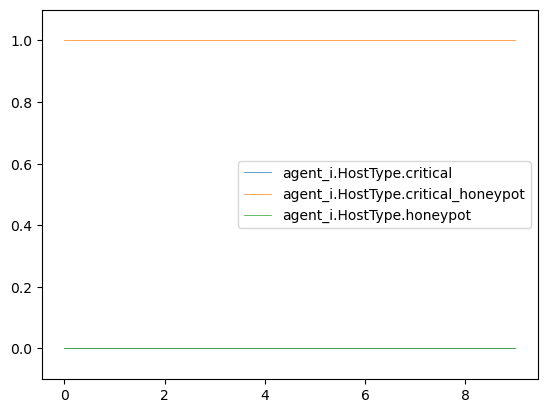

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_j.HostType.honeypot    agent_j.action  agent_i.action  \
0                        1.0      DecoyAccount             Nop   
1                        1.0  RestrictAccPrivs             Nop   
2                        1.0               Nop             Nop   
3                        1.0               Nop             Nop   
4                        1.0               Nop             Nop   
5                        1.0               Nop             Nop   
6                        1.0               Nop    EnumAccounts   
7                        1.0               Nop      PrivEscAcc   
8                        1.0               Nop       FileRecon   
9                        1.0               Nop  ManipulateData   

  agent_j.observation.EndPtAlerts'  
0                        file_enum  
1                   login_activity  
2                             none  
3                             none  
4                             none  
5                             none  
6                        file_enum  
7                             none  
8                        file_enum  
9                       file_write

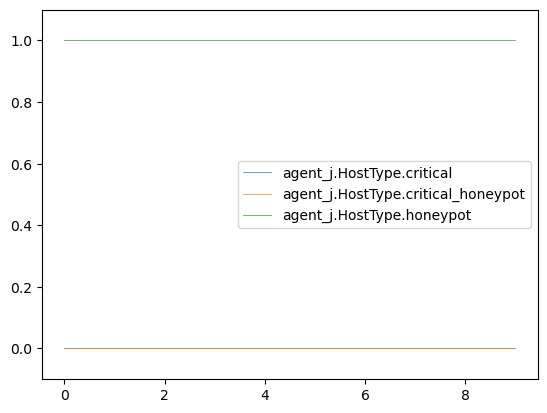

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes  agent_i.action  \
0                    1.0                     0.0             Nop   
1                    1.0                     0.0             Nop   
2                    1.0                     0.0             Nop   
3                    1.0                     0.0             Nop   
4                    1.0                     0.0             Nop   
5                    1.0                     0.0             Nop   
6                    1.0                     0.0    EnumAccounts   
7                    1.0                     0.0      PrivEscAcc   
8                    1.0                     0.0       FileRecon   
9                    1.0                     0.0  ManipulateData   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

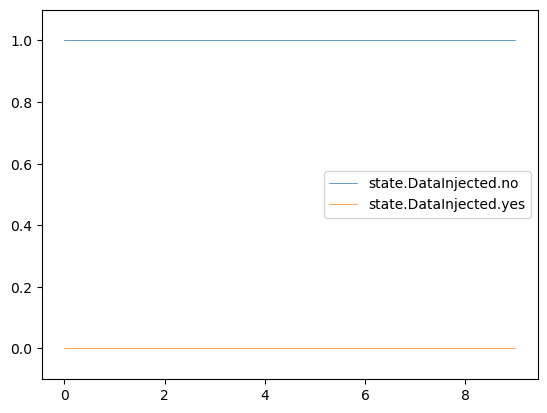

agent_i.DataInjected.no  agent_i.DataInjected.yes  agent_i.action  \
0                      1.0                       0.0             Nop   
1                      1.0                       0.0             Nop   
2                      1.0                       0.0             Nop   
3                      1.0                       0.0             Nop   
4                      1.0                       0.0             Nop   
5                      1.0                       0.0             Nop   
6                      1.0                       0.0    EnumAccounts   
7                      1.0                       0.0      PrivEscAcc   
8                      1.0                       0.0       FileRecon   
9                      1.0                       0.0  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           failure   
2                   user_files                           failure   
3                   user_files                           success   
4                   user_files                           failure   
5                         none                           failure   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                    perms_change  
5                          active                    perms_change  
6                          active                            none  
7                          active               acc_policy_change  
8                          active                            none  
9                          active                            none

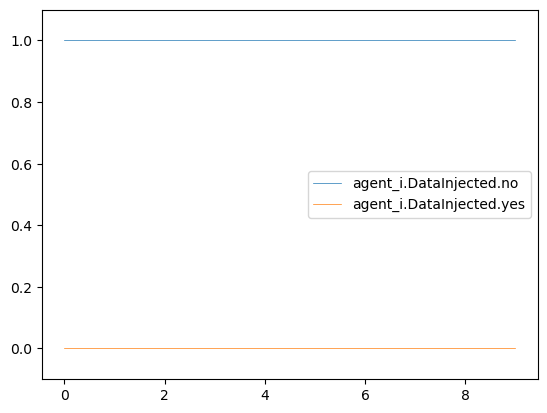

agent_j.DataInjected.no  agent_j.DataInjected.yes    agent_j.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  RestrictAccPrivs   
2                 0.370000                  0.630000               Nop   
3                 0.370028                  0.629972               Nop   
4                 0.628426                  0.371574               Nop   
5                 0.740470                  0.259530               Nop   
6                 0.770633                  0.229367               Nop   
7                 0.770041                  0.229959               Nop   
8                 0.770342                  0.229658               Nop   
9                 0.770342                  0.229658               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                        file_enum  
1             Nop                   login_activity  
2             Nop                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                        file_enum  
7      PrivEscAcc                             none  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

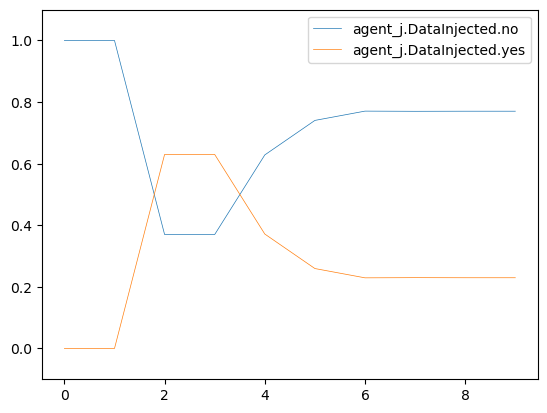

=============IOCsLogged============


state.IOCsLogged.no  state.IOCsLogged.yes  agent_i.action    agent_j.action
0                  1.0                   0.0             Nop      DecoyAccount
1                  1.0                   0.0             Nop  RestrictAccPrivs
2                  1.0                   0.0             Nop               Nop
3                  1.0                   0.0             Nop               Nop
4                  1.0                   0.0             Nop               Nop
5                  1.0                   0.0             Nop               Nop
6                  1.0                   0.0    EnumAccounts               Nop
7                  1.0                   0.0      PrivEscAcc               Nop
8                  1.0                   0.0       FileRecon               Nop
9                  1.0                   0.0  ManipulateData               Nop

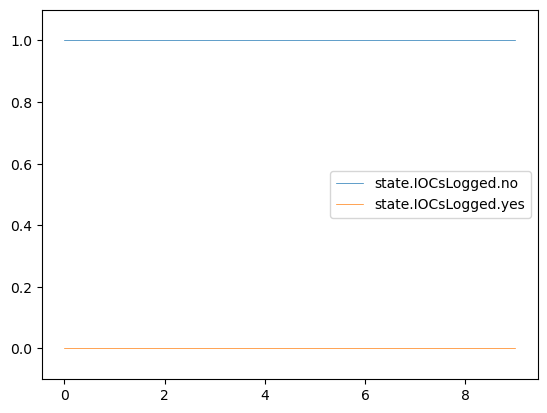

agent_i.IOCsLogged.no  agent_i.IOCsLogged.yes  agent_i.action  \
0               1.000000                0.000000             Nop   
1               1.000000                0.000000             Nop   
2               1.000000                0.000000             Nop   
3               1.000000                0.000000             Nop   
4               1.000000                0.000000             Nop   
5               0.967594                0.032406             Nop   
6               0.940066                0.059934    EnumAccounts   
7               0.748896                0.251104      PrivEscAcc   
8               0.683937                0.316063       FileRecon   
9               0.640650                0.359350  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           failure   
2                   user_files                           failure   
3                   user_files                           success   
4                   user_files                           failure   
5                         none                           failure   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                    perms_change  
5                          active                    perms_change  
6                          active                            none  
7                          active               acc_policy_change  
8                          active                            none  
9                          active                            none

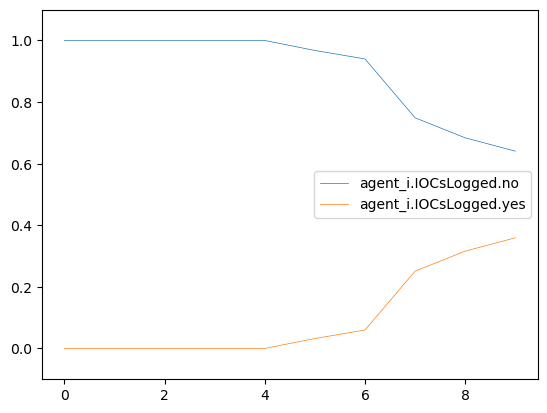

agent_j.IOCsLogged.no  agent_j.IOCsLogged.yes    agent_j.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0  RestrictAccPrivs   
2                    1.0                     0.0               Nop   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    1.0                     0.0               Nop   
6                    1.0                     0.0               Nop   
7                    1.0                     0.0               Nop   
8                    1.0                     0.0               Nop   
9                    1.0                     0.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                        file_enum  
1             Nop                   login_activity  
2             Nop                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                        file_enum  
7      PrivEscAcc                             none  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

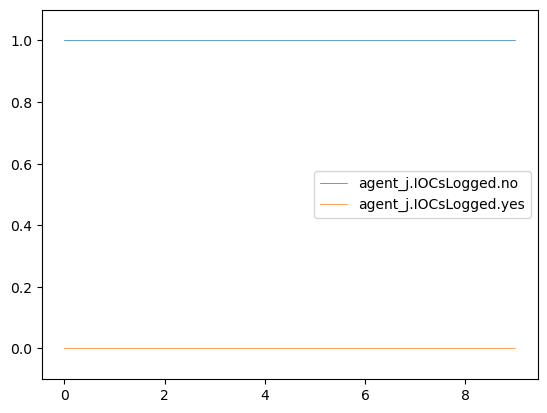

=============AttActive============


state.AttActive.no  state.AttActive.yes  agent_i.action    agent_j.action
0                 0.0                  1.0             Nop      DecoyAccount
1                 0.0                  1.0             Nop  RestrictAccPrivs
2                 0.0                  1.0             Nop               Nop
3                 0.0                  1.0             Nop               Nop
4                 0.0                  1.0             Nop               Nop
5                 0.0                  1.0             Nop               Nop
6                 0.0                  1.0    EnumAccounts               Nop
7                 0.0                  1.0      PrivEscAcc               Nop
8                 0.0                  1.0       FileRecon               Nop
9                 0.0                  1.0  ManipulateData               Nop

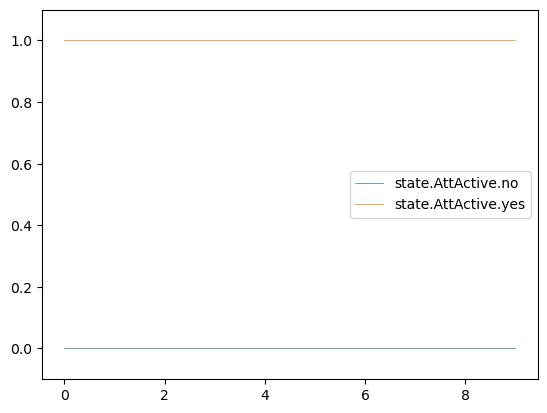

agent_i.AttActive.no  agent_i.AttActive.yes  agent_i.action  \
0                   0.0                    1.0             Nop   
1                   0.0                    1.0             Nop   
2                   0.0                    1.0             Nop   
3                   0.0                    1.0             Nop   
4                   0.0                    1.0             Nop   
5                   0.0                    1.0             Nop   
6                   0.0                    1.0    EnumAccounts   
7                   0.0                    1.0      PrivEscAcc   
8                   0.0                    1.0       FileRecon   
9                   0.0                    1.0  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           failure   
2                   user_files                           failure   
3                   user_files                           success   
4                   user_files                           failure   
5                         none                           failure   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                    perms_change  
5                          active                    perms_change  
6                          active                            none  
7                          active               acc_policy_change  
8                          active                            none  
9                          active                            none

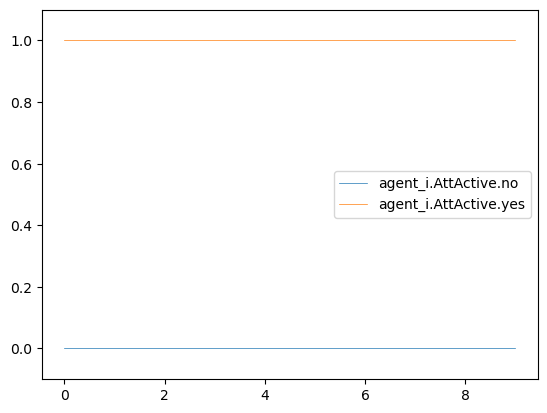

agent_j.AttActive.no  agent_j.AttActive.yes    agent_j.action  \
0              0.000000               1.000000      DecoyAccount   
1              0.000000               1.000000  RestrictAccPrivs   
2              0.000000               1.000000               Nop   
3              0.000052               0.999948               Nop   
4              0.478536               0.521464               Nop   
5              0.918423               0.081577               Nop   
6              0.991131               0.008869               Nop   
7              0.998325               0.001675               Nop   
8              0.999907               0.000093               Nop   
9              0.999999               0.000001               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                        file_enum  
1             Nop                   login_activity  
2             Nop                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                        file_enum  
7      PrivEscAcc                             none  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

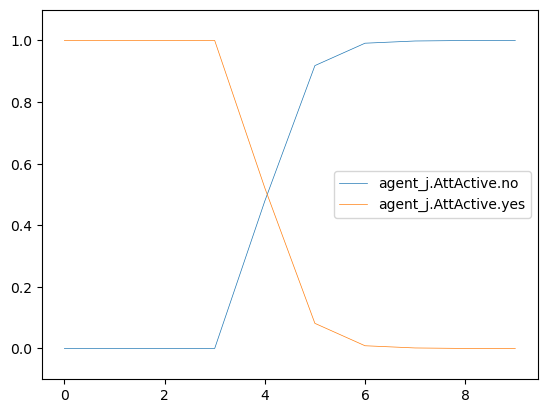

=============DataFound============


state.DataFound.no  state.DataFound.yes  agent_i.action    agent_j.action
0                 1.0                  0.0             Nop      DecoyAccount
1                 1.0                  0.0             Nop  RestrictAccPrivs
2                 1.0                  0.0             Nop               Nop
3                 1.0                  0.0             Nop               Nop
4                 1.0                  0.0             Nop               Nop
5                 1.0                  0.0             Nop               Nop
6                 1.0                  0.0    EnumAccounts               Nop
7                 1.0                  0.0      PrivEscAcc               Nop
8                 1.0                  0.0       FileRecon               Nop
9                 0.0                  1.0  ManipulateData               Nop

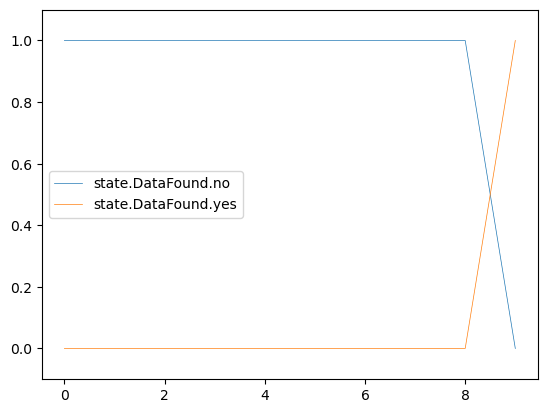

agent_i.DataFound.no  agent_i.DataFound.yes  agent_i.action  \
0              1.000000               0.000000             Nop   
1              1.000000               0.000000             Nop   
2              1.000000               0.000000             Nop   
3              1.000000               0.000000             Nop   
4              1.000000               0.000000             Nop   
5              1.000000               0.000000             Nop   
6              1.000000               0.000000    EnumAccounts   
7              1.000000               0.000000      PrivEscAcc   
8              1.000000               0.000000       FileRecon   
9              0.093525               0.906475  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           failure   
2                   user_files                           failure   
3                   user_files                           success   
4                   user_files                           failure   
5                         none                           failure   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                    perms_change  
5                          active                    perms_change  
6                          active                            none  
7                          active               acc_policy_change  
8                          active                            none  
9                          active                            none

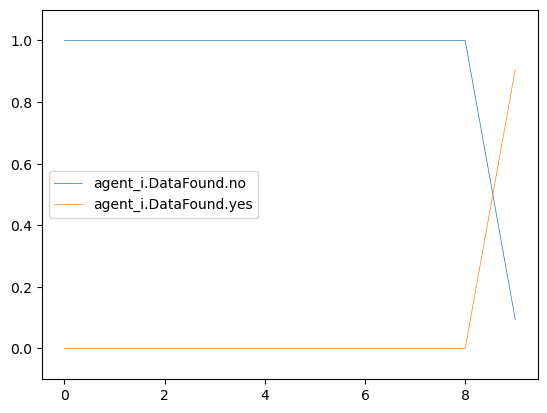

agent_j.DataFound.no  agent_j.DataFound.yes    agent_j.action  \
0              1.000000               0.000000      DecoyAccount   
1              0.300000               0.700000  RestrictAccPrivs   
2              0.300000               0.700000               Nop   
3              0.300032               0.699969               Nop   
4              0.428788               0.571213               Nop   
5              0.584813               0.415187               Nop   
6              0.614272               0.385728               Nop   
7              0.613897               0.386103               Nop   
8              0.614236               0.385764               Nop   
9              0.614236               0.385764               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                        file_enum  
1             Nop                   login_activity  
2             Nop                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                        file_enum  
7      PrivEscAcc                             none  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

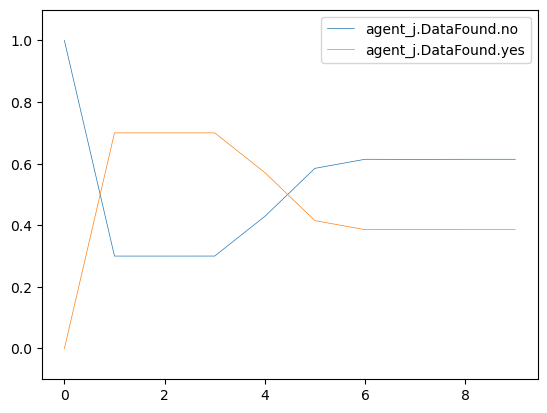

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes  agent_i.action  \
0                   0.0                    1.0             Nop   
1                   0.0                    1.0             Nop   
2                   0.0                    1.0             Nop   
3                   0.0                    1.0             Nop   
4                   0.0                    1.0             Nop   
5                   0.0                    1.0             Nop   
6                   0.0                    1.0    EnumAccounts   
7                   0.0                    1.0      PrivEscAcc   
8                   0.0                    1.0       FileRecon   
9                   0.0                    1.0  ManipulateData   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

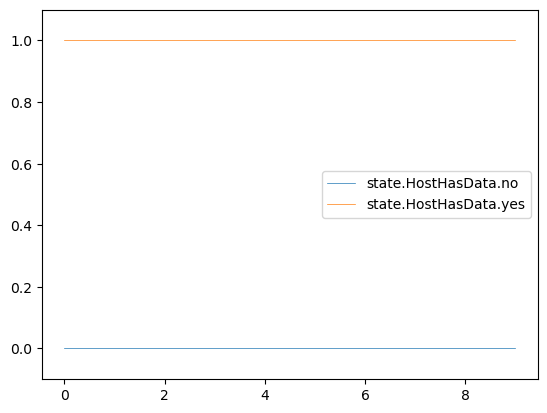

agent_i.HostHasData.no  agent_i.HostHasData.yes  agent_i.action  \
0                0.500000                 0.500000             Nop   
1                0.500000                 0.500000             Nop   
2                0.500000                 0.500000             Nop   
3                0.500000                 0.500000             Nop   
4                0.500000                 0.500000             Nop   
5                0.500000                 0.500000             Nop   
6                0.500000                 0.500000    EnumAccounts   
7                0.500000                 0.500000      PrivEscAcc   
8                0.500000                 0.500000       FileRecon   
9                0.071942                 0.928058  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           failure   
2                   user_files                           failure   
3                   user_files                           success   
4                   user_files                           failure   
5                         none                           failure   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                    perms_change  
5                          active                    perms_change  
6                          active                            none  
7                          active               acc_policy_change  
8                          active                            none  
9                          active                            none

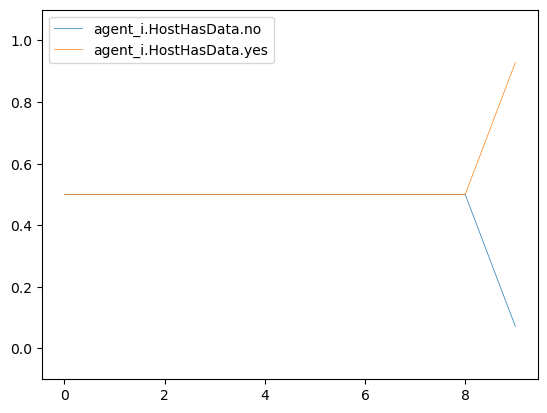

agent_j.HostHasData.no  agent_j.HostHasData.yes    agent_j.action  \
0                     0.0                      1.0      DecoyAccount   
1                     0.0                      1.0  RestrictAccPrivs   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                        file_enum  
1             Nop                   login_activity  
2             Nop                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                        file_enum  
7      PrivEscAcc                             none  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

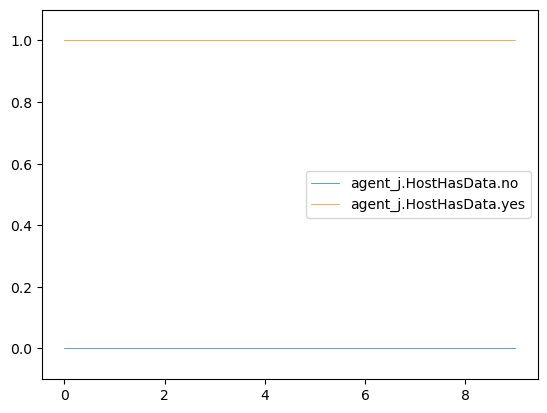

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user  agent_i.action  \
0                   0.0                   1.0             Nop   
1                   0.0                   1.0             Nop   
2                   1.0                   0.0             Nop   
3                   1.0                   0.0             Nop   
4                   1.0                   0.0             Nop   
5                   1.0                   0.0             Nop   
6                   1.0                   0.0    EnumAccounts   
7                   1.0                   0.0      PrivEscAcc   
8                   1.0                   0.0       FileRecon   
9                   1.0                   0.0  ManipulateData   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

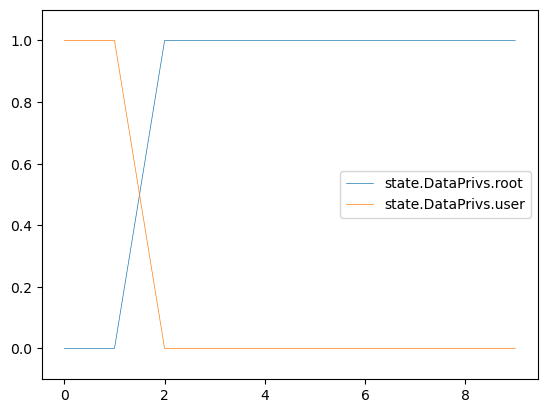

agent_i.DataPrivs.root  agent_i.DataPrivs.user  agent_i.action  \
0                0.500000                0.500000             Nop   
1                0.571429                0.428571             Nop   
2                1.000000                0.000000             Nop   
3                1.000000                0.000000             Nop   
4                1.000000                0.000000             Nop   
5                1.000000                0.000000             Nop   
6                1.000000                0.000000    EnumAccounts   
7                1.000000                0.000000      PrivEscAcc   
8                1.000000                0.000000       FileRecon   
9                1.000000                0.000000  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           failure   
2                   user_files                           failure   
3                   user_files                           success   
4                   user_files                           failure   
5                         none                           failure   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                    perms_change  
5                          active                    perms_change  
6                          active                            none  
7                          active               acc_policy_change  
8                          active                            none  
9                          active                            none

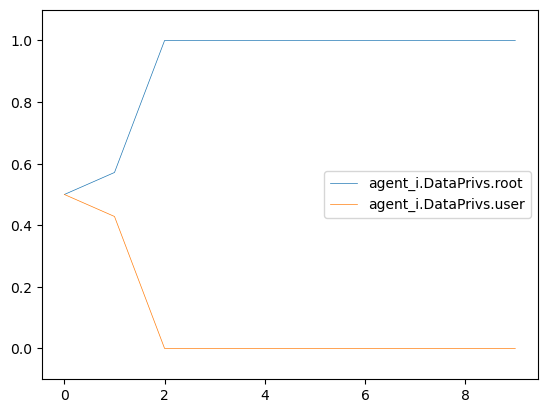

agent_j.DataPrivs.root  agent_j.DataPrivs.user    agent_j.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  RestrictAccPrivs   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                        file_enum  
1             Nop                   login_activity  
2             Nop                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                        file_enum  
7      PrivEscAcc                             none  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

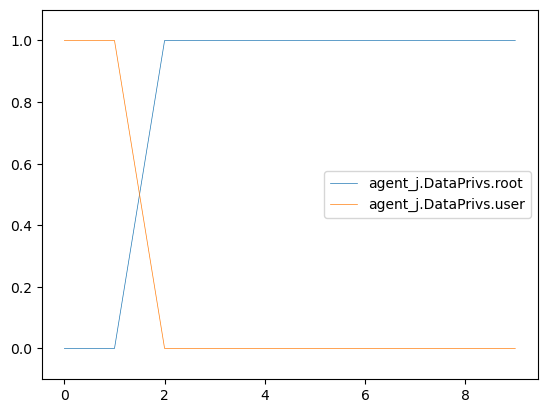

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user  agent_i.action  \
0                     0.0                     1.0             Nop   
1                     0.0                     1.0             Nop   
2                     0.0                     1.0             Nop   
3                     0.0                     1.0             Nop   
4                     0.0                     1.0             Nop   
5                     0.0                     1.0             Nop   
6                     0.0                     1.0    EnumAccounts   
7                     0.0                     1.0      PrivEscAcc   
8                     1.0                     0.0       FileRecon   
9                     1.0                     0.0  ManipulateData   

     agent_j.action  
0      DecoyAccount  
1  RestrictAccPrivs  
2               Nop  
3               Nop  
4               Nop  
5               Nop  
6               Nop  
7               Nop  
8               Nop  
9               Nop

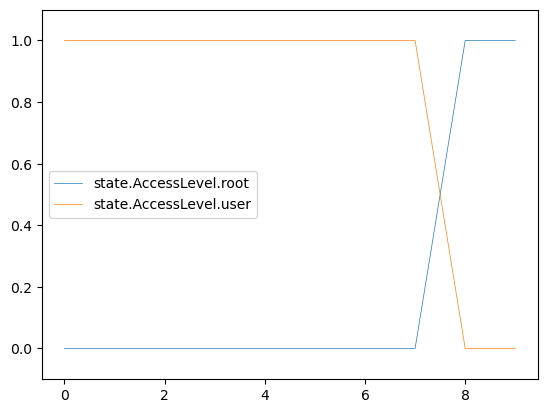

agent_i.AccessLevel.root  agent_i.AccessLevel.user  agent_i.action  \
0                       0.0                       1.0             Nop   
1                       0.0                       1.0             Nop   
2                       0.0                       1.0             Nop   
3                       0.0                       1.0             Nop   
4                       0.0                       1.0             Nop   
5                       0.0                       1.0             Nop   
6                       0.0                       1.0    EnumAccounts   
7                       0.0                       1.0      PrivEscAcc   
8                       1.0                       0.0       FileRecon   
9                       1.0                       0.0  ManipulateData   

     agent_j.action agent_i.observation.AccessPerm'  \
0      DecoyAccount                          denied   
1  RestrictAccPrivs                          denied   
2               Nop                            auth   
3               Nop                            auth   
4               Nop                          denied   
5               Nop                          denied   
6               Nop                          denied   
7               Nop                            auth   
8               Nop                            auth   
9               Nop                            auth   

  agent_i.observation.HostObs' agent_i.observation.ActionResult'  \
0                         none                           failure   
1                   user_files                           failure   
2                   user_files                           failure   
3                   user_files                           success   
4                   user_files                           failure   
5                         none                           failure   
6                         none                           success   
7                   user_files                           success   
8                         none                           success   
9                         none                           success   

  agent_i.observation.ConnStatus' agent_i.observation.DefenseObs'  
0                          active                            none  
1                          active                            none  
2                          active                            none  
3                          active                            none  
4                          active                    perms_change  
5                          active                    perms_change  
6                          active                            none  
7                          active               acc_policy_change  
8                          active                            none  
9                          active                            none

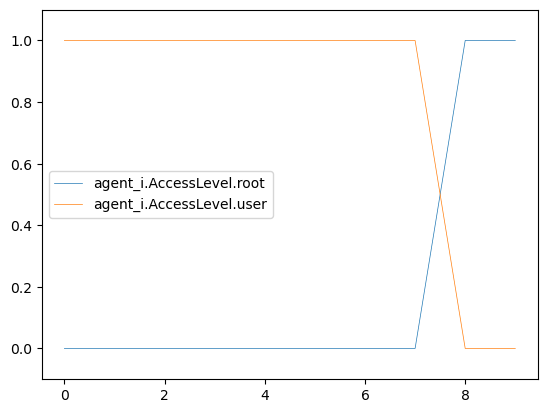

agent_j.AccessLevel.root  agent_j.AccessLevel.user    agent_j.action  \
0                  0.000000                  1.000000      DecoyAccount   
1                  0.000000                  1.000000  RestrictAccPrivs   
2                  0.000000                  1.000000               Nop   
3                  0.223640                  0.776360               Nop   
4                  0.371571                  0.628429               Nop   
5                  0.079063                  0.920937               Nop   
6                  0.030060                  0.969940               Nop   
7                  0.030682                  0.969318               Nop   
8                  0.030140                  0.969860               Nop   
9                  0.030140                  0.969861               Nop   

   agent_i.action agent_j.observation.EndPtAlerts'  
0             Nop                        file_enum  
1             Nop                   login_activity  
2             Nop                             none  
3             Nop                             none  
4             Nop                             none  
5             Nop                             none  
6    EnumAccounts                        file_enum  
7      PrivEscAcc                             none  
8       FileRecon                        file_enum  
9  ManipulateData                       file_write

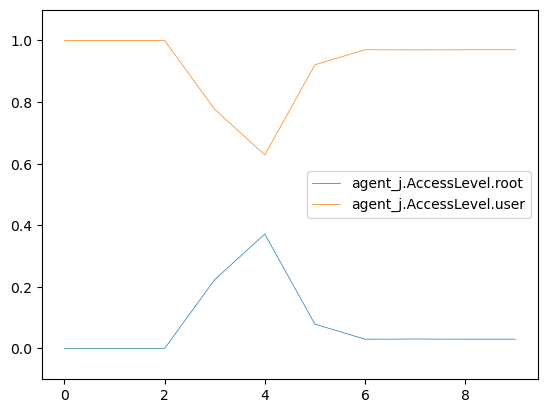

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    